<h4><center>Parity Risk Strategies on a variety of Portfolio (Bonds, Equities, Commodities, and Currencies)</center></h4>

<h5><center>Dataset cover time frame from Jan 2000 till Dec 2008</center></h5>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from matplotlib import rcParams
from datetime import datetime
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2008 = pd.read_csv('Bond_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2008.head()

(108, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2000    98.71     102.11   95.28  100.23   92.80   99.87
1  2/1/2000    99.07     106.07  100.59  102.33   95.62   99.70
2  3/1/2000   101.07     108.00  103.66  103.86   96.91  100.86
3  4/1/2000   100.46     107.28  102.28  104.06   95.09  100.13
4  5/1/2000   100.53     109.13  101.53  104.33   96.27  100.59

In [3]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       108 non-null    object 
 1   Germany    108 non-null    float64
 2   Australia  108 non-null    float64
 3   US         108 non-null    float64
 4   UK         108 non-null    float64
 5   Canada     108 non-null    float64
 6   Japan      108 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.0+ KB


In [4]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2008['Date'] = pd.to_datetime(bond_df_2000_2008.Date)

In [5]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       108 non-null    datetime64[ns]
 1   Germany    108 non-null    float64       
 2   Australia  108 non-null    float64       
 3   US         108 non-null    float64       
 4   UK         108 non-null    float64       
 5   Canada     108 non-null    float64       
 6   Japan      108 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.0 KB


In [6]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2008.set_index('Date',inplace=True)

In [7]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df_2000_2008.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

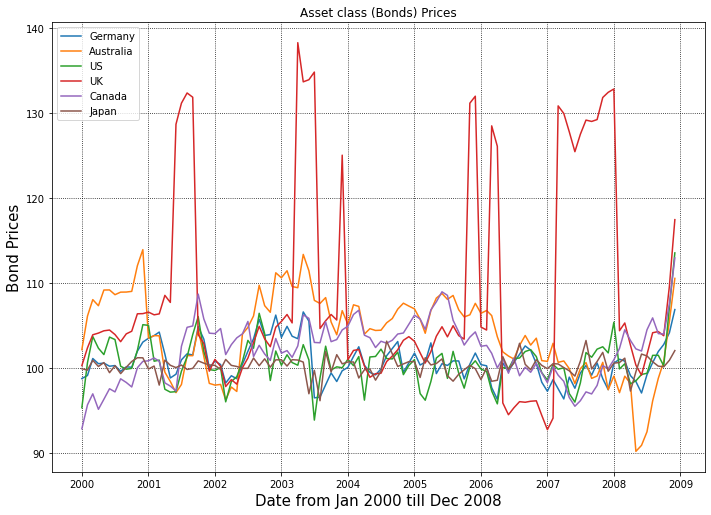

In [8]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.Germany, label='Germany')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.Australia, label='Australia')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.US, label='US')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.UK, label='UK')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.Canada, label='Canada')
plt.plot(bond_df_2000_2008.index, bond_df_2000_2008.Japan, label='Japan')

plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=15)
plt.ylabel('Bond Prices', fontsize=15)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [9]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2008 = bond_df_2000_2008[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df_2000_2008.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-01-01       NaN        NaN       NaN       NaN       NaN       NaN
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594

In [10]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2008.dropna(axis=0, inplace=True)
bond_df_2000_2008.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594
2000-06-01 -0.003680   0.000092  0.020290  0.000863  0.012880 -0.011830

In [11]:
print('There are {} rows in the DataFrame'.format(bond_df_2000_2008.shape[0]))

There are 107 rows in the DataFrame


In [12]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2000_2008_2 = bond_df_2000_2008.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [13]:
vol_bond_df_2000_2008 = bond_df_2000_2008

In [14]:
vol_bond_df_2000_2008.shape[0]

107

In [15]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_bond_df_2000_2008['Germany_Vol'] = vol_bond_df_2000_2008['Germany'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['Australia_Vol'] = vol_bond_df_2000_2008['Australia'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['US_Vol'] = vol_bond_df_2000_2008['US'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['UK_Vol'] = vol_bond_df_2000_2008['UK'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['Canada_Vol'] = vol_bond_df_2000_2008['Canada'].rolling(107).std() * math.sqrt(107)
vol_bond_df_2000_2008['Japan_Vol'] = vol_bond_df_2000_2008['Japan'].rolling(107).std() * math.sqrt(107)

In [16]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_bond_df_2000_2008.dropna(axis=0, inplace=True)

In [17]:
vol_bond_df_2000_2008[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

Germany_Vol  Australia_Vol    US_Vol    UK_Vol  Canada_Vol  \
Date                                                                     
2008-12-01     0.184647       0.238454  0.261858  0.868501    0.172802   

            Japan_Vol  
Date                   
2008-12-01   0.155408

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [18]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility = (0.184647+0.238454+0.261858+0.868501+0.172802+0.155408) / 6
volatility

0.3136116666666666

In [19]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_bond_df_2000_2008 = 0.3136116666666666 / 6
target_vol_bond_df_2000_2008

0.052268611111111106

In [20]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_bond_df_2000_2008 = bond_df_2000_2008

In [21]:
port_bond_df_2000_2008['Germany_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['Germany_Vol'] 
port_bond_df_2000_2008['Australia_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['Australia_Vol'] 
port_bond_df_2000_2008['US_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['US_Vol']
port_bond_df_2000_2008['UK_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['UK_Vol']
port_bond_df_2000_2008['Canada_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['Canada_Vol']
port_bond_df_2000_2008['Japan_Alloc'] = target_vol_bond_df_2000_2008 / vol_bond_df_2000_2008['Japan_Vol']

In [22]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_bond_df_2000_2008.dropna(axis=0, inplace=True)

In [23]:
port_bond_df_2000_2008[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

Germany_Alloc  Australia_Alloc  US_Alloc  UK_Alloc  Canada_Alloc  \
Date                                                                           
2008-12-01       0.283073         0.219198  0.199607  0.060183      0.302477   

            Japan_Alloc  
Date                     
2008-12-01     0.336332

In [24]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [25]:
bond_df_2000_2008_2['Germany_R'] = bond_df_2000_2008_2['Germany'] * 0.283073
bond_df_2000_2008_2['Australia_R'] = bond_df_2000_2008_2['Australia'] * 0.219198
bond_df_2000_2008_2['US_R'] = bond_df_2000_2008_2['US'] * 0.199607
bond_df_2000_2008_2['UK_R'] = bond_df_2000_2008_2['UK'] * 0.060183
bond_df_2000_2008_2['Canada_R'] = bond_df_2000_2008_2['Canada'] * 0.302477
bond_df_2000_2008_2['Japan_R'] = bond_df_2000_2008_2['Japan'] * 0.336332

In [26]:
bond_df_2000_2008_2.head(5)

Germany  Australia        US        UK    Canada     Japan  \
Date                                                                      
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702   
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635   
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238   
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594   
2000-06-01 -0.003680   0.000092  0.020290  0.000863  0.012880 -0.011830   

            Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  
Date                                                                        
2000-02-01   0.001032     0.008501  0.011124  0.001261  0.009192 -0.000573  
2000-03-01   0.005715     0.003988  0.006092  0.000900  0.004081  0.003913  
2000-04-01  -0.001708    -0.001461 -0.002657  0.000116 -0.005681 -0.002434  
2000-05-01   0.000197     0.003780 -0.001464  0.000156  0.003754  0.001545  
2000-06-01  -0.001042     0.000020  0.004050  0.000052  0.003896 -0.003979

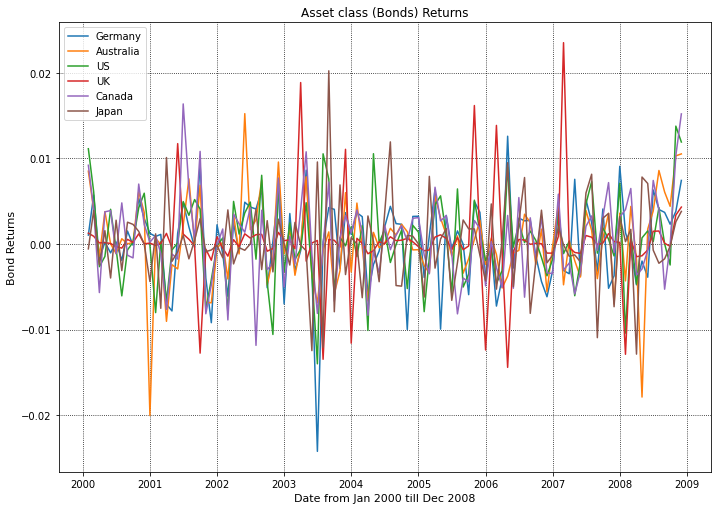

In [27]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.Germany_R, label='Germany')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.Australia_R, label='Australia')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.US_R, label='US')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.UK_R, label='UK')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.Canada_R, label='Canada')
plt.plot(bond_df_2000_2008_2.index, bond_df_2000_2008_2.Japan_R, label='Japan')

plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Bond Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [28]:
# Adding up all the returns of all asset classes for all countries

In [29]:
bond_df_2000_2008_2['Portfolio_R'] = bond_df_2000_2008_2['Germany_R'] + bond_df_2000_2008_2['Australia_R'] + bond_df_2000_2008_2['US_R'] + bond_df_2000_2008_2['UK_R'] + bond_df_2000_2008_2['Canada_R'] + bond_df_2000_2008_2['Japan_R']

In [30]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [31]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2000_2008_2['Bond_Port_Value'] = ((bond_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [32]:
bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Bond_Port_Value']].head(5)

Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  \
Date                                                                         
2000-02-01   0.001032     0.008501  0.011124  0.001261  0.009192 -0.000573   
2000-03-01   0.005715     0.003988  0.006092  0.000900  0.004081  0.003913   
2000-04-01  -0.001708    -0.001461 -0.002657  0.000116 -0.005681 -0.002434   
2000-05-01   0.000197     0.003780 -0.001464  0.000156  0.003754  0.001545   
2000-06-01  -0.001042     0.000020  0.004050  0.000052  0.003896 -0.003979   

            Portfolio_R  Bond_Port_Value  
Date                                      
2000-02-01     0.030538      1030.537531  
2000-03-01     0.024689      1055.980198  
2000-04-01    -0.013826      1041.380097  
2000-05-01     0.007968      1049.678171  
2000-06-01     0.002997      1052.824326

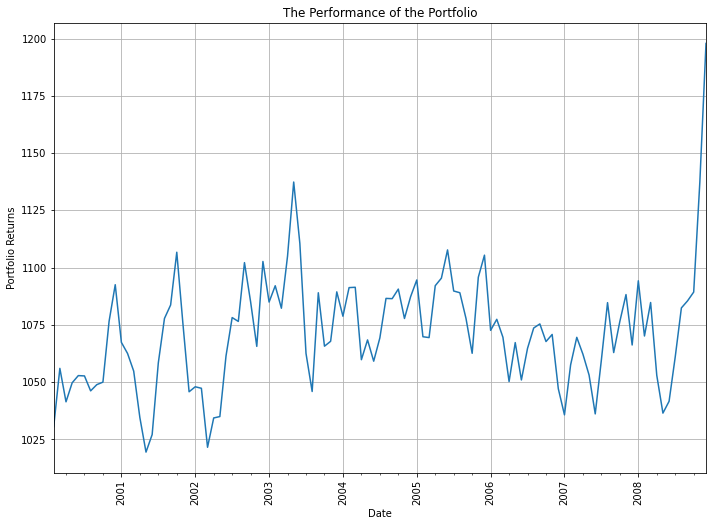

In [33]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2000 till Dec 2008');
plt.ylabel('Portfolio Returns');
bond_df_2000_2008_2['Bond_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [34]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2000_2008_2.Bond_Port_Value.max() - bond_df_2000_2008_2.Bond_Port_Value.min()) / bond_df_2000_2008_2.Bond_Port_Value.max()

0.1489614971640631

In [35]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2000_2008_2['Bond_Port_Value'][-1] / bond_df_2000_2008_2['Bond_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 16.24%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [36]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2000_2008_2['Monthly_Return'] = bond_df_2000_2008_2['Bond_Port_Value'].pct_change(1)

In [37]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2000_2008_2['Monthly_Return'].mean() / bond_df_2000_2008_2['Monthly_Return'].std()
Sharpe_Ratio

0.08640835049051637

In [38]:
bond_df_2000_2008_2.shape[0]

107

In [39]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(107)
Annualized_Sharpe_Ratio

0.8938149275384898

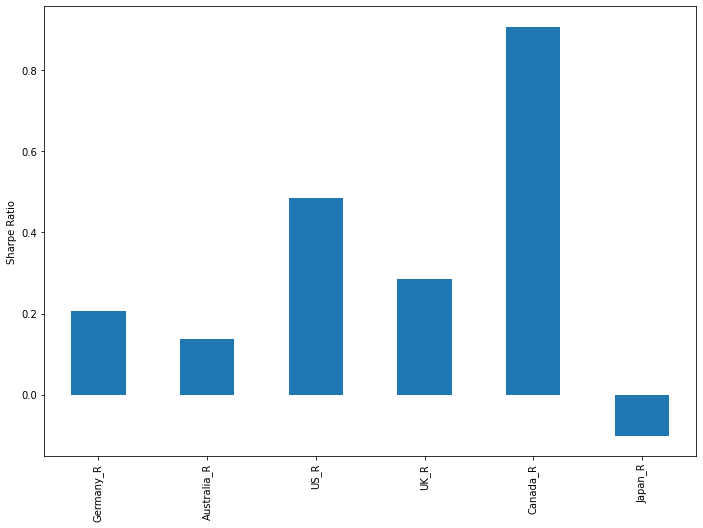

In [40]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 107 # 107 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sharpes = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [41]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [42]:
bond_df_2000_2008_2.shape[0]

107

In [43]:
bond_sortino_ratio(bond_df_2000_2008_2['Portfolio_R'], 107, .0164)

1.8555657851317686

In [44]:
Annualized_Sortino_Ratio = 1.8555657851317686 * np.sqrt(107)
Annualized_Sortino_Ratio

19.194121729733546

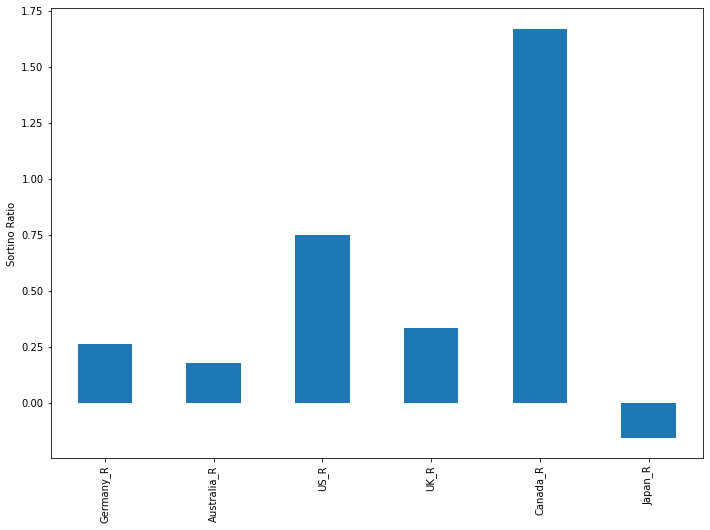

In [45]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 107 # 107 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sortinos = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

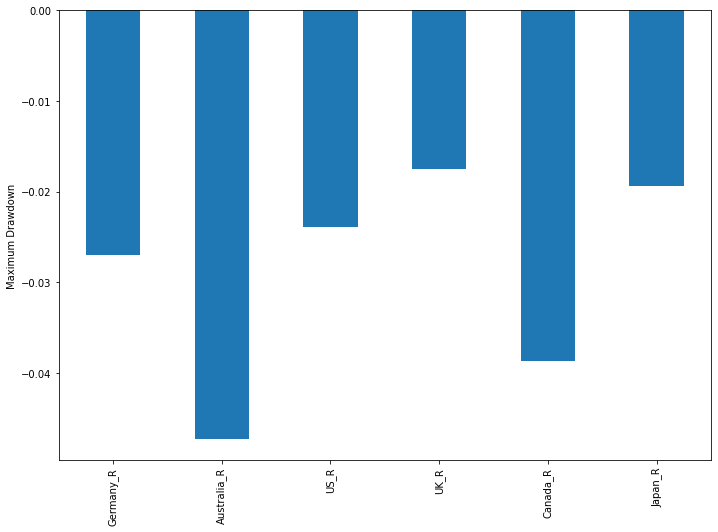

In [46]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_max_drawdown = bond_df_2000_2008_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [47]:
skew(bond_df_2000_2008_2['Bond_Port_Value'].dropna())

1.1477737013325435

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [48]:
kurtosis(bond_df_2000_2008_2['Bond_Port_Value'].dropna())

4.4730687396879105

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [49]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [50]:
geometric_mean_return(bond_df_2000_2008_2['Portfolio_R'])

0.00968058626056557

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark. - - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [51]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [52]:
information_ratio(bond_df_2000_2008_2['Portfolio_R'], 0.007915522297375887, 107)

-0.031822874875405235

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2008.
- Target volatility 5.22 %.
- Maximum Drawdown 14.89 %.
- Cumulative return of the o=portfolio 16.24 %
- Sharpe Ratio, or Risk-Adjusted Returns 8.64 %.
- Annualized Sharpe Ratio 89.38 %.
- Sortino ratio 100.85 %.
- Annualized Sortino ratio 1900.19 %.
- Skewness 1.1477.
- Kurtosis 4.4730.
- Geometric Mean Rate of Return  0.00968058626056557
- Information Ratio - 3.18 %

In [53]:
# Dataset (Equity.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2000_2008 = pd.read_csv('Equity_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2000_2008.head()

(108, 26)


Date  Australia  Nethelands  Germany   Canada     Hong_Kong  \
0  1/1/2000     3080.2      612.38  6835.60  8481.11  1.553234e+10   
1  2/1/2000     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2  3/1/2000     3133.3      662.29  7599.39  9462.39  1.740654e+10   
3  4/1/2000     3115.8      661.38  7414.68  9347.61  1.551930e+10   
4  5/1/2000     3081.0      655.50  7109.67  9251.99  1.471386e+10   

        France        Belgium            US    Japan   ...    Chile    Brazil  \
0  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  ...  1151.42  16388.27   
1  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  ...  1106.18  17660.20   
2  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  ...  1128.58  17820.37   
3  6.419720e+09  2.813280e+09  1.452430e+09  17973.70  ...  1075.01  15537.60   
4  6.426260e+09  2.849430e+09  1.420600e+09  16332.45  ...  1124.19  14956.61   

   Argentina  Russia  Turkey  Portugal  Finland  South Africa  Indonesia  \
0     566.28  188.81  167.15  12385.55  3234.78       7771.66     636.37   
1     631.64  191.49  159.46  14644.27  3239.69       7287.01     576.54   
2     569.24  254.68  159.20  13127.09  3189.06       7388.34     583.28   
3     509.51  242.85  192.06  12235.62  3170.85       6913.24     526.74   
4     464.30  217.05  162.06  11864.13  2901.45       6921.37     454.33   

   Venezuela  
0   90224.09  
1   69894.88  
2   47772.07  
3   48856.03  
4   55583.02  

[5 rows x 26 columns]

In [54]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          108 non-null    object 
 1   Australia     108 non-null    float64
 2   Nethelands    108 non-null    float64
 3   Germany       108 non-null    float64
 4   Canada        108 non-null    float64
 5   Hong_Kong     108 non-null    float64
 6   France        108 non-null    float64
 7   Belgium       108 non-null    float64
 8   US            108 non-null    float64
 9   Japan         108 non-null    float64
 10  Spain         108 non-null    float64
 11  Sweden        108 non-null    float64
 12  UK            108 non-null    float64
 13  Italy         108 non-null    float64
 14  Singapore     108 non-null    float64
 15  Thailand      108 non-null    float64
 16  Chile         108 non-null    float64
 17  Brazil        108 non-null    float64
 18  Argentina     108 non-null    

In [55]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2000_2008['Date'] = pd.to_datetime(equity_df_2000_2008.Date)

In [56]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          108 non-null    datetime64[ns]
 1   Australia     108 non-null    float64       
 2   Nethelands    108 non-null    float64       
 3   Germany       108 non-null    float64       
 4   Canada        108 non-null    float64       
 5   Hong_Kong     108 non-null    float64       
 6   France        108 non-null    float64       
 7   Belgium       108 non-null    float64       
 8   US            108 non-null    float64       
 9   Japan         108 non-null    float64       
 10  Spain         108 non-null    float64       
 11  Sweden        108 non-null    float64       
 12  UK            108 non-null    float64       
 13  Italy         108 non-null    float64       
 14  Singapore     108 non-null    float64       
 15  Thailand      108 non-null    float64   

In [57]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2000_2008.set_index('Date',inplace=True)

In [58]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df_2000_2008.isnull().any()

Australia       False
Nethelands      False
Germany         False
Canada          False
Hong_Kong       False
France          False
Belgium         False
US              False
Japan           False
Spain           False
Sweden          False
UK              False
Italy           False
Singapore       False
Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [59]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2000_2008 = equity_df_2000_2008.rename(columns={'France ':'France'})
equity_df_2000_2008 = equity_df_2000_2008.rename(columns={'Japan ':'Japan'})
equity_df_2000_2008 = equity_df_2000_2008.rename(columns={'Sweden ':'Sweden'})
equity_df_2000_2008 = equity_df_2000_2008.rename(columns={'South Africa':'South_Africa'})

In [60]:
equity_df_2000_2008[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                     'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                     'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                           'South_Africa','Indonesia','Venezuela']].head(3)

Australia  Nethelands  Germany   Canada     Hong_Kong  \
Date                                                                
2000-01-01     3080.2      612.38  6835.60  8481.11  1.553234e+10   
2000-02-01     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2000-03-01     3133.3      662.29  7599.39  9462.39  1.740654e+10   

                  France       Belgium            US     Japan    Spain  ...  \
Date                                                                     ...   
2000-01-01  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  10835.1  ...   
2000-02-01  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  12585.8  ...   
2000-03-01  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  11935.0  ...   

              Chile    Brazil  Argentina  Russia  Turkey  Portugal  Finland  \
Date                                                                          
2000-01-01  1151.42  16388.27     566.28  188.81  167.15  12385.55  3234.78   
2000-02-01  1106.18  17660.20     631.64  191.49  159.46  14644.27  3239.69   
2000-03-01  1128.58  17820.37     569.24  254.68  159.20  13127.09  3189.06   

            South_Africa  Indonesia  Venezuela  
Date                                            
2000-01-01       7771.66     636.37   90224.09  
2000-02-01       7287.01     576.54   69894.88  
2000-03-01       7388.34     583.28   47772.07  

[3 rows x 25 columns]

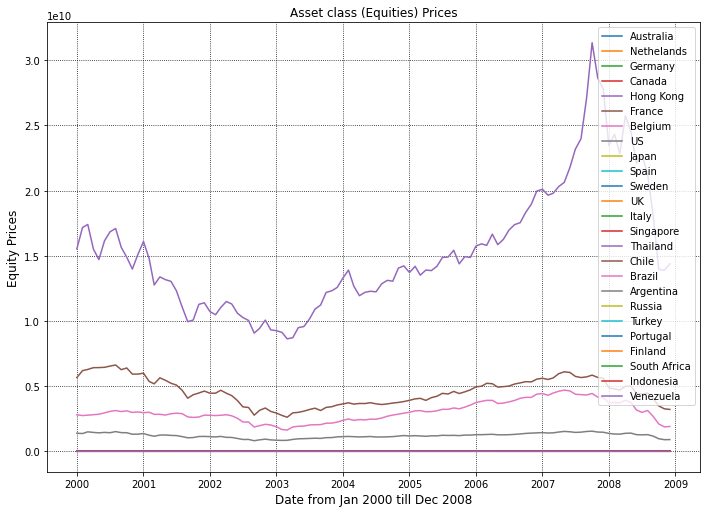

In [61]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Australia, label='Australia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Germany, label='Germany')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Canada, label='Canada')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.France, label='France')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Belgium, label='Belgium')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.US, label='US')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Japan, label='Japan')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Spain, label='Spain')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Sweden, label='Sweden')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.UK, label='UK')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Italy, label='Italy')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Singapore, label='Singapore')

plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Thailand, label='Thailand')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Chile, label='Chile')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Brazil, label='Brazil')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Argentina, label='Argentina')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Russia, label='Russia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Turkey, label='Turkey')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Portugal, label='Portugal')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Finland, label='Finland')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.South_Africa, label='South Africa')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Indonesia, label='Indonesia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

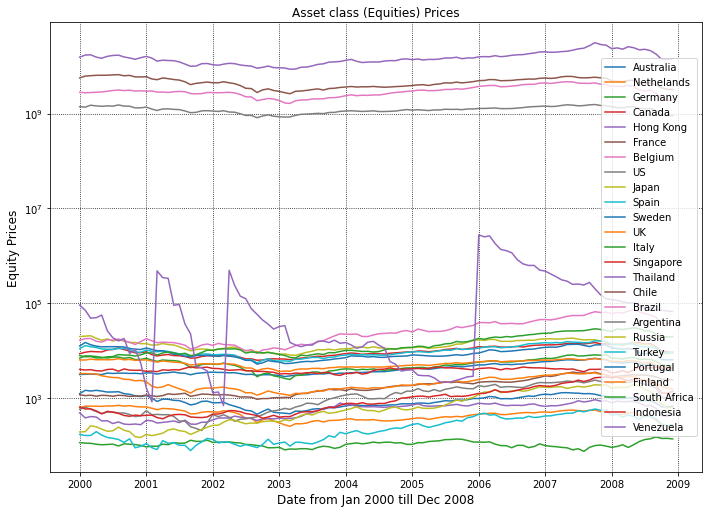

In [62]:
rcParams['figure.figsize'] = 11.69,8.27
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Australia, label='Australia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Germany, label='Germany')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Canada, label='Canada')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.France, label='France')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Belgium, label='Belgium')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.US, label='US')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Japan, label='Japan')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Spain, label='Spain')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Sweden, label='Sweden')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.UK, label='UK')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Italy, label='Italy')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Singapore, label='Singapore')

plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Thailand, label='Thailand')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Chile, label='Chile')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Brazil, label='Brazil')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Argentina, label='Argentina')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Russia, label='Russia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Turkey, label='Turkey')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Portugal, label='Portugal')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Finland, label='Finland')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.South_Africa, label='South Africa')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Indonesia, label='Indonesia')
plt.plot(equity_df_2000_2008.index, equity_df_2000_2008.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [63]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2000_2008 = equity_df_2000_2008[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                                           'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                                           'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                                           'South_Africa','Indonesia','Venezuela']].pct_change()
equity_df_2000_2008.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-01-01        NaN         NaN       NaN       NaN        NaN       NaN   
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   

             Belgium        US     Japan     Spain  ...     Chile    Brazil  \
Date                                                ...                       
2000-01-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  ... -0.039291  0.077612   
2000-03-01  0.011566  0.096720  0.018928 -0.051709  ...  0.020250  0.009070   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  ... -0.047467 -0.128099   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964  ...  0.045748 -0.037393   

            Argentina    Russia    Turkey  Portugal   Finland  South_Africa  \
Date                                                                          
2000-01-01        NaN       NaN       NaN       NaN       NaN           NaN   
2000-02-01   0.115420  0.014194 -0.046007  0.182367  0.001518     -0.062361   
2000-03-01  -0.098790  0.329991 -0.001631 -0.103602 -0.015628      0.013906   
2000-04-01  -0.104929 -0.046450  0.206407 -0.067911 -0.005710     -0.064304   
2000-05-01  -0.088732 -0.106238 -0.156201 -0.030361 -0.084961      0.001176   

            Indonesia  Venezuela  
Date                              
2000-01-01        NaN        NaN  
2000-02-01  -0.094018  -0.225319  
2000-03-01   0.011690  -0.316515  
2000-04-01  -0.096935   0.022690  
2000-05-01  -0.137468   0.137690  

[5 rows x 25 columns]

In [64]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2000_2008.dropna(axis=0, inplace=True)
equity_df_2000_2008.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
2000-06-01   0.074716    0.025385 -0.029743  0.101974   0.097997  0.003156   

             Belgium        US     Japan     Spain  ...     Chile    Brazil  \
Date                                                ...                       
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  ... -0.039291  0.077612   
2000-03-01  0.011566  0.096720  0.018928 -0.051709  ...  0.020250  0.009070   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  ... -0.047467 -0.128099   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964  ...  0.045748 -0.037393   
2000-06-01  0.036446  0.023934  0.066040 -0.010029  ... -0.013814  0.118432   

            Argentina    Russia    Turkey  Portugal   Finland  South_Africa  \
Date                                                                          
2000-02-01   0.115420  0.014194 -0.046007  0.182367  0.001518     -0.062361   
2000-03-01  -0.098790  0.329991 -0.001631 -0.103602 -0.015628      0.013906   
2000-04-01  -0.104929 -0.046450  0.206407 -0.067911 -0.005710     -0.064304   
2000-05-01  -0.088732 -0.106238 -0.156201 -0.030361 -0.084961      0.001176   
2000-06-01   0.070213 -0.101912 -0.107368  0.004993 -0.047145      0.055314   

            Indonesia  Venezuela  
Date                              
2000-02-01  -0.094018  -0.225319  
2000-03-01   0.011690  -0.316515  
2000-04-01  -0.096935   0.022690  
2000-05-01  -0.137468   0.137690  
2000-06-01   0.133779  -0.536033  

[5 rows x 25 columns]

In [65]:
print('There are {} rows in the DataFrame'.format(equity_df_2000_2008.shape[0]))

There are 107 rows in the DataFrame


In [66]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2000_2008_2 = equity_df_2000_2008.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [67]:
vol_equity_df_2000_2008 = equity_df_2000_2008

In [68]:
vol_equity_df_2000_2008.shape[0]

107

In [69]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_equity_df_2000_2008['Australia_Vol'] = vol_equity_df_2000_2008['Australia'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Nethelands_Vol'] = vol_equity_df_2000_2008['Nethelands'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Germany_Vol'] = vol_equity_df_2000_2008['Germany'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Canada_Vol'] = vol_equity_df_2000_2008['Canada'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Hong_Kong_Vol'] = vol_equity_df_2000_2008['Hong_Kong'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['France_Vol'] = vol_equity_df_2000_2008['France'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Belgium_Vol'] = vol_equity_df_2000_2008['Belgium'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['US_Vol'] = vol_equity_df_2000_2008['US'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Japan_Vol'] = vol_equity_df_2000_2008['Japan'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Spain_Vol'] = vol_equity_df_2000_2008['Spain'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Sweden_Vol'] = vol_equity_df_2000_2008['Sweden'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['UK_Vol'] = vol_equity_df_2000_2008['UK'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Italy_Vol'] = vol_equity_df_2000_2008['Italy'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Singapore_Vol'] = vol_equity_df_2000_2008['Singapore'].rolling(107).std() * math.sqrt(107)

vol_equity_df_2000_2008['Thailand_Vol'] = vol_equity_df_2000_2008['Thailand'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Chile_Vol'] = vol_equity_df_2000_2008['Chile'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Brazil_Vol'] = vol_equity_df_2000_2008['Brazil'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Argentina_Vol'] = vol_equity_df_2000_2008['Argentina'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Russia_Vol'] = vol_equity_df_2000_2008['Russia'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Turkey_Vol'] = vol_equity_df_2000_2008['Turkey'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Portugal_Vol'] = vol_equity_df_2000_2008['Portugal'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Finland_Vol'] = vol_equity_df_2000_2008['Finland'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['South_Africa_Vol'] = vol_equity_df_2000_2008['South_Africa'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Indonesia_Vol'] = vol_equity_df_2000_2008['Indonesia'].rolling(107).std() * math.sqrt(107)
vol_equity_df_2000_2008['Venezuela_Vol'] = vol_equity_df_2000_2008['Venezuela'].rolling(107).std() * math.sqrt(107)

In [70]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_equity_df_2000_2008.dropna(axis=0, inplace=True)

In [71]:
vol_equity_df_2000_2008[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                         'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol',
                         'Singapore_Vol','Thailand_Vol','Chile_Vol','Brazil_Vol','Argentina_Vol','Russia_Vol',
                         'Turkey_Vol','Portugal_Vol','Finland_Vol','South_Africa_Vol','Indonesia_Vol','Venezuela_Vol']]

Australia_Vol  Nethelands_Vol  Germany_Vol  Canada_Vol  \
Date                                                                 
2008-12-01       0.376468        0.651517     0.696902    0.480831   

            Hong_Kong_Vol  France_Vol  Belgium_Vol    US_Vol  Japan_Vol  \
Date                                                                      
2008-12-01       0.673485     0.55461     0.546483  0.453638   0.599093   

            Spain_Vol  ...  Chile_Vol  Brazil_Vol  Argentina_Vol  Russia_Vol  \
Date                   ...                                                     
2008-12-01   0.588473  ...   0.476562    0.843757       1.188672    1.042177   

            Turkey_Vol  Portugal_Vol  Finland_Vol  South_Africa_Vol  \
Date                                                                  
2008-12-01    1.343606      0.589814     0.654751          0.605537   

            Indonesia_Vol  Venezuela_Vol  
Date                                      
2008-12-01        0.77786    1324.831557  

[1 rows x 25 columns]

In [72]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_equity = (0.376468+0.651517+0.696902+0.480831+0.673485+0.55461+0.546483+0.453638+0.599093+0.588473+0.680817+0.421485+0.702832+0.548459+0.820671+0.476562+0.843757+1.188672+1.042177+1.343606+0.589814+0.654751+0.605537+0.77786+1324.831557) / 25
Avg_vol_equity

53.646002280000005

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [73]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_equity_2000_2008 = 1 / 25
target_vol_equity_2000_2008

0.04

In [74]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_equity_df_2000_2008 = equity_df_2000_2008

In [75]:
port_equity_df_2000_2008['Australia_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Australia_Vol'] 
port_equity_df_2000_2008['Nethelands_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Nethelands_Vol'] 
port_equity_df_2000_2008['Germany_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Germany_Vol'] 
port_equity_df_2000_2008['Canada_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Canada_Vol']
port_equity_df_2000_2008['Hong_Kong_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Hong_Kong_Vol']
port_equity_df_2000_2008['France_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['France_Vol']
port_equity_df_2000_2008['Belgium_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Belgium_Vol']
port_equity_df_2000_2008['US_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['US_Vol']
port_equity_df_2000_2008['Japan_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Japan_Vol']
port_equity_df_2000_2008['Spain_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Spain_Vol']
port_equity_df_2000_2008['Sweden_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Sweden_Vol']
port_equity_df_2000_2008['UK_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['UK_Vol']
port_equity_df_2000_2008['Italy_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Italy_Vol']
port_equity_df_2000_2008['Singapore_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Singapore_Vol']

port_equity_df_2000_2008['Thailand_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Thailand_Vol']
port_equity_df_2000_2008['Chile_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Chile_Vol']
port_equity_df_2000_2008['Brazil_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Brazil_Vol']
port_equity_df_2000_2008['Argentina_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Argentina_Vol']
port_equity_df_2000_2008['Russia_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Russia_Vol']
port_equity_df_2000_2008['Turkey_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Turkey_Vol']
port_equity_df_2000_2008['Portugal_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Portugal_Vol']
port_equity_df_2000_2008['Finland_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Finland_Vol']
port_equity_df_2000_2008['South_Africa_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['South_Africa_Vol']
port_equity_df_2000_2008['Indonesia_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Indonesia_Vol']
port_equity_df_2000_2008['Venezuela_Alloc'] = target_vol_equity_2000_2008 / vol_equity_df_2000_2008['Venezuela_Vol']


In [76]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_equity_df_2000_2008.dropna(axis=0, inplace=True)

In [77]:
port_equity_df_2000_2008[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                          'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                          'UK_Alloc','Italy_Alloc','Singapore_Alloc','Thailand_Alloc','Chile_Alloc',
                          'Brazil_Alloc','Argentina_Alloc','Russia_Alloc','Turkey_Alloc','Portugal_Alloc',
                          'Finland_Alloc','South_Africa_Alloc','Indonesia_Alloc','Venezuela_Alloc']]

Australia_Alloc  Nethelands_Alloc  Germany_Alloc  Canada_Alloc  \
Date                                                                         
2008-12-01         0.106251          0.061395       0.057397      0.083189   

            Hong_Kong_Alloc  France_Alloc  Belgium_Alloc  US_Alloc  \
Date                                                                 
2008-12-01         0.059393      0.072123       0.073195  0.088176   

            Japan_Alloc  Spain_Alloc  ...  Chile_Alloc  Brazil_Alloc  \
Date                                  ...                              
2008-12-01     0.066768     0.067973  ...     0.083935      0.047407   

            Argentina_Alloc  Russia_Alloc  Turkey_Alloc  Portugal_Alloc  \
Date                                                                      
2008-12-01         0.033651      0.038381      0.029771        0.067818   

            Finland_Alloc  South_Africa_Alloc  Indonesia_Alloc  \
Date                                                             
2008-12-01       0.061092            0.066057         0.051423   

            Venezuela_Alloc  
Date                         
2008-12-01          0.00003  

[1 rows x 25 columns]

In [78]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [79]:
equity_df_2000_2008_2['Australia_R'] = equity_df_2000_2008_2['Australia'] * 0.106251
equity_df_2000_2008_2['Nethelands_R'] = equity_df_2000_2008_2['Nethelands'] * 0.061395
equity_df_2000_2008_2['Germany_R'] = equity_df_2000_2008_2['Germany'] * 0.057397
equity_df_2000_2008_2['Canada_R'] = equity_df_2000_2008_2['Canada'] * 0.083189
equity_df_2000_2008_2['Hong_Kong_R'] = equity_df_2000_2008_2['Hong_Kong'] * 0.059393
equity_df_2000_2008_2['France_R'] = equity_df_2000_2008_2['France'] * 0.072123
equity_df_2000_2008_2['Belgium_R'] = equity_df_2000_2008_2['Belgium'] * 0.073195
equity_df_2000_2008_2['US_R'] = equity_df_2000_2008_2['US'] * 0.088176
equity_df_2000_2008_2['Japan_R'] = equity_df_2000_2008_2['Japan'] * 0.066768
equity_df_2000_2008_2['Spain_R'] = equity_df_2000_2008_2['Spain'] * 0.067973
equity_df_2000_2008_2['Sweden_R'] = equity_df_2000_2008_2['Sweden'] * 0.058753
equity_df_2000_2008_2['UK_R'] = equity_df_2000_2008_2['UK'] * 0.094903
equity_df_2000_2008_2['Italy_R'] = equity_df_2000_2008_2['Italy'] * 0.056913
equity_df_2000_2008_2['Singapore_R'] = equity_df_2000_2008_2['Singapore'] * 0.072932 

equity_df_2000_2008_2['Thailand_R'] = equity_df_2000_2008_2['Thailand'] * 0.048741
equity_df_2000_2008_2['Chile_R'] = equity_df_2000_2008_2['Chile'] * 0.083935
equity_df_2000_2008_2['Brazil_R'] = equity_df_2000_2008_2['Brazil'] * 0.047407
equity_df_2000_2008_2['Argentina_R'] = equity_df_2000_2008_2['Argentina'] * 0.033651
equity_df_2000_2008_2['Russia_R'] = equity_df_2000_2008_2['Russia'] * 0.038381
equity_df_2000_2008_2['Turkey_R'] = equity_df_2000_2008_2['Turkey'] * 0.029771
equity_df_2000_2008_2['Portugal_R'] = equity_df_2000_2008_2['Portugal'] * 0.067818
equity_df_2000_2008_2['Finland_R'] = equity_df_2000_2008_2['Finland'] * 0.061092
equity_df_2000_2008_2['South_Africa_R'] = equity_df_2000_2008_2['South_Africa'] * 0.066057
equity_df_2000_2008_2['Indonesia_R'] = equity_df_2000_2008_2['Indonesia'] * 0.051423
equity_df_2000_2008_2['Venezuela_R'] = equity_df_2000_2008_2['Venezuela'] * 0.00003

In [80]:
equity_df_2000_2008_2.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
2000-06-01   0.074716    0.025385 -0.029743  0.101974   0.097997  0.003156   

             Belgium        US     Japan     Spain  ...   Chile_R  Brazil_R  \
Date                                                ...                       
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  ... -0.003298  0.003679   
2000-03-01  0.011566  0.096720  0.018928 -0.051709  ...  0.001700  0.000430   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  ... -0.003984 -0.006073   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964  ...  0.003840 -0.001773   
2000-06-01  0.036446  0.023934  0.066040 -0.010029  ... -0.001160  0.005615   

            Argentina_R  Russia_R  Turkey_R  Portugal_R  Finland_R  \
Date                                                                 
2000-02-01     0.003884  0.000545 -0.001370    0.012368   0.000093   
2000-03-01    -0.003324  0.012665 -0.000049   -0.007026  -0.000955   
2000-04-01    -0.003531 -0.001783  0.006145   -0.004606  -0.000349   
2000-05-01    -0.002986 -0.004078 -0.004650   -0.002059  -0.005190   
2000-06-01     0.002363 -0.003911 -0.003196    0.000339  -0.002880   

            South_Africa_R  Indonesia_R   Venezuela_R  
Date                                                   
2000-02-01       -0.004119    -0.004835 -6.759573e-06  
2000-03-01        0.000919     0.000601 -9.495464e-06  
2000-04-01       -0.004248    -0.004985  6.807074e-07  
2000-05-01        0.000078    -0.007069  4.130702e-06  
2000-06-01        0.003654     0.006879 -1.608099e-05  

[5 rows x 50 columns]

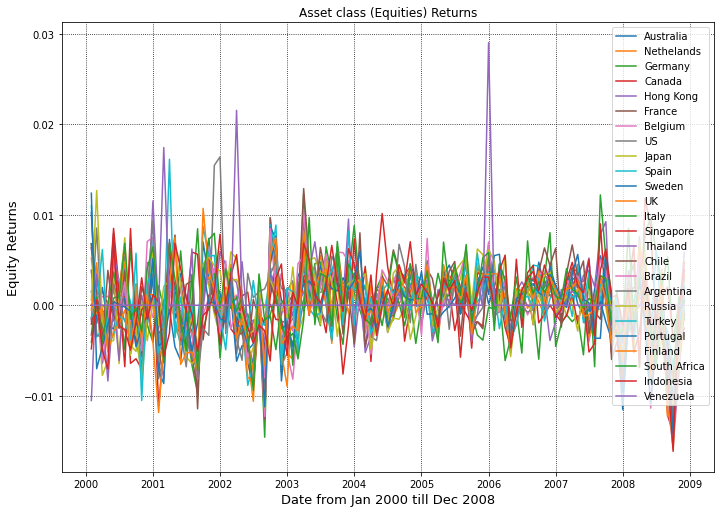

In [81]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Australia_R, label='Australia')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Germany_R, label='Germany')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Canada_R, label='Canada')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.France_R, label='France')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.US_R, label='US')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Japan_R, label='Japan')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Spain_R, label='Spain')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.UK_R, label='UK')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Italy_R, label='Italy')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Singapore_R, label='Singapore')

plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Thailand_R, label='Thailand')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Chile_R, label='Chile')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Brazil_R, label='Brazil')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Argentina_R, label='Argentina')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Russia_R, label='Russia')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Turkey_R, label='Turkey')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Portugal_R, label='Portugal')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Finland_R, label='Finland')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.South_Africa_R, label='South Africa')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Indonesia_R, label='Indonesia')
plt.plot(equity_df_2000_2008_2.index, equity_df_2000_2008_2.Venezuela_R, label='Venezuela')

plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [82]:
# Adding up all the returns of all asset classes for all countries

In [83]:
equity_df_2000_2008_2['Portfolio_R'] = equity_df_2000_2008_2['Australia_R'] + equity_df_2000_2008_2['Nethelands_R'] + equity_df_2000_2008_2['Germany_R'] + equity_df_2000_2008_2['Canada_R'] + equity_df_2000_2008_2['Hong_Kong_R'] + equity_df_2000_2008_2['France_R'] + equity_df_2000_2008_2['Belgium_R'] + equity_df_2000_2008_2['US_R'] + equity_df_2000_2008_2['Japan_R'] + equity_df_2000_2008_2['Spain_R'] + equity_df_2000_2008_2['Sweden_R'] + equity_df_2000_2008_2['UK_R'] + equity_df_2000_2008_2['Italy_R'] + equity_df_2000_2008_2['Singapore_R'] + equity_df_2000_2008_2['Thailand_R'] + equity_df_2000_2008_2['Chile_R'] + equity_df_2000_2008_2['Brazil_R'] + equity_df_2000_2008_2['Argentina_R'] + equity_df_2000_2008_2['Russia_R'] + equity_df_2000_2008_2['Turkey_R'] + equity_df_2000_2008_2['Portugal_R'] + equity_df_2000_2008_2['Finland_R'] + equity_df_2000_2008_2['South_Africa_R'] + equity_df_2000_2008_2['Indonesia_R'] + equity_df_2000_2008_2['Venezuela_R']

In [84]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [85]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2000_2008_2['Equity_Port_Value'] = ((equity_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [86]:
equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
                       'Singapore_R', 'Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R',
                       'Turkey_R','Portugal_R','Finland_R','South_Africa_R','Indonesia_R',
                       'Venezuela_R', 'Portfolio_R', 'Equity_Port_Value']].head(5)

Australia_R  Nethelands_R  Germany_R  Canada_R  Hong_Kong_R  \
Date                                                                      
2000-02-01     0.001532      0.005203   0.006793  0.006355     0.006260   
2000-03-01     0.000296     -0.000184  -0.000339  0.003038     0.000820   
2000-04-01    -0.000593     -0.000084  -0.001395 -0.001009    -0.006439   
2000-05-01    -0.001187     -0.000546  -0.002361 -0.000851    -0.003082   
2000-06-01     0.007939      0.001559  -0.001707  0.008483     0.005820   

            France_R  Belgium_R      US_R   Japan_R   Spain_R  ...  \
Date                                                           ...   
2000-02-01  0.006768  -0.001570 -0.001773  0.001435  0.010983  ...   
2000-03-01  0.001108   0.000847  0.008528  0.001264 -0.003515  ...   
2000-04-01  0.001534   0.000934 -0.002715 -0.007760 -0.002660  ...   
2000-05-01  0.000073   0.000941 -0.001932 -0.006097 -0.004620  ...   
2000-06-01  0.000228   0.002668  0.002110  0.004409 -0.000682  ...   

            Argentina_R  Russia_R  Turkey_R  Portugal_R  Finland_R  \
Date                                                                 
2000-02-01     0.003884  0.000545 -0.001370    0.012368   0.000093   
2000-03-01    -0.003324  0.012665 -0.000049   -0.007026  -0.000955   
2000-04-01    -0.003531 -0.001783  0.006145   -0.004606  -0.000349   
2000-05-01    -0.002986 -0.004078 -0.004650   -0.002059  -0.005190   
2000-06-01     0.002363 -0.003911 -0.003196    0.000339  -0.002880   

            South_Africa_R  Indonesia_R   Venezuela_R  Portfolio_R  \
Date                                                                 
2000-02-01       -0.004119    -0.004835 -6.759573e-06     0.044592   
2000-03-01        0.000919     0.000601 -9.495464e-06     0.023549   
2000-04-01       -0.004248    -0.004985  6.807074e-07    -0.052156   
2000-05-01        0.000078    -0.007069  4.130702e-06    -0.055871   
2000-06-01        0.003654     0.006879 -1.608099e-05     0.041770   

            Equity_Port_Value  
Date                           
2000-02-01        1044.592448  
2000-03-01        1069.191670  
2000-04-01        1013.427200  
2000-05-01         956.805696  
2000-06-01         996.771813  

[5 rows x 27 columns]

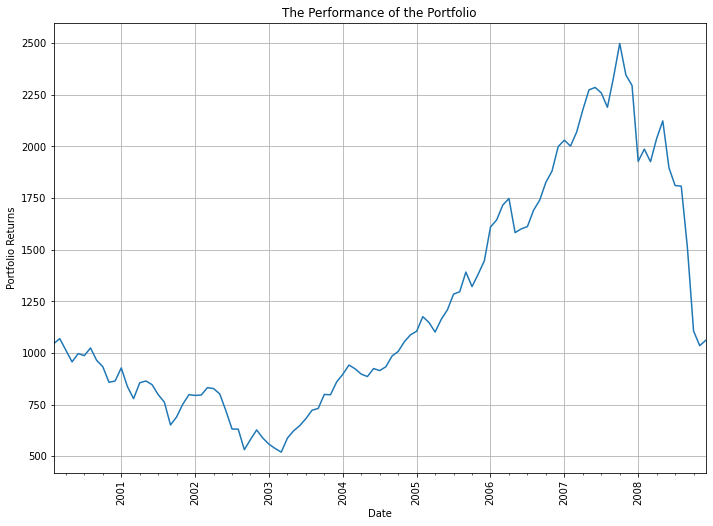

In [87]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date');
plt.ylabel('Portfolio Returns');
equity_df_2000_2008_2['Equity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [88]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2000_2008_2.Equity_Port_Value.max() - equity_df_2000_2008_2.Equity_Port_Value.min()) / equity_df_2000_2008_2.Equity_Port_Value.max()

0.7918388996772519

In [89]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2000_2008_2['Equity_Port_Value'][-1] / equity_df_2000_2008_2['Equity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 1.61%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [90]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2000_2008_2['Monthly_Return'] = equity_df_2000_2008_2['Equity_Port_Value'].pct_change(1)

In [91]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2000_2008_2['Monthly_Return'].mean() / equity_df_2000_2008_2['Monthly_Return'].std()
Sharpe_Ratio

0.036938313945102955

In [92]:
equity_df_2000_2008_2.shape[0]

107

In [93]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(107)
Annualized_Sharpe_Ratio

0.3820928904997418

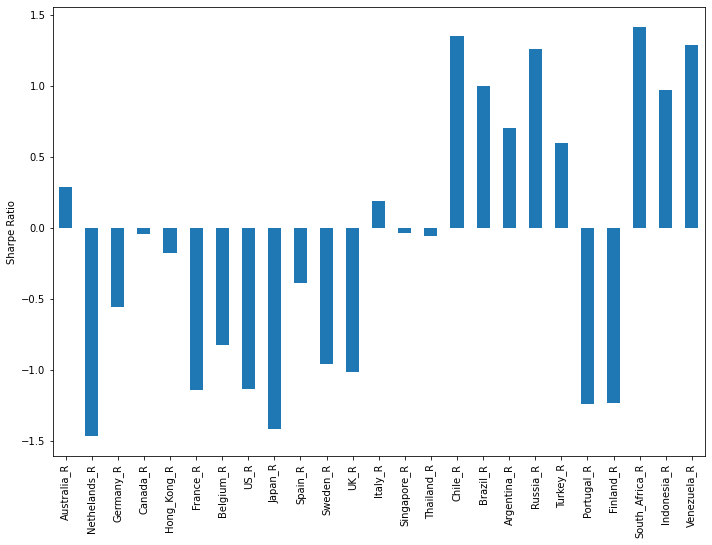

In [94]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 107 # 107 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sharpes = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [95]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [96]:
equity_df_2000_2008_2.shape[0]

107

In [97]:
equity_sortino_ratio(equity_df_2000_2008_2['Portfolio_R'], 107, .0164)

0.5072250999058793

In [98]:
Annualized_Sortino_Ratio = 0.5072250999058793 * np.sqrt(107)
Annualized_Sortino_Ratio

5.246777230955649

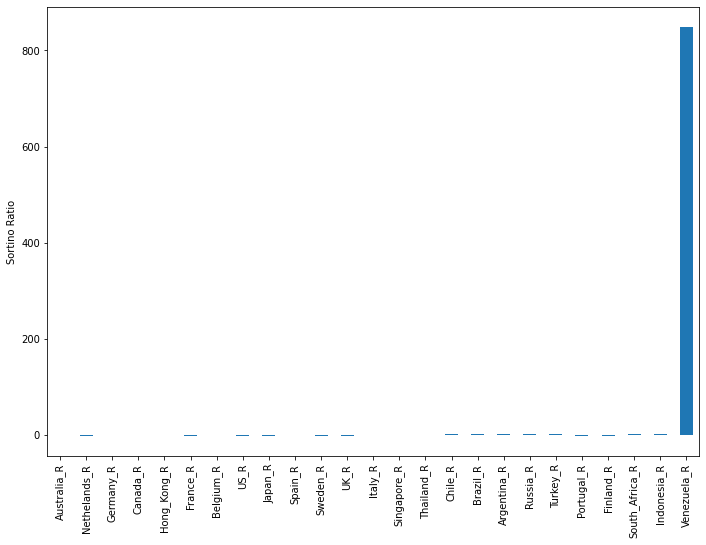

In [99]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 107 # 107 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sortinos = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

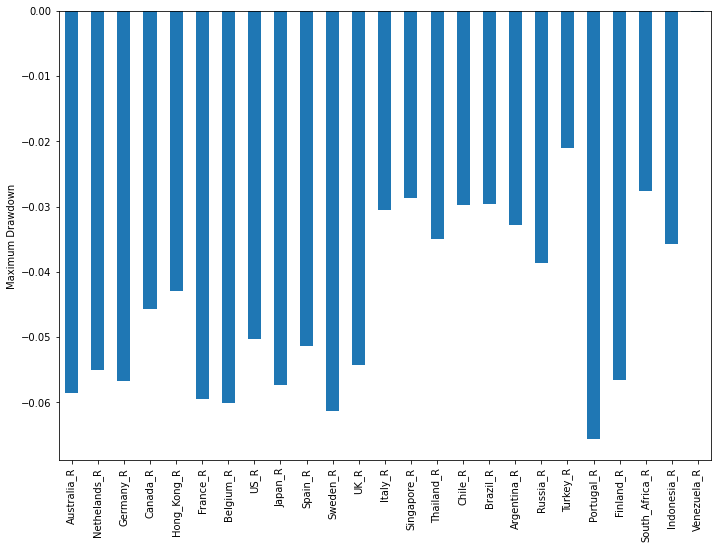

In [100]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_max_drawdown = equity_df_2000_2008_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [101]:
skew(equity_df_2000_2008_2['Equity_Port_Value'].dropna())

0.7265527511332892

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [102]:
kurtosis(equity_df_2000_2008_2['Equity_Port_Value'].dropna())

-0.7657388831122494

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [103]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [104]:
geometric_mean_return(equity_df_2000_2008_2['Portfolio_R'])

0.03569531138611354

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark. - - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [105]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [106]:
information_ratio(equity_df_2000_2008_2['Portfolio_R'], -0.0008239099355196582, 107)

0.005390262842511368

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2008.
- Target volatility 4 %.
- Maximum Drawdown 7.91 %.
- Cumulative return of the of portfolio 1.61 %
- Sharpe Ratio, or Risk-Adjusted Returns 3.69 %.
- Annualized Sharpe Ratio 7400.90 %.
- Sortino Ratio 50.72 %.
- Annualized Sortino Ratio 500.24 %.
- Skewness 72.65 %.
- Kurtosis - 76.57 %.
- Geometric Mean Rate of Return 0.03569531138611354
- Information Ratio 00.53 %

In [107]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df_2000_2008 = pd.read_csv('Commodity_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df_2000_2008.head()

(108, 12)


Date   Gold    WTI  Heat_Oil  Natural_Gas  Silver  US_Coffee  US_Corn  \
0  1/1/2000  283.2  27.64      1.95       2662.0  5287.0      111.1   220.00   
1  2/1/2000  292.4  30.43      1.87       2761.0  5048.0       99.9   215.00   
2  3/1/2000  278.4  26.90      1.84       2945.0  5020.0      103.7   236.00   
3  4/1/2000  273.1  25.74      1.84       3141.0  4960.0       95.3   223.75   
4  5/1/2000  271.7  29.01      1.82       4356.0  4941.0       93.0   225.00   

    Wheat  Copper  Platinum   Cocoa  
0  256.25    0.84     971.4  2541.0  
1  247.00    0.79     900.4  2588.0  
2  262.25    0.80     933.7  2455.0  
3  242.25    0.79     883.4  2451.0  
4  274.75    0.81     931.7  2238.0

In [108]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         108 non-null    object 
 1   Gold         108 non-null    float64
 2   WTI          108 non-null    float64
 3   Heat_Oil     108 non-null    float64
 4   Natural_Gas  108 non-null    float64
 5   Silver       108 non-null    float64
 6   US_Coffee    108 non-null    float64
 7   US_Corn      108 non-null    float64
 8   Wheat        108 non-null    float64
 9   Copper       108 non-null    float64
 10  Platinum     108 non-null    float64
 11  Cocoa        108 non-null    float64
dtypes: float64(11), object(1)
memory usage: 10.2+ KB


In [109]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df_2000_2008['Date'] = pd.to_datetime(commodity_df_2000_2008.Date)

In [110]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df_2000_2008['Natural_Gas'] = commodity_df_2000_2008['Natural_Gas'].astype(float)
commodity_df_2000_2008['Silver'] = commodity_df_2000_2008['Silver'].astype(float)
commodity_df_2000_2008['Copper'] = commodity_df_2000_2008['Copper'].astype(float)
commodity_df_2000_2008['Cocoa'] = commodity_df_2000_2008['Cocoa'].astype(float)

In [111]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         108 non-null    datetime64[ns]
 1   Gold         108 non-null    float64       
 2   WTI          108 non-null    float64       
 3   Heat_Oil     108 non-null    float64       
 4   Natural_Gas  108 non-null    float64       
 5   Silver       108 non-null    float64       
 6   US_Coffee    108 non-null    float64       
 7   US_Corn      108 non-null    float64       
 8   Wheat        108 non-null    float64       
 9   Copper       108 non-null    float64       
 10  Platinum     108 non-null    float64       
 11  Cocoa        108 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 10.2 KB


In [112]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df_2000_2008.set_index('Date',inplace=True)

In [113]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df_2000_2008.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

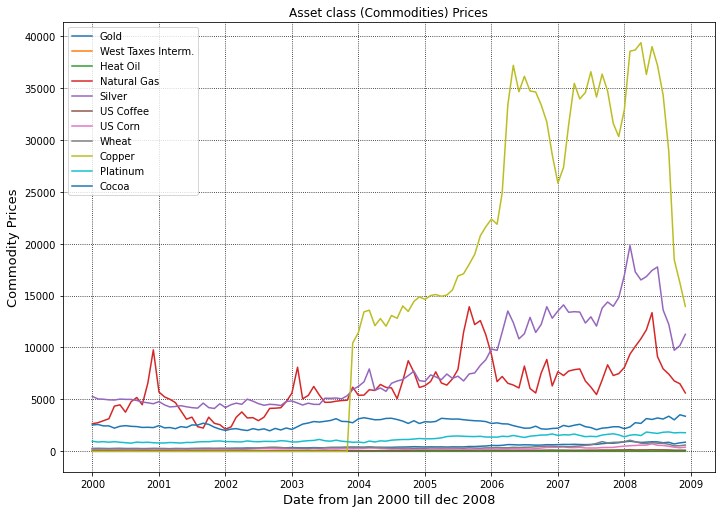

In [114]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Gold, label='Gold')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Silver, label='Silver')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.US_Corn, label='US Corn')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Wheat, label='Wheat')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Copper, label='Copper')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Platinum, label='Platinum')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Cocoa, label='Cocoa')

plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2000 till dec 2008', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

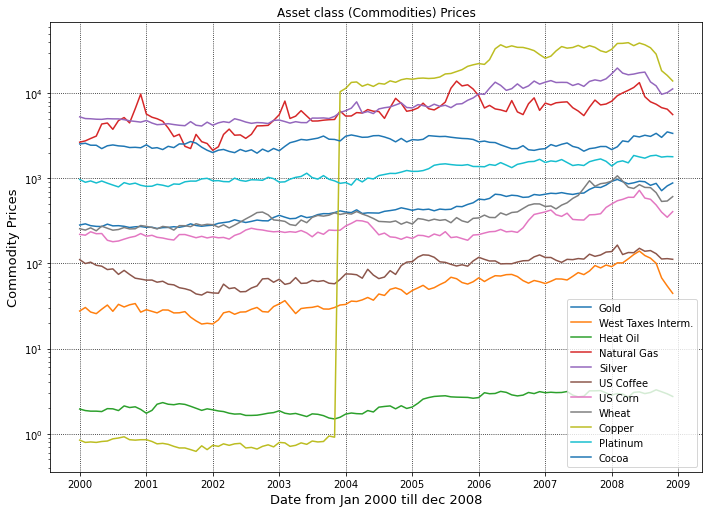

In [115]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Gold, label='Gold')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Silver, label='Silver')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.US_Corn, label='US Corn')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Wheat, label='Wheat')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Copper, label='Copper')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Platinum, label='Platinum')
plt.plot(commodity_df_2000_2008.index, commodity_df_2000_2008.Cocoa, label='Cocoa')

plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2000 till dec 2008', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [116]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df_2000_2008 = commodity_df_2000_2008[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee',
                                                 'US_Corn','Wheat','Copper','Platinum','Cocoa']].pct_change()
commodity_df_2000_2008.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-01-01       NaN       NaN       NaN          NaN       NaN        NaN   
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2000-01-01       NaN       NaN       NaN       NaN       NaN  
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  0.018497  
2000-03-01  0.097674  0.061741  0.012658  0.036984 -0.051391  
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872 -0.001629  
2000-05-01  0.005587  0.134159  0.025316  0.054675 -0.086903

In [117]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df_2000_2008.dropna(axis=0, inplace=True)
commodity_df_2000_2008.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   
2000-06-01  0.067722  0.120303  0.082418     0.027548  0.018620  -0.087634   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  0.018497  
2000-03-01  0.097674  0.061741  0.012658  0.036984 -0.051391  
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872 -0.001629  
2000-05-01  0.005587  0.134159  0.025316  0.054675 -0.086903  
2000-06-01 -0.166667 -0.055505  0.012346 -0.056671  0.079982

In [118]:
print('There are {} rows in the DataFrame'.format(commodity_df_2000_2008.shape[0]))

There are 107 rows in the DataFrame


In [119]:
# Use pandas.DataFrame.copy() function to make a copy of commodity_df
commodity_df_2000_2008_2 = commodity_df_2000_2008.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [120]:
vol_com_df_2000_2008 = commodity_df_2000_2008

In [121]:
vol_com_df_2000_2008.shape[0]

107

In [122]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df_2000_2008['Gold_Vol'] = vol_com_df_2000_2008['Gold'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['WTI_Vol'] = vol_com_df_2000_2008['WTI'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Heat_Oil_Vol'] = vol_com_df_2000_2008['Heat_Oil'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Natural_Gas_Vol'] = vol_com_df_2000_2008['Natural_Gas'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Silver_Vol'] = vol_com_df_2000_2008['Silver'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['US_Coffee_Vol'] = vol_com_df_2000_2008['US_Coffee'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['US_Corn_Vol'] = vol_com_df_2000_2008['US_Corn'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Wheat_Vol'] = vol_com_df_2000_2008['Wheat'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Copper_Vol'] = vol_com_df_2000_2008['Copper'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Platinum_Vol'] = vol_com_df_2000_2008['Platinum'].rolling(107).std() * math.sqrt(107)
vol_com_df_2000_2008['Cocoa_Vol'] = vol_com_df_2000_2008['Cocoa'].rolling(107).std() * math.sqrt(107)

In [123]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df_2000_2008.dropna(axis=0, inplace=True)

In [124]:
vol_com_df_2000_2008[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
                      'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

Gold_Vol   WTI_Vol  Heat_Oil_Vol  Natural_Gas_Vol  Silver_Vol  \
Date                                                                        
2008-12-01  0.505356  1.022685      0.592443         1.949361    0.852281   

            US_Coffee_Vol  US_Corn_Vol  Wheat_Vol    Copper_Vol  Platinum_Vol  \
Date                                                                            
2008-12-01       0.978744     0.880857    0.85981  11460.531222      0.639895   

            Cocoa_Vol  
Date                   
2008-12-01   0.677275

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [125]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.505356+1.022685+0.592443+1.949361+0.852281+0.978744+0.880857+0.85981+11460.531222+0.639895+0.677275) / 11
volatility_com

1042.6809026363635

In [126]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 1 / 11
commodity_target_vol

0.09090909090909091

In [127]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
port_com_df_2000_2008 = commodity_df_2000_2008

In [128]:
port_com_df_2000_2008['Gold_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Gold_Vol']
port_com_df_2000_2008['WTI_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['WTI_Vol']
port_com_df_2000_2008['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Heat_Oil_Vol']
port_com_df_2000_2008['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Natural_Gas_Vol']
port_com_df_2000_2008['Silver_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Silver_Vol']
port_com_df_2000_2008['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['US_Coffee_Vol']
port_com_df_2000_2008['US_Corn_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['US_Corn_Vol']
port_com_df_2000_2008['Wheat_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Wheat_Vol']
port_com_df_2000_2008['Copper_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Copper_Vol']
port_com_df_2000_2008['Platinum_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Platinum_Vol']
port_com_df_2000_2008['Cocoa_Alloc'] = commodity_target_vol / vol_com_df_2000_2008['Cocoa_Vol']

In [129]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_com_df_2000_2008.dropna(axis=0, inplace=True)

In [130]:
port_com_df_2000_2008[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

Gold_Alloc  WTI_Alloc  Heat_Oil_Alloc  Natural_Gas_Alloc  \
Date                                                                   
2008-12-01    0.179891   0.088893        0.153448           0.046635   

            Silver_Alloc  US_Coffee_Alloc  US_Corn_Alloc  Wheat_Alloc  \
Date                                                                    
2008-12-01      0.106666         0.092883       0.103205     0.105732   

            Copper_Alloc  Platinum_Alloc  Cocoa_Alloc  
Date                                                   
2008-12-01      0.000008        0.142069     0.134228

In [131]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [132]:
commodity_df_2000_2008_2['Gold_R'] = commodity_df_2000_2008_2['Gold'] * 0.179891
commodity_df_2000_2008_2['WTI_R'] = commodity_df_2000_2008_2['WTI'] * 0.088893
commodity_df_2000_2008_2['Heat_Oil_R'] = commodity_df_2000_2008_2['Heat_Oil'] * 0.153448
commodity_df_2000_2008_2['Natural_Gas_R'] = commodity_df_2000_2008_2['Natural_Gas'] * 0.046635
commodity_df_2000_2008_2['Silver_R'] = commodity_df_2000_2008_2['Silver'] * 0.106666
commodity_df_2000_2008_2['US_Coffee_R'] = commodity_df_2000_2008_2['US_Coffee'] * 0.092883
commodity_df_2000_2008_2['US_Corn_R'] = commodity_df_2000_2008_2['US_Corn'] * 0.103205
commodity_df_2000_2008_2['Wheat_R'] = commodity_df_2000_2008_2['Wheat'] * 0.105732
commodity_df_2000_2008_2['Copper_R'] = commodity_df_2000_2008_2['Copper'] * 0.000008
commodity_df_2000_2008_2['Platinum_R'] = commodity_df_2000_2008_2['Platinum'] * 0.142069
commodity_df_2000_2008_2['Cocoa_R'] = commodity_df_2000_2008_2['Cocoa'] * 0.134228

In [133]:
commodity_df_2000_2008_2.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   
2000-06-01  0.067722  0.120303  0.082418     0.027548  0.018620  -0.087634   

             US_Corn     Wheat    Copper  Platinum  ...     WTI_R  Heat_Oil_R  \
Date                                                ...                         
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  ...  0.008973   -0.006295   
2000-03-01  0.097674  0.061741  0.012658  0.036984  ... -0.010312   -0.002462   
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872  ... -0.003833    0.000000   
2000-05-01  0.005587  0.134159  0.025316  0.054675  ...  0.011293   -0.001668   
2000-06-01 -0.166667 -0.055505  0.012346 -0.056671  ...  0.010694    0.012647   

            Natural_Gas_R  Silver_R  US_Coffee_R  US_Corn_R   Wheat_R  \
Date                                                                    
2000-02-01       0.001734 -0.004822    -0.009364  -0.002346 -0.003817   
2000-03-01       0.003108 -0.000592     0.003533   0.010080  0.006528   
2000-04-01       0.003104 -0.001275    -0.007524  -0.005357 -0.008063   
2000-05-01       0.018039 -0.000409    -0.002242   0.000577  0.014185   
2000-06-01       0.001285  0.001986    -0.008140  -0.017201 -0.005869   

                Copper_R  Platinum_R   Cocoa_R  
Date                                            
2000-02-01 -4.761905e-07   -0.010384  0.002483  
2000-03-01  1.012658e-07    0.005254 -0.006898  
2000-04-01 -1.000000e-07   -0.007653 -0.000219  
2000-05-01  2.025316e-07    0.007768 -0.011665  
2000-06-01  9.876543e-08   -0.008051  0.010736  

[5 rows x 22 columns]

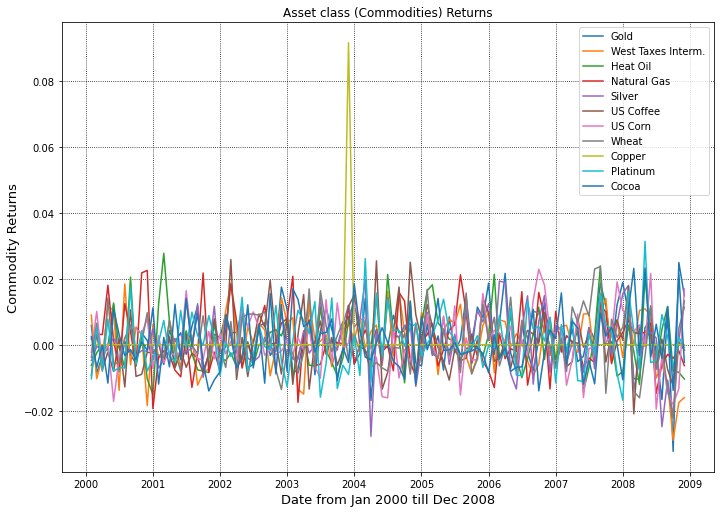

In [134]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Gold_R, label='Gold')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.WTI_R, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Heat_Oil_R, label='Heat Oil')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Natural_Gas_R, label='Natural Gas')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Silver_R, label='Silver')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.US_Coffee_R, label='US Coffee')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.US_Corn_R, label='US Corn')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Wheat_R, label='Wheat')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Copper_R, label='Copper')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Platinum_R, label='Platinum')
plt.plot(commodity_df_2000_2008_2.index, commodity_df_2000_2008_2.Cocoa_R, label='Cocoa')

plt.title('Asset class (Commodities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Commodity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [135]:
# Adding up all the returns of all asset classes for all commodities

In [136]:
commodity_df_2000_2008_2['Portfolio_R'] = commodity_df_2000_2008_2['Gold_R'] + commodity_df_2000_2008_2['WTI_R'] + commodity_df_2000_2008_2['Heat_Oil_R'] + commodity_df_2000_2008_2['Natural_Gas_R'] + commodity_df_2000_2008_2['Silver_R'] + commodity_df_2000_2008_2['US_Coffee_R'] + commodity_df_2000_2008_2['US_Corn_R'] + commodity_df_2000_2008_2['Wheat_R'] + commodity_df_2000_2008_2['Copper_R'] + commodity_df_2000_2008_2['Platinum_R'] + commodity_df_2000_2008_2['Cocoa_R']

In [137]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [138]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2000_2008_2['Commodity_Port_Value'] = ((commodity_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [139]:
commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
                          'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Commodity_Port_Value']].head(5)

Gold_R     WTI_R  Heat_Oil_R  Natural_Gas_R  Silver_R  \
Date                                                                  
2000-02-01  0.005844  0.008973   -0.006295       0.001734 -0.004822   
2000-03-01 -0.008613 -0.010312   -0.002462       0.003108 -0.000592   
2000-04-01 -0.003425 -0.003833    0.000000       0.003104 -0.001275   
2000-05-01 -0.000922  0.011293   -0.001668       0.018039 -0.000409   
2000-06-01  0.012183  0.010694    0.012647       0.001285  0.001986   

            US_Coffee_R  US_Corn_R   Wheat_R      Copper_R  Platinum_R  \
Date                                                                     
2000-02-01    -0.009364  -0.002346 -0.003817 -4.761905e-07   -0.010384   
2000-03-01     0.003533   0.010080  0.006528  1.012658e-07    0.005254   
2000-04-01    -0.007524  -0.005357 -0.008063 -1.000000e-07   -0.007653   
2000-05-01    -0.002242   0.000577  0.014185  2.025316e-07    0.007768   
2000-06-01    -0.008140  -0.017201 -0.005869  9.876543e-08   -0.008051   

             Cocoa_R  Portfolio_R  Commodity_Port_Value  
Date                                                     
2000-02-01  0.002483    -0.017993            982.006669  
2000-03-01 -0.006898    -0.000373            981.640584  
2000-04-01 -0.000219    -0.034246            948.023610  
2000-05-01 -0.011665     0.034956            981.163047  
2000-06-01  0.010736     0.010270            991.239436

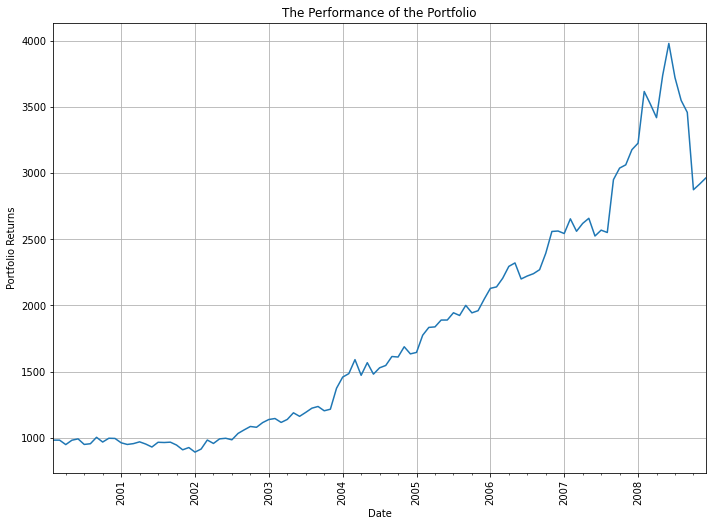

In [140]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
commodity_df_2000_2008_2['Commodity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [141]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2000_2008_2.Commodity_Port_Value.max() - commodity_df_2000_2008_2.Commodity_Port_Value.min()) / commodity_df_2000_2008_2.Commodity_Port_Value.max()

0.7761464818476083

In [142]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2000_2008_2['Commodity_Port_Value'][-1] / commodity_df_2000_2008_2['Commodity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 201.76%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [143]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2000_2008_2['Monthly_Return'] = commodity_df_2000_2008_2['Commodity_Port_Value'].pct_change(1)

In [144]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2000_2008_2['Monthly_Return'].mean() / commodity_df_2000_2008_2['Monthly_Return'].std()
Sharpe_Ratio

0.26401880902554914

In [145]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(107)
Annualized_Sharpe_Ratio

2.7310317963293333

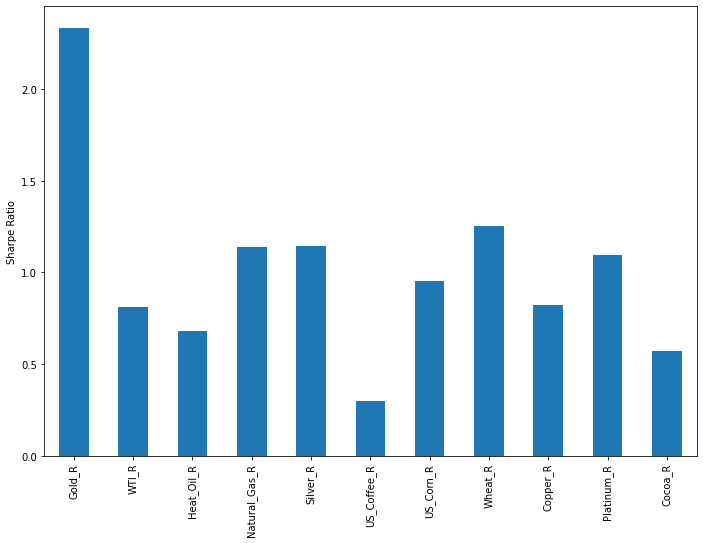

In [146]:
# Calcualte the Sharpe Ratio for commodity portfolio
def commodity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 107 # 107 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sharpes = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
commodity_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [147]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [148]:
commodity_df_2000_2008_2.shape[0]

107

In [149]:
commodity_sortino_ratio(commodity_df_2000_2008_2['Portfolio_R'], 107, .0164)

3.860216342259726

In [150]:
Annualized_Sortino_Ratio = 3.860216342259726 * np.sqrt(107)
Annualized_Sortino_Ratio

39.93038833229962

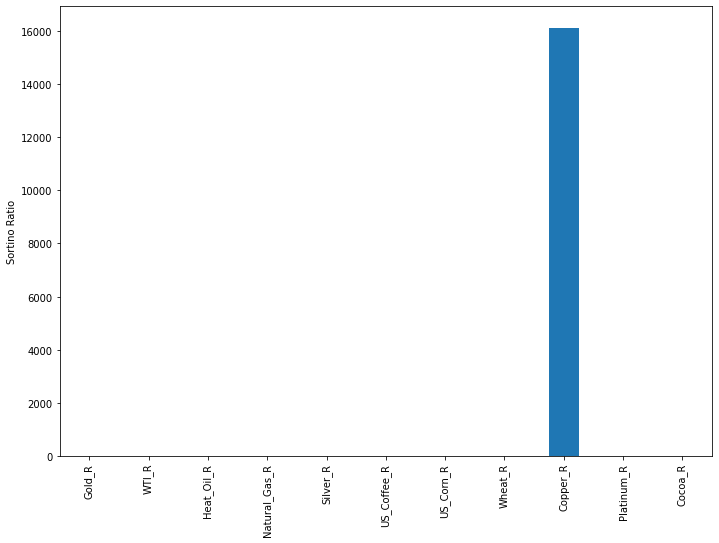

In [151]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 107 # 107 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sortinos = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
commodity_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

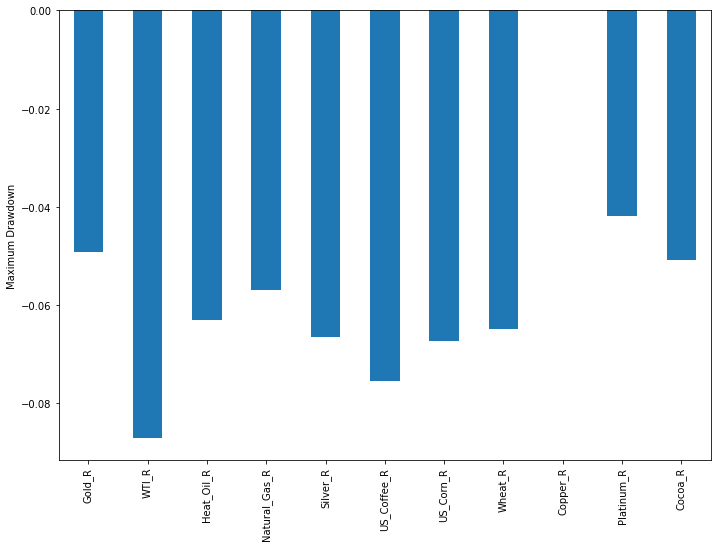

In [152]:
# Calcualte the Maximum Drawdown (MDD) for commodity portfolio
def commodity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_max_drawdown = commodity_df_2000_2008_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
commodity_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [153]:
skew(commodity_df_2000_2008_2['Commodity_Port_Value'].dropna())

0.7909467270188107

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [154]:
kurtosis(commodity_df_2000_2008_2['Commodity_Port_Value'].dropna())

-0.47324806148130305

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [155]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [156]:
geometric_mean_return(commodity_df_2000_2008_2['Portfolio_R'])

0.020611327642569708

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark.

- This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [157]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [158]:
information_ratio(commodity_df_2000_2008_2['Portfolio_R'], 0.007630824509360875, 107)

0.007869964442959211

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2008.
- Target volatility 9 %.
- Maximum Drawdown 77 %.
- Cumulative return of the of portfolio 201 %
- Sharpe Ratio, or Risk-Adjusted Return 26.40 %.
- Annualized Sharpe Ratio 7400.90 %.
- Sortino ratio 300.86 %.
- Annualized Sortino Ratio 3900.93 %.
- Skewness 79.09 %.
- Kurtosis - 47.32 %.
- Geometric Mean rate of Return 0.020611327642569708
- Information Ratio 00.78 %.

In [159]:
# Dataset (Currency.csv) from Master Equity Portfolio Excel file
# We have five different currency:Australian dollar (AUD), Euro, Canadian dollar (CAD), Japanese yen (JPY),
# and British pound sterling (GBP.)

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
currency_df_2000_2008 = pd.read_csv('Currency_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(currency_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
currency_df_2000_2008.head()

(108, 6)


Date   AUD  EURO   CAD     JPY   GBP
0  1/1/2000  1.42  0.89  1.30  108.68  0.76
1  2/1/2000  1.48  0.91  1.33  109.51  0.77
2  3/1/2000  1.45  0.90  1.32  108.08  0.77
3  4/1/2000  1.48  0.92  1.32  108.09  0.81
4  5/1/2000  1.49  0.91  1.33  106.22  0.82

In [160]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    108 non-null    object 
 1   AUD     108 non-null    float64
 2   EURO    108 non-null    float64
 3   CAD     108 non-null    float64
 4   JPY     108 non-null    float64
 5   GBP     108 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.2+ KB


In [161]:
# Use pandas.to_datetime() function to convert argument to datetime
currency_df_2000_2008['Date'] = pd.to_datetime(currency_df_2000_2008.Date)

In [162]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    108 non-null    datetime64[ns]
 1   AUD     108 non-null    float64       
 2   EURO    108 non-null    float64       
 3   CAD     108 non-null    float64       
 4   JPY     108 non-null    float64       
 5   GBP     108 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 5.2 KB


In [163]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
currency_df_2000_2008.set_index('Date',inplace=True)

In [164]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
currency_df_2000_2008.isnull().any()

AUD     False
EURO    False
CAD     False
JPY     False
GBP     False
dtype: bool

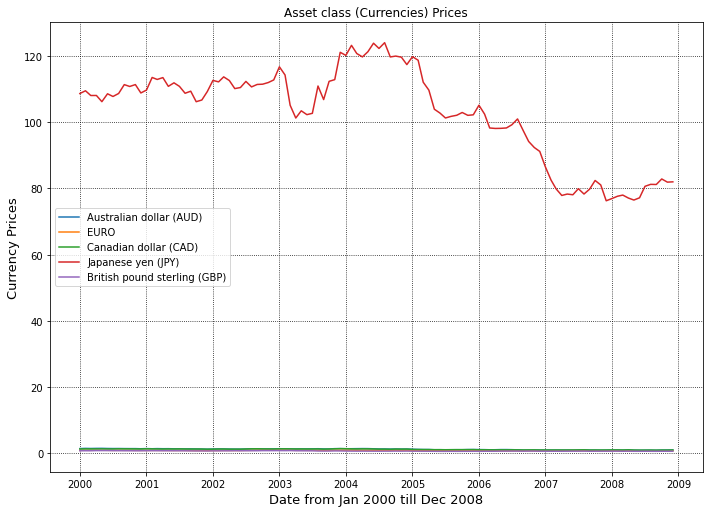

In [165]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.EURO, label='EURO')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.GBP, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

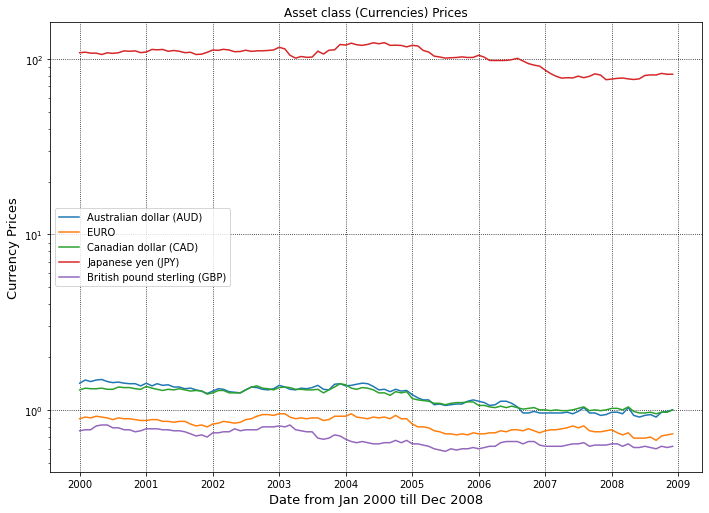

In [166]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.EURO, label='EURO')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2008.index, currency_df_2000_2008.GBP, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [167]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
currency_df_2000_2008 = currency_df_2000_2008[['AUD','EURO','CAD','JPY','GBP']].pct_change()
currency_df_2000_2008.head(5)

AUD      EURO       CAD       JPY       GBP
Date                                                        
2000-01-01       NaN       NaN       NaN       NaN       NaN
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346

In [168]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
currency_df_2000_2008.dropna(axis=0, inplace=True)
currency_df_2000_2008.head(5)

AUD      EURO       CAD       JPY       GBP
Date                                                        
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346
2000-06-01 -0.026846 -0.010989 -0.015038  0.022406  0.000000

In [169]:
print('There are {} rows in the DataFrame'.format(currency_df_2000_2008.shape[0]))

There are 107 rows in the DataFrame


In [170]:
# Use pandas.DataFrame.copy() function to make a copy of currency_df
currency_df_2000_2008_2 = currency_df_2000_2008.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [171]:
vol_curr_df_2000_2008 = currency_df_2000_2008

In [172]:
vol_curr_df_2000_2008.shape[0]

107

In [173]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_curr_df_2000_2008['AUD_Vol'] = vol_curr_df_2000_2008['AUD'].rolling(107).std() * math.sqrt(107)
vol_curr_df_2000_2008['EURO_Vol'] = vol_curr_df_2000_2008['EURO'].rolling(107).std() * math.sqrt(107)
vol_curr_df_2000_2008['CAD_Vol'] = vol_curr_df_2000_2008['CAD'].rolling(107).std() * math.sqrt(107)
vol_curr_df_2000_2008['JPY_Vol'] = vol_curr_df_2000_2008['JPY'].rolling(107).std() * math.sqrt(107)
vol_curr_df_2000_2008['GBP_Vol'] = vol_curr_df_2000_2008['GBP'].rolling(107).std() * math.sqrt(107)

In [174]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_curr_df_2000_2008.dropna(axis=0, inplace=True)

In [175]:
vol_curr_df_2000_2008[['AUD_Vol','EURO_Vol','CAD_Vol','JPY_Vol','GBP_Vol']]

AUD_Vol  EURO_Vol   CAD_Vol   JPY_Vol   GBP_Vol
Date                                                        
2008-12-01  0.315677  0.248327  0.241576  0.260031  0.247969

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy that focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, the Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that the RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [176]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_curr = (0.315677+0.248327+0.241576+0.260031+0.247969) / 5
Avg_vol_curr

0.262716

In [177]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
curr_target_vol = 0.262716 / 5
curr_target_vol

0.0525432

In [178]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_curr_df_2000_2008 = currency_df_2000_2008

In [179]:
port_curr_df_2000_2008['AUD_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['AUD_Vol'] 
port_curr_df_2000_2008['EURO_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['EURO_Vol'] 
port_curr_df_2000_2008['CAD_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['CAD_Vol'] 
port_curr_df_2000_2008['JPY_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['JPY_Vol'] 
port_curr_df_2000_2008['GBP_Alloc'] = curr_target_vol / vol_curr_df_2000_2008['GBP_Vol'] 

In [180]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_curr_df_2000_2008.dropna(axis=0, inplace=True)

In [181]:
port_curr_df_2000_2008[['AUD_Alloc','EURO_Alloc','CAD_Alloc','JPY_Alloc','GBP_Alloc']]

AUD_Alloc  EURO_Alloc  CAD_Alloc  JPY_Alloc  GBP_Alloc
Date                                                              
2008-12-01   0.166446    0.211589   0.217501   0.202065   0.211894

In [182]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (currencies)

In [183]:
currency_df_2000_2008_2['AUD_R'] = currency_df_2000_2008_2['AUD'] * 0.166446
currency_df_2000_2008_2['EURO_R'] = currency_df_2000_2008_2['EURO'] * 0.211589
currency_df_2000_2008_2['CAD_R'] = currency_df_2000_2008_2['CAD'] * 0.217501
currency_df_2000_2008_2['JPY_R'] = currency_df_2000_2008_2['JPY'] * 0.202065
currency_df_2000_2008_2['GBP_R'] = currency_df_2000_2008_2['GBP'] * 0.211894

In [184]:
currency_df_2000_2008_2.head(5)

AUD      EURO       CAD       JPY       GBP     AUD_R  \
Date                                                                     
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158  0.007033   
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000 -0.003374   
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948  0.003444   
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346  0.001125   
2000-06-01 -0.026846 -0.010989 -0.015038  0.022406  0.000000 -0.004468   

              EURO_R     CAD_R     JPY_R     GBP_R  
Date                                                
2000-02-01  0.004755  0.005019  0.001543  0.002788  
2000-03-01 -0.002325 -0.001635 -0.002639  0.000000  
2000-04-01  0.004702  0.000000  0.000019  0.011007  
2000-05-01 -0.002300  0.001648 -0.003496  0.002616  
2000-06-01 -0.002325 -0.003271  0.004528  0.000000

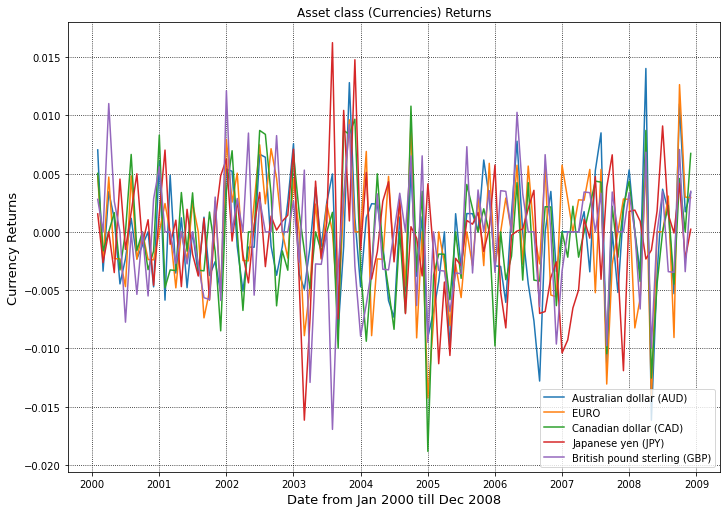

In [185]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.AUD_R, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.EURO_R, label='EURO')
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.CAD_R, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.JPY_R, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2008_2.index, currency_df_2000_2008_2.GBP_R, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

In [186]:
# Adding up all the returns of all asset classes for all currencies (AUD, EURO, CAD, JPY, and GBP)

In [187]:
currency_df_2000_2008_2['Portfolio_R'] = currency_df_2000_2008_2['AUD_R'] + currency_df_2000_2008_2['EURO_R'] + currency_df_2000_2008_2['CAD_R'] + currency_df_2000_2008_2['JPY_R'] + currency_df_2000_2008_2['GBP_R']

In [188]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [189]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
currency_df_2000_2008_2['Currency_Port_Value'] = ((currency_df_2000_2008_2['Portfolio_R'] + 1).cumprod())*1000

In [190]:
currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R','Portfolio_R', 'Currency_Port_Value']].head(5)

AUD_R    EURO_R     CAD_R     JPY_R     GBP_R  Portfolio_R  \
Date                                                                        
2000-02-01  0.007033  0.004755  0.005019  0.001543  0.002788     0.021138   
2000-03-01 -0.003374 -0.002325 -0.001635 -0.002639  0.000000    -0.009973   
2000-04-01  0.003444  0.004702  0.000000  0.000019  0.011007     0.019172   
2000-05-01  0.001125 -0.002300  0.001648 -0.003496  0.002616    -0.000407   
2000-06-01 -0.004468 -0.002325 -0.003271  0.004528  0.000000    -0.005537   

            Currency_Port_Value  
Date                             
2000-02-01          1021.138262  
2000-03-01          1010.954446  
2000-04-01          1030.336328  
2000-05-01          1029.916631  
2000-06-01          1024.214332

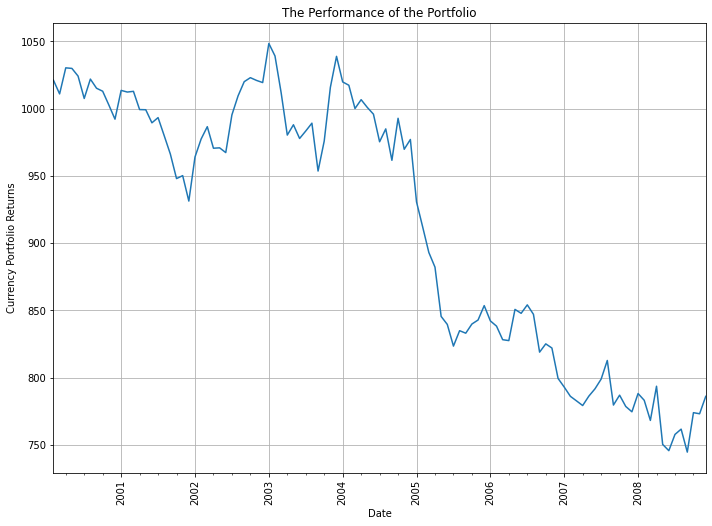

In [191]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2000 till Dec 2008')
plt.ylabel('Currency Portfolio Returns')
currency_df_2000_2008_2['Currency_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [192]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
# (currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
print("The Maximum Drawdown (MDD) of the Portfolio is {:.2f} %".format((currency_df_2000_2008_2.Currency_Port_Value.max() - currency_df_2000_2008_2.Currency_Port_Value.min()) / currency_df_2000_2008_2.Currency_Port_Value.max()
))

The Maximum Drawdown (MDD) of the Portfolio is 0.29 %


In [193]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (currency_df_2000_2008_2['Currency_Port_Value'][-1] / currency_df_2000_2008_2['Currency_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f} %".format(cumulative_return))

The Cumulative Return of the Portfolio is -23.03 %


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [194]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
currency_df_2000_2008_2['Monthly_Return'] = currency_df_2000_2008_2['Currency_Port_Value'].pct_change(1)

In [195]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = currency_df_2000_2008_2['Monthly_Return'].mean() / currency_df_2000_2008_2['Monthly_Return'].std()
Sharpe_Ratio

-0.12625923635006125

In [196]:
currency_df_2000_2008_2.shape[0]

107

In [197]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(107)
Annualized_Sharpe_Ratio

-1.3060356961875

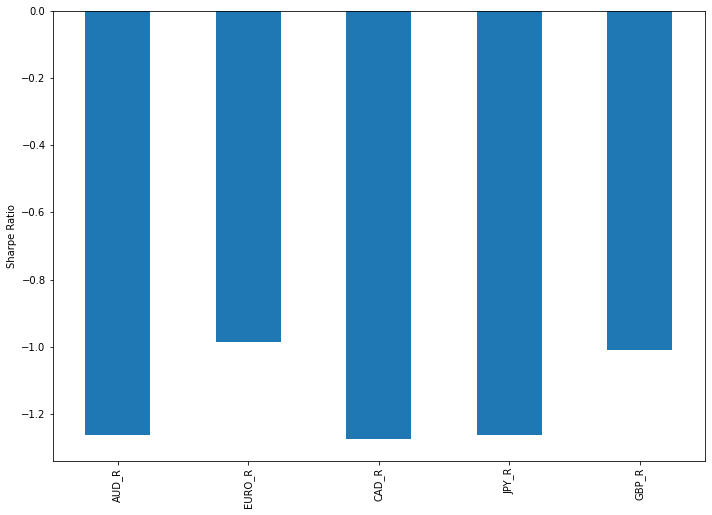

In [198]:
# Calcualte the Sharpe Ratio for currency portfolio
def currency_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 107 # 107 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sharpes = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
currency_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [199]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [200]:
currency_df_2000_2008_2.shape[0]

107

In [201]:
currency_sortino_ratio(currency_df_2000_2008_2['Portfolio_R'], 107, .0164)

-1.9004209598244375

In [202]:
Annualized_Sortino_Ratio = -1.9004209598244375 * np.sqrt(107)
Annualized_Sortino_Ratio

-19.658107264581297

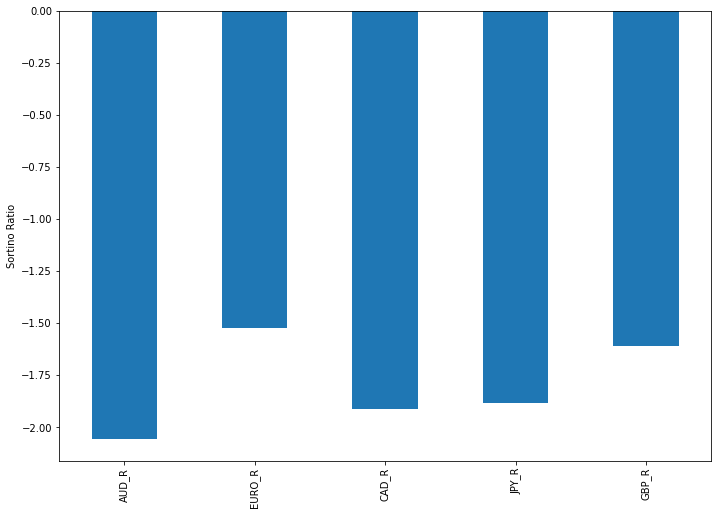

In [203]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 107 # 107 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sortinos = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
currency_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

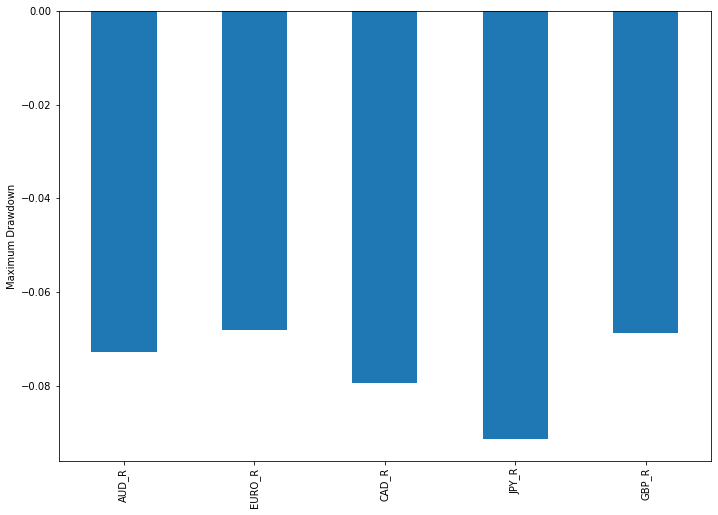

In [204]:
# Calcualte the Maximum Drawdown (MDD) for currency portfolio
def currency_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_max_drawdown = currency_df_2000_2008_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
currency_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [205]:
skew(currency_df_2000_2008_2['Currency_Port_Value'].dropna())

-0.3188543234120905

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [206]:
kurtosis(currency_df_2000_2008_2['Currency_Port_Value'].dropna())

-1.5453071583289535

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [207]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [208]:
geometric_mean_return(currency_df_2000_2008_2['Portfolio_R'])

0.009271255995709306

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark.

- This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [209]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [210]:
information_ratio(currency_df_2000_2008_2['Portfolio_R'], -0.0006920476993685473, 107)

-0.00738458347887781

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2008.
- Target volatility 5.25 %.
- Maximum Drawdown - 0.29 %.
- Cumulative return of the of portfolio -23.03 %
- Sharpe Ratio, Risk-Adjusted returns -12.62 %.
- Annualized Sharpe Ratio  7400.00 %.
- Sortino Ratio - 100.90 %.
- Annualized Sortino ratio - 1900.65 %.
- Skewness - 31.88 %.
- Kurtosis - 1.5453.
- Geometric Mean Rate of Return 0.009271255995709306
- Information Ratio - 00.73 %.

**Benchmark Dataset consists of:**
    
- The Benchmark Currency Index Value (Dow Jones FXCM Dollar Index)
- The Benchmark Equity Index Value (MSCI The World Index Value)
- The Benchmark Commodity Index Value (S & P GSCI Index (^SPGSCI))
- The Benchmark Bond Index Value (FTSE World Government Bond Index Ie 7-10Yr USD)

In [211]:
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
benchmark = pd.read_csv('Benchmark_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(benchmark.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
benchmark.head()

(108, 5)


Dates  benchmark_currency  benchmark_equity  benchmark_commodity  \
0  Jan-31-2000            12149.05           1802.43               206.37   
1  Feb-29-2000            12309.89           1737.72               216.01   
2  Mar-31-2000            12199.09           1875.56               206.88   
3  Apr-30-2000            12501.98           1840.97               203.21   
4  May-31-2000            12553.41           1852.01               223.20   

   benchmark_bond  
0          162.91  
1          162.91  
2          162.91  
3          167.36  
4          173.49

In [212]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dates                108 non-null    object 
 1   benchmark_currency   108 non-null    float64
 2   benchmark_equity     108 non-null    float64
 3   benchmark_commodity  108 non-null    float64
 4   benchmark_bond       108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [213]:
# Use pandas.to_datetime() function to convert argument to datetime
benchmark['Dates'] = pd.to_datetime(benchmark.Dates)

In [214]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Dates                108 non-null    datetime64[ns]
 1   benchmark_currency   108 non-null    float64       
 2   benchmark_equity     108 non-null    float64       
 3   benchmark_commodity  108 non-null    float64       
 4   benchmark_bond       108 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.3 KB


In [215]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
benchmark.set_index('Dates',inplace=True)

In [216]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
benchmark.isnull().any()

benchmark_currency     False
benchmark_equity       False
benchmark_commodity    False
benchmark_bond         False
dtype: bool

In [217]:
benchmark[['benchmark_currency','benchmark_equity','benchmark_commodity','benchmark_bond']].head(5)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2000-01-31            12149.05           1802.43               206.37   
2000-02-29            12309.89           1737.72               216.01   
2000-03-31            12199.09           1875.56               206.88   
2000-04-30            12501.98           1840.97               203.21   
2000-05-31            12553.41           1852.01               223.20   

            benchmark_bond  
Dates                       
2000-01-31          162.91  
2000-02-29          162.91  
2000-03-31          162.91  
2000-04-30          167.36  
2000-05-31          173.49

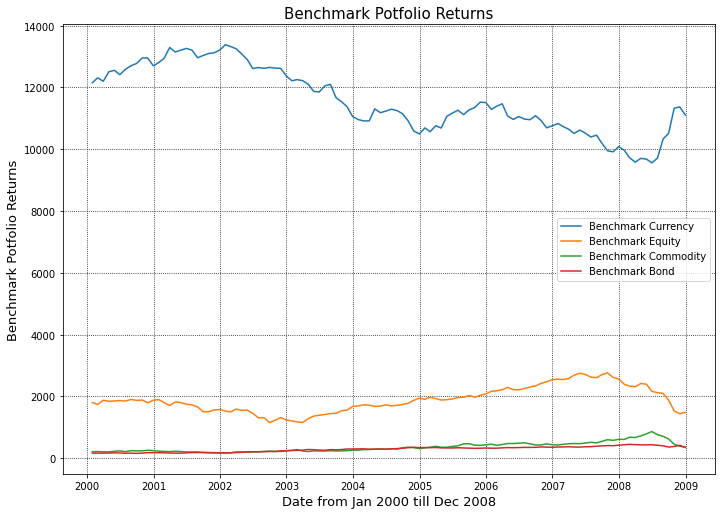

In [218]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
plt.plot(benchmark.index, benchmark.benchmark_equity, label='Benchmark Equity')
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')

plt.title('Benchmark Potfolio Returns', fontsize= 15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Benchmark Potfolio Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

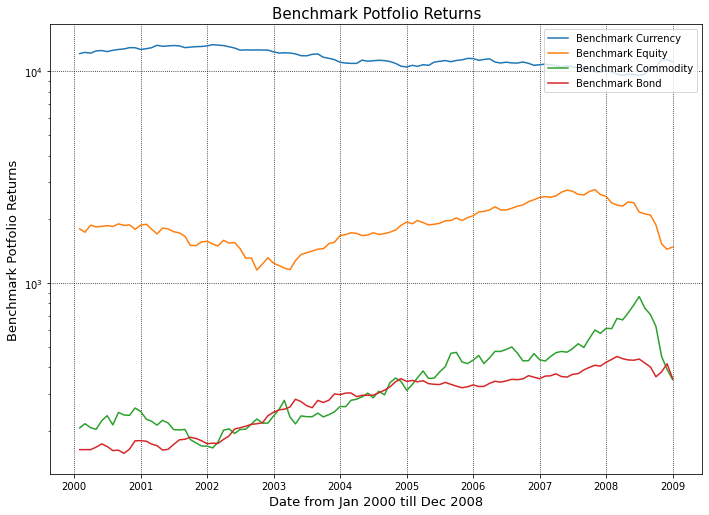

In [219]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
plt.plot(benchmark.index, benchmark.benchmark_equity, label='Benchmark Equity')
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')

plt.title('Benchmark Potfolio Returns', fontsize= 15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Benchmark Potfolio Returns', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

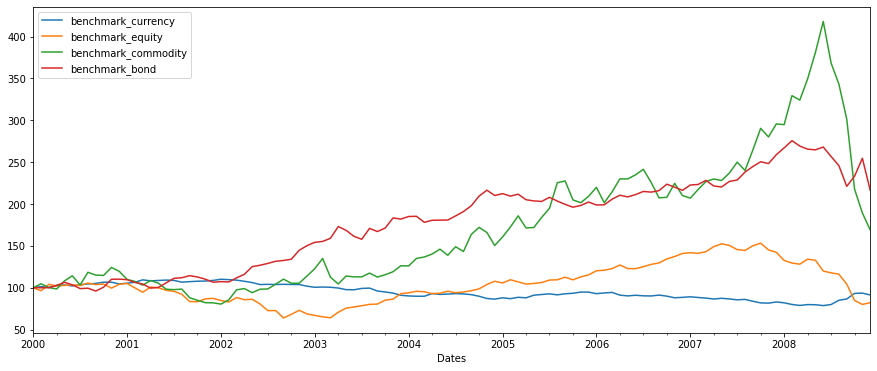

In [220]:
# Normalization of Benchmark dataset to 100
(benchmark /benchmark.iloc[0] * 100).plot(figsize =(15,6))
plt.show();

In [221]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_ben_curr = (benchmark['benchmark_currency'] / benchmark['benchmark_currency'].shift(1)) - 1
returns_ben_equi = (benchmark['benchmark_equity'] / benchmark['benchmark_equity'].shift(1)) - 1
returns_ben_comm = (benchmark['benchmark_commodity'] / benchmark['benchmark_commodity'].shift(1)) - 1
returns_ben_bond = (benchmark['benchmark_bond'] / benchmark['benchmark_bond'].shift(1)) - 1

In [222]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_ben_curr.dropna(axis=0, inplace=True)
returns_ben_equi.dropna(axis=0, inplace=True)
returns_ben_comm.dropna(axis=0, inplace=True)
returns_ben_bond.dropna(axis=0, inplace=True)

In [223]:
# Calculate the arithmetic mean of returns of all asset class on a portfolio of Benchmark
returns_ben_curr_mean = np.mean(returns_ben_curr)
returns_ben_equi_mean = np.mean(returns_ben_equi)
returns_ben_comm_mean = np.mean(returns_ben_comm) 
returns_ben_bond_mean = np.mean(returns_ben_bond)

In [224]:
returns_ben_curr_mean, returns_ben_equi_mean, returns_ben_comm_mean, returns_ben_bond_mean  

(-0.0006920476993685473,
 -0.0008239099355196582,
 0.007630824509360875,
 0.007915522297375887)

In [225]:
# Calculate the standard deviation of returns of all asset class on a portfolio of Benchmark
returns_ben_curr_sigma = np.std(returns_ben_curr)
returns_ben_equi_sigma = np.std(returns_ben_equi)
returns_ben_comm_sigma = np.std(returns_ben_comm) 
returns_ben_bond_sigma = np.std(returns_ben_bond)

In [226]:
returns_ben_curr_sigma, returns_ben_equi_sigma, returns_ben_comm_sigma, returns_ben_bond_sigma  

(0.017197460161961404,
 0.0442256965106184,
 0.07239429384790959,
 0.03650324045116741)

**Skewness**

In [227]:
skew(benchmark['benchmark_bond'].dropna())

-0.10971373844785777

In [228]:
skew(benchmark['benchmark_equity'].dropna())

0.33893820265167407

In [229]:
skew(benchmark['benchmark_commodity'].dropna())

1.0333858018869297

In [230]:
skew(benchmark['benchmark_currency'].dropna())

0.060354215905464643

**Kurtosis**

In [231]:
kurtosis(benchmark['benchmark_bond'].dropna())

-1.2225758369378343

In [232]:
kurtosis(benchmark['benchmark_equity'].dropna())

-0.6803640946221599

In [233]:
kurtosis(benchmark['benchmark_commodity'].dropna())

0.4816907509443653

In [234]:
kurtosis(benchmark['benchmark_currency'].dropna())

-1.0889489830305055

In [235]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [236]:
geometric_mean_return(returns_ben_bond)

0.0

In [237]:
geometric_mean_return(returns_ben_equi)

0.022379215236737887

In [238]:
geometric_mean_return(returns_ben_comm)

0.03601661804541174

In [239]:
geometric_mean_return(returns_ben_curr)

0.008663991406366534

**Volatility**

In [240]:
Bond_Volatility = np.std(returns_ben_bond) * np.sqrt(107)
Bond_Volatility

0.37759245528429813

In [241]:
Equity_Volatility = np.std(returns_ben_equi) * np.sqrt(107)
Equity_Volatility

0.4574741619019349

In [242]:
Commodity_Volatility = np.std(returns_ben_comm) * np.sqrt(107)
Commodity_Volatility

0.7488523984377098

In [243]:
Currency_Volatility = np.std(returns_ben_curr) * np.sqrt(107)
Currency_Volatility

0.17789191115500644

In [244]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [245]:
Sharpe_Ratio(returns_ben_bond, 107, 0.0164) # Annualized Sharpe Ratio of Benchmark Bond

2.1893198286718207

In [246]:
Sharpe_Ratio(returns_ben_equi, 107, 0.0164) # Annualized Sharpe Ratio of Benchmark Equity

-0.227485253492414

In [247]:
Sharpe_Ratio(returns_ben_comm, 107, 0.0164) # Annualized Sharpe Ratio of Benchmark Commodity

1.0634280812917885

In [248]:
Sharpe_Ratio(returns_ben_curr, 107, 0.0164) # Annualized Sharpe Ratio of Benchmark Currency

-0.5060682732599897

In [249]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [250]:
Sortino_Ratio(returns_ben_bond, 107, 0.0164) # Annualized Sortino Ratio of Benchmark Bond

3.0006801216863956

In [251]:
Sortino_Ratio(returns_ben_equi, 107, 0.0164) # Annualized Sortino Ratio of Benchmark Equity

-0.27857505670080274

In [252]:
Sortino_Ratio(returns_ben_comm, 107, 0.0164) # Annualized Sortino Ratio of Benchmark Commodity

1.505328784246928

In [253]:
Sortino_Ratio(returns_ben_curr, 107, 0.0164) # Annualized Sortino Ratio of Benchmark Currency

-1.0155130211739392

**Cumulative Return**

In [254]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (benchmark['benchmark_bond'][-1] /benchmark['benchmark_bond'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 116.47%


In [255]:
# Calculate the cumulative return of equity 
cululative_return = 100 * (benchmark['benchmark_equity'][-1] /benchmark['benchmark_equity'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is -17.84%


In [256]:
# Calculate the cumulative return of commodity
cululative_return = 100 * (benchmark['benchmark_commodity'][-1] /benchmark['benchmark_commodity'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 69.13%


In [257]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (benchmark['benchmark_currency'][-1] /benchmark['benchmark_currency'][0]-1)
print("The Cumulative Return of the Currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the Currency is -8.58%


**Conclusion on a Portfolio of Benchmark**

**Arithmetic Mean**

- Benchmark Bond -0.0006920476993685473
- Benchmark Equity -0.0008239099355196582
- Benchmark Commodity 0.007630824509360875
- Benchmark Currency 0.007915522297375887

**Standard Deviation**

- Benchmark Bond 0.017197460161961404
- Benchmark Equity 0.0442256965106184
- Benchmark Commodity 0.07239429384790959
- Benchmark Currency 0.03650324045116741

**Skewness**

- Benchmark Bond -0.10971373844785777
- Benchmark Equity 0.33893820265167407
- Benchmark Commodity 1.0333858018869297
- Benchmark Currency 0.060354215905464643

**Kurtosis**

- Benchmark Bond -1.2225758369378343
- Benchmark Equity -0.6803640946221599
- Benchmark Commodity 0.4816907509443653
- Benchmark Currency -1.0889489830305055

**Geometric Mean Rate of Returns**

- Benchmark Bond 0.00
- Benchmark Equity 0.022379215236737887
- Benchmark Commodity 0.03601661804541174
- Benchmark Currency 0.008663991406366534

**Volatility**

- Benchmark Bond 0.37759245528429813
- Benchmark Equity 0.4574741619019349
- Benchmark Commodity 0.7488523984377098
- Benchmark Currency 0.17789191115500644

**Annualized Sharpe Ratio**

- Benchmark Bond 2.1893198286718207
- Benchmark Equity -0.227485253492414
- Benchmark Commodity 1.0634280812917885
- Benchmark Currency -0.5060682732599897

**Annualized Sortino Ratio**

- Benchmark Bond 3.0006801216863956
- Benchmark Equity -0.27857505670080274
- Benchmark Commodity 1.505328784246928
- Benchmark Currency -1.0155130211739392

**Cumulative Return**

- Benchmark Bond 116.47%
- Benchmark Equity -14.78%
- Benchmark Commodity 61.59%
- Benchmark Currency -9.77%


<h4><center>Investment on a Mixture of Different Asset Classes Portfolio</center></h4>

In [258]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_benchmark_2000_2008 = pd.concat([bond_df_2000_2008_2['Bond_Port_Value'],
                               equity_df_2000_2008_2['Equity_Port_Value'],
                               commodity_df_2000_2008_2['Commodity_Port_Value'],
                               currency_df_2000_2008_2['Currency_Port_Value'],
                               benchmark['benchmark_currency'],
                               benchmark['benchmark_equity'],
                               benchmark['benchmark_commodity'],
                               benchmark['benchmark_bond']],axis=1).reindex(bond_df_2000_2008_2.index)


mix_port_benchmark_2000_2008

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1030.537531        1044.592448            982.006669   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   
2000-05-01      1049.678171         956.805696            981.163047   
2000-06-01      1052.824326         996.771813            991.239436   
...                     ...                ...                   ...   
2008-08-01      1082.379953        1807.224305           3550.402818   
2008-09-01      1085.446520        1509.443591           3459.695539   
2008-10-01      1089.294987        1106.237340           2875.009175   
2008-11-01      1137.394582        1035.273959           2917.414787   
2008-12-01      1197.850338        1061.439815           2963.275123   

            Currency_Port_Value  benchmark_currency  benchmark_equity  \
Date                                                                    
2000-02-01          1021.138262                 NaN               NaN   
2000-03-01          1010.954446                 NaN               NaN   
2000-04-01          1030.336328                 NaN               NaN   
2000-05-01          1029.916631                 NaN               NaN   
2000-06-01          1024.214332                 NaN               NaN   
...                         ...                 ...               ...   
2008-08-01           761.639122                 NaN               NaN   
2008-09-01           744.549520                 NaN               NaN   
2008-10-01           773.888131                 NaN               NaN   
2008-11-01           773.065964                 NaN               NaN   
2008-12-01           786.021099                 NaN               NaN   

            benchmark_commodity  benchmark_bond  
Date                                             
2000-02-01                  NaN             NaN  
2000-03-01                  NaN             NaN  
2000-04-01                  NaN             NaN  
2000-05-01                  NaN             NaN  
2000-06-01                  NaN             NaN  
...                         ...             ...  
2008-08-01                  NaN             NaN  
2008-09-01                  NaN             NaN  
2008-10-01                  NaN             NaN  
2008-11-01                  NaN             NaN  
2008-12-01                  NaN             NaN  

[107 rows x 8 columns]

In [259]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_2000_2008 = pd.concat([bond_df_2000_2008_2['Bond_Port_Value'],
                               equity_df_2000_2008_2['Equity_Port_Value'],
                               commodity_df_2000_2008_2['Commodity_Port_Value'],
                               currency_df_2000_2008_2['Currency_Port_Value']],axis=1).reindex(bond_df_2000_2008_2.index)


mix_port_2000_2008

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1030.537531        1044.592448            982.006669   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   
2000-05-01      1049.678171         956.805696            981.163047   
2000-06-01      1052.824326         996.771813            991.239436   
...                     ...                ...                   ...   
2008-08-01      1082.379953        1807.224305           3550.402818   
2008-09-01      1085.446520        1509.443591           3459.695539   
2008-10-01      1089.294987        1106.237340           2875.009175   
2008-11-01      1137.394582        1035.273959           2917.414787   
2008-12-01      1197.850338        1061.439815           2963.275123   

            Currency_Port_Value  
Date                             
2000-02-01          1021.138262  
2000-03-01          1010.954446  
2000-04-01          1030.336328  
2000-05-01          1029.916631  
2000-06-01          1024.214332  
...                         ...  
2008-08-01           761.639122  
2008-09-01           744.549520  
2008-10-01           773.888131  
2008-11-01           773.065964  
2008-12-01           786.021099  

[107 rows x 4 columns]

In [260]:
mix_port_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2000-02-01 to 2008-12-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bond_Port_Value       107 non-null    float64
 1   Equity_Port_Value     107 non-null    float64
 2   Commodity_Port_Value  107 non-null    float64
 3   Currency_Port_Value   107 non-null    float64
dtypes: float64(4)
memory usage: 9.2 KB


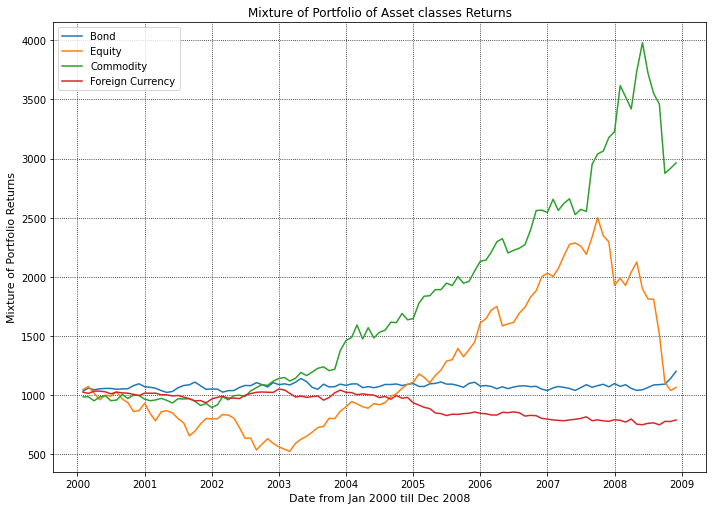

In [261]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Bond_Port_Value, label='Bond')
plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Equity_Port_Value, label='Equity')
plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Commodity_Port_Value, label='Commodity')                               
plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Currency_Port_Value, label='Foreign Currency')
                               
plt.title('Mixture of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

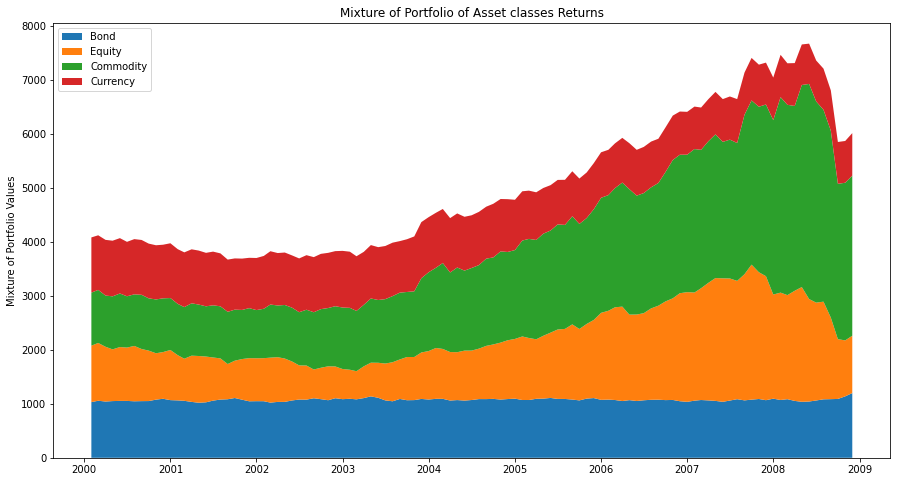

In [262]:
rcParams['figure.figsize'] = 15,8

x = mix_port_2000_2008.index
y1 = mix_port_2000_2008.Bond_Port_Value
y2 = mix_port_2000_2008.Equity_Port_Value
y3 = mix_port_2000_2008.Commodity_Port_Value
y4 = mix_port_2000_2008.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [263]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
mix_port_2000_2008.describe()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
count       107.000000         107.000000            107.000000   
mean       1071.669732        1222.519858           1788.598348   
std          25.668333         542.209043            848.843501   
min        1019.416758         520.024755            891.182082   
25%        1053.919255         800.551740            995.165403   
50%        1069.554325        1013.427200           1567.308142   
75%        1086.911651        1667.287742           2357.924592   
max        1197.850338        2498.184119           3981.094821   

       Currency_Port_Value  
count           107.000000  
mean            914.024717  
std              97.890365  
min             744.549520  
25%             822.677005  
50%             964.015772  
75%            1000.489474  
max            1048.497049

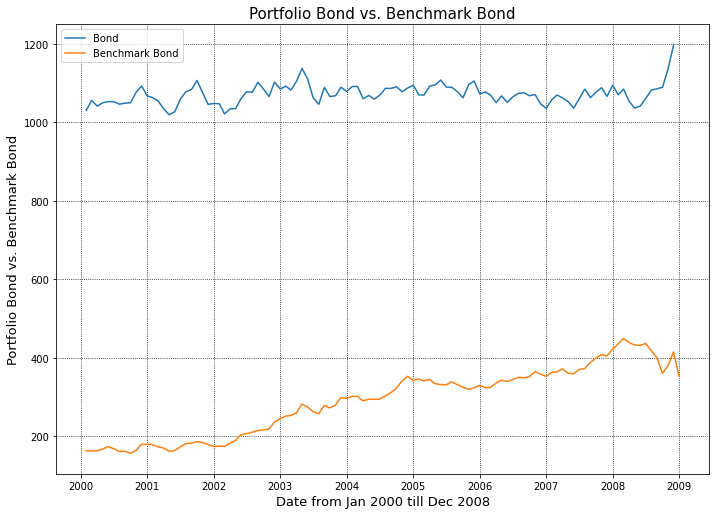

In [264]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Bond_Port_Value, label='Bond')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')
                               
plt.title('Portfolio Bond vs. Benchmark Bond', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Portfolio Bond vs. Benchmark Bond', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

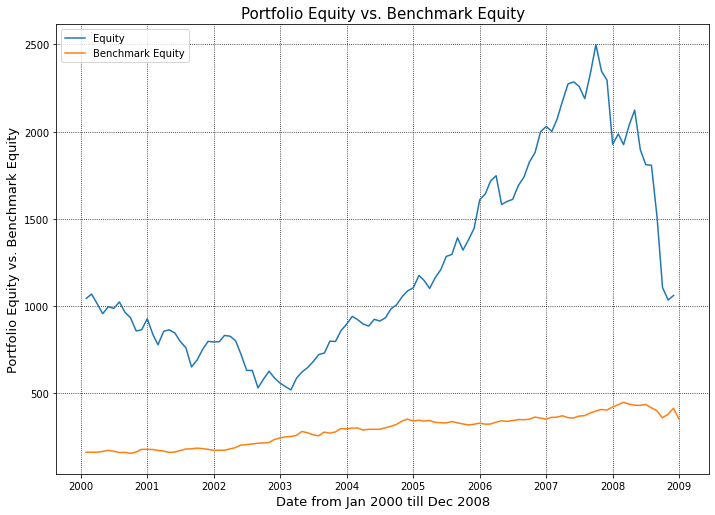

In [265]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Equity_Port_Value, label='Equity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Equity')
                               
plt.title('Portfolio Equity vs. Benchmark Equity', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Portfolio Equity vs. Benchmark Equity', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

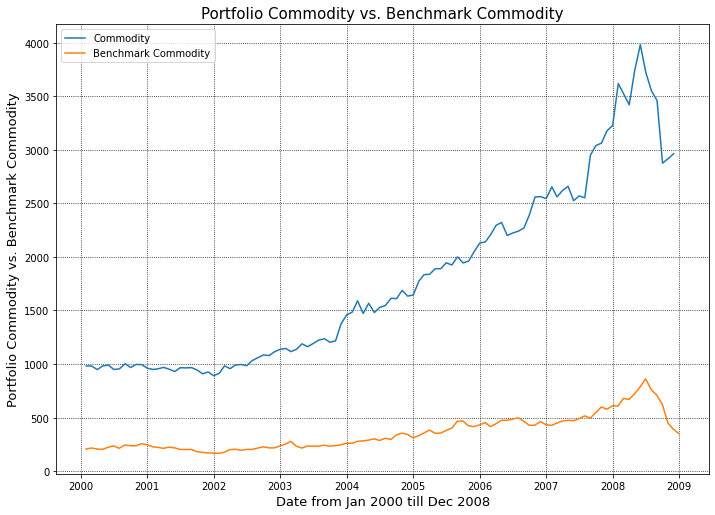

In [266]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Commodity_Port_Value, label='Commodity')                               
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
                               
plt.title('Portfolio Commodity vs. Benchmark Commodity', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Portfolio Commodity vs. Benchmark Commodity', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

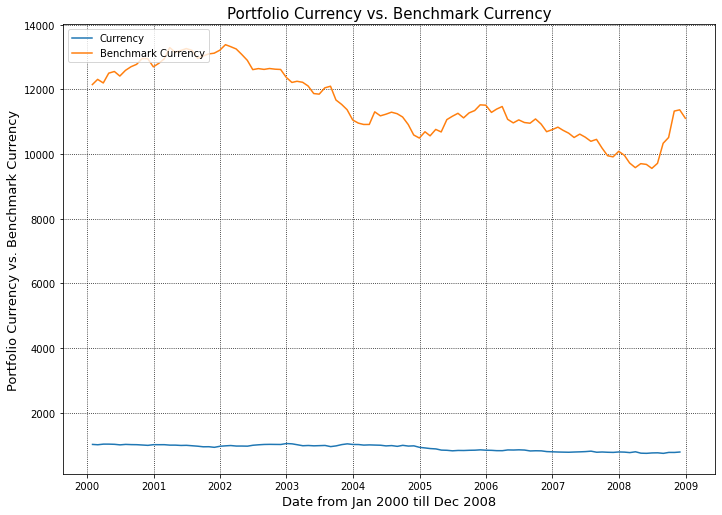

In [267]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2008.index, mix_port_2000_2008.Currency_Port_Value, label='Currency')
plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
                               
plt.title('Portfolio Currency vs. Benchmark Currency', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Portfolio Currency vs. Benchmark Currency', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

<h4><center> Active Strategies</center></h4>

**With Risk Parity Strategy on the Asset Classes and Portfolio (RP):**

In [268]:
1/4

0.25

In [269]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Risk_Parity_Strategy_2000_2008 = mix_port_2000_2008.copy()

In [270]:
Risk_Parity_Strategy_2000_2008['Bond_Port_Value_25%'] = Risk_Parity_Strategy_2000_2008['Bond_Port_Value'] * .25
Risk_Parity_Strategy_2000_2008['Equity_Port_Value_25%'] = Risk_Parity_Strategy_2000_2008['Equity_Port_Value'] * .25
Risk_Parity_Strategy_2000_2008['Commodity_Port_Value_25%'] = Risk_Parity_Strategy_2000_2008['Commodity_Port_Value'] * .25
Risk_Parity_Strategy_2000_2008['Currency_Port_Value_25%'] = Risk_Parity_Strategy_2000_2008['Currency_Port_Value'] * .25

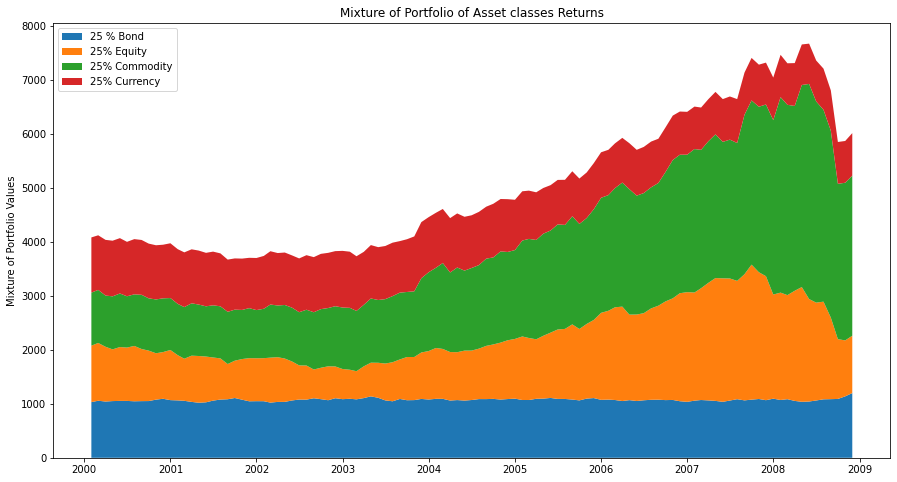

In [271]:
rcParams['figure.figsize'] = 15,8

x = Risk_Parity_Strategy_2000_2008.index
y1 = Risk_Parity_Strategy_2000_2008.Bond_Port_Value
y2 = Risk_Parity_Strategy_2000_2008.Equity_Port_Value
y3 = Risk_Parity_Strategy_2000_2008.Commodity_Port_Value
y4 = Risk_Parity_Strategy_2000_2008.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["25 % Bond", "25% Equity", "25% Commodity","25% Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [272]:
Risk_Parity_Strategy_2000_2008.head()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1030.537531        1044.592448            982.006669   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   
2000-05-01      1049.678171         956.805696            981.163047   
2000-06-01      1052.824326         996.771813            991.239436   

            Currency_Port_Value  Bond_Port_Value_25%  Equity_Port_Value_25%  \
Date                                                                          
2000-02-01          1021.138262           257.634383             261.148112   
2000-03-01          1010.954446           263.995049             267.297918   
2000-04-01          1030.336328           260.345024             253.356800   
2000-05-01          1029.916631           262.419543             239.201424   
2000-06-01          1024.214332           263.206081             249.192953   

            Commodity_Port_Value_25%  Currency_Port_Value_25%  
Date                                                           
2000-02-01                245.501667               255.284565  
2000-03-01                245.410146               252.738612  
2000-04-01                237.005903               257.584082  
2000-05-01                245.290762               257.479158  
2000-06-01                247.809859               256.053583

In [273]:
Risk_Parity_Strategy_2000_2008.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2000-02-01 to 2008-12-01
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bond_Port_Value           107 non-null    float64
 1   Equity_Port_Value         107 non-null    float64
 2   Commodity_Port_Value      107 non-null    float64
 3   Currency_Port_Value       107 non-null    float64
 4   Bond_Port_Value_25%       107 non-null    float64
 5   Equity_Port_Value_25%     107 non-null    float64
 6   Commodity_Port_Value_25%  107 non-null    float64
 7   Currency_Port_Value_25%   107 non-null    float64
dtypes: float64(8)
memory usage: 12.5 KB


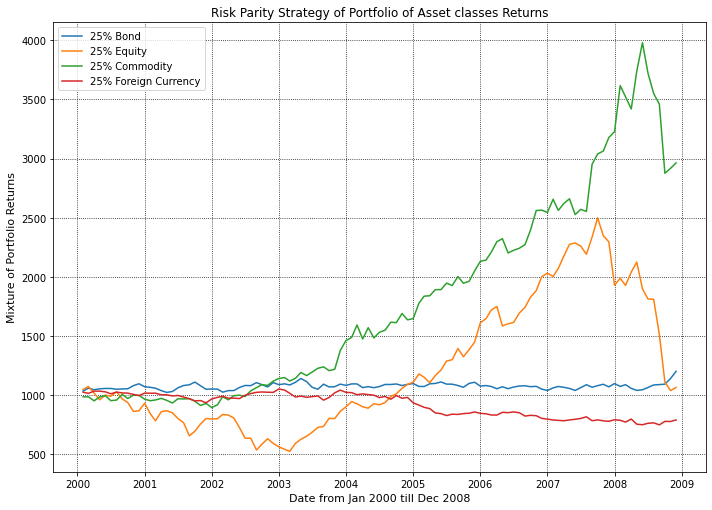

In [274]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Risk_Parity_Strategy_2000_2008.index, Risk_Parity_Strategy_2000_2008.Bond_Port_Value, label='25% Bond')
plt.plot(Risk_Parity_Strategy_2000_2008.index, Risk_Parity_Strategy_2000_2008.Equity_Port_Value, label='25% Equity')
plt.plot(Risk_Parity_Strategy_2000_2008.index, Risk_Parity_Strategy_2000_2008.Commodity_Port_Value, label='25% Commodity')                               
plt.plot(Risk_Parity_Strategy_2000_2008.index, Risk_Parity_Strategy_2000_2008.Currency_Port_Value, label='25% Foreign Currency')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

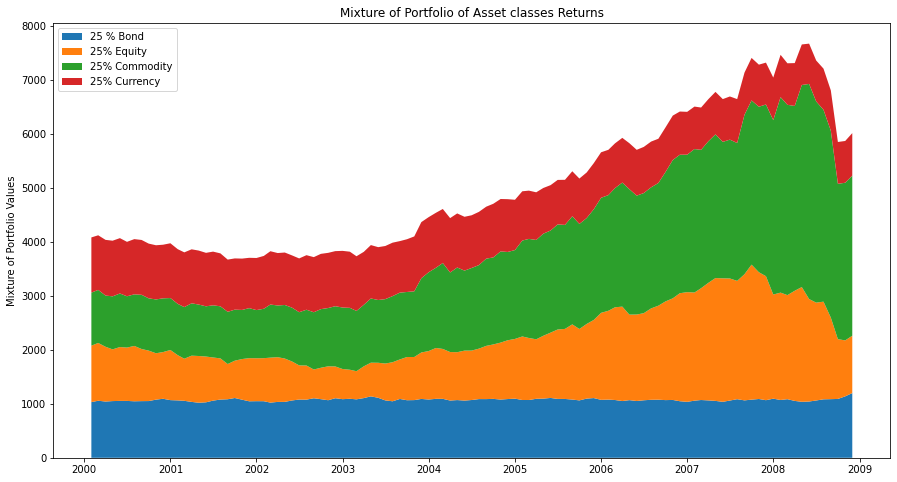

In [275]:
rcParams['figure.figsize'] = 15,8

x = Risk_Parity_Strategy_2000_2008.index
y1 = Risk_Parity_Strategy_2000_2008.Bond_Port_Value
y2 = Risk_Parity_Strategy_2000_2008.Equity_Port_Value
y3 = Risk_Parity_Strategy_2000_2008.Commodity_Port_Value
y4 = Risk_Parity_Strategy_2000_2008.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["25 % Bond", "25% Equity", "25% Commodity","25% Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [276]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Risk_Parity_Strategy_2000_2008[['Bond_Port_Value','Equity_Port_Value','Commodity_Port_Value','Currency_Port_Value']].describe()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
count       107.000000         107.000000            107.000000   
mean       1071.669732        1222.519858           1788.598348   
std          25.668333         542.209043            848.843501   
min        1019.416758         520.024755            891.182082   
25%        1053.919255         800.551740            995.165403   
50%        1069.554325        1013.427200           1567.308142   
75%        1086.911651        1667.287742           2357.924592   
max        1197.850338        2498.184119           3981.094821   

       Currency_Port_Value  
count           107.000000  
mean            914.024717  
std              97.890365  
min             744.549520  
25%             822.677005  
50%             964.015772  
75%            1000.489474  
max            1048.497049

In [277]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_RP_curr = (Risk_Parity_Strategy_2000_2008['Currency_Port_Value'] / Risk_Parity_Strategy_2000_2008['Currency_Port_Value'].shift(1)) - 1
returns_RP_equi = (Risk_Parity_Strategy_2000_2008['Equity_Port_Value'] / Risk_Parity_Strategy_2000_2008['Equity_Port_Value'].shift(1)) - 1
returns_RP_comm = (Risk_Parity_Strategy_2000_2008['Commodity_Port_Value'] / Risk_Parity_Strategy_2000_2008['Commodity_Port_Value'].shift(1)) - 1
returns_RP_bond = (Risk_Parity_Strategy_2000_2008['Bond_Port_Value'] / Risk_Parity_Strategy_2000_2008['Bond_Port_Value'].shift(1)) - 1

In [278]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_RP_curr.dropna(axis=0, inplace=True)
returns_RP_equi.dropna(axis=0, inplace=True)
returns_RP_comm.dropna(axis=0, inplace=True)
returns_RP_bond.dropna(axis=0, inplace=True)

**Skewness**

In [279]:
skew(Risk_Parity_Strategy_2000_2008['Bond_Port_Value'].dropna())

1.1477737013325435

In [280]:
skew(Risk_Parity_Strategy_2000_2008['Equity_Port_Value'].dropna())

0.7265527511332892

In [281]:
skew(Risk_Parity_Strategy_2000_2008['Commodity_Port_Value'].dropna())

0.7909467270188107

In [282]:
skew(Risk_Parity_Strategy_2000_2008['Currency_Port_Value'].dropna())

-0.3188543234120905

**Kurtosis**

In [283]:
kurtosis(Risk_Parity_Strategy_2000_2008['Bond_Port_Value'].dropna())

4.4730687396879105

In [284]:
kurtosis(Risk_Parity_Strategy_2000_2008['Equity_Port_Value'].dropna())

-0.7657388831122494

In [285]:
kurtosis(Risk_Parity_Strategy_2000_2008['Commodity_Port_Value'].dropna())

-0.47324806148130305

In [286]:
kurtosis(Risk_Parity_Strategy_2000_2008['Currency_Port_Value'].dropna())

-1.5453071583289535

In [287]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [288]:
geometric_mean_return(returns_RP_bond)

0.009576234029167147

In [289]:
geometric_mean_return(returns_RP_equi)

0.03562044831181735

In [290]:
geometric_mean_return(returns_RP_comm)

0.020637758109371608

In [291]:
geometric_mean_return(returns_RP_curr)

0.009199450102306715

**Volatility**

In [292]:
Bond_Volatility = np.std(returns_RP_bond) * np.sqrt(106)
Bond_Volatility

0.18817703297259464

In [293]:
Equity_Volatility = np.std(returns_RP_equi) * np.sqrt(106)
Equity_Volatility

0.6781627609822557

In [294]:
Commodity_Volatility = np.std(returns_RP_comm) * np.sqrt(106)
Commodity_Volatility

0.4421787038232121

In [295]:
Currency_Volatility = np.std(returns_RP_curr) * np.sqrt(106)
Currency_Volatility

0.18671523878565283

In [296]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [297]:
Sharpe_Ratio(returns_RP_bond, 106, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

0.8028885115143864

In [298]:
Sharpe_Ratio(returns_RP_equi, 106, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

0.35623457422419375

In [299]:
Sharpe_Ratio(returns_RP_comm, 106, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

2.6813262940257054

In [300]:
Sharpe_Ratio(returns_RP_curr, 106, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

-1.3873373925688994

In [301]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [302]:
Sortino_Ratio(returns_RP_bond, 106, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

1.552073972868164

In [303]:
Sortino_Ratio(returns_RP_equi, 106, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

0.4305210005033053

In [304]:
Sortino_Ratio(returns_RP_comm, 106, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

3.893965678045075

In [305]:
Sortino_Ratio(returns_RP_curr, 106, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

-2.0781457847795646

**Cumulative Return**

In [306]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Risk_Parity_Strategy_2000_2008['Bond_Port_Value'][-1] /Risk_Parity_Strategy_2000_2008['Bond_Port_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 16.24%


In [307]:
# Calculate the cumulative return of equity
cululative_return = 100 * (Risk_Parity_Strategy_2000_2008['Equity_Port_Value'][-1] /Risk_Parity_Strategy_2000_2008['Equity_Port_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 1.61%


In [308]:
# Calculate the cumulative return of commodity 
cululative_return = 100 * (Risk_Parity_Strategy_2000_2008['Commodity_Port_Value'][-1] /Risk_Parity_Strategy_2000_2008['Commodity_Port_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 201.76%


In [309]:
# Calculate the cumulative return of currency 
cululative_return = 100 * (Risk_Parity_Strategy_2000_2008['Currency_Port_Value'][-1] /Risk_Parity_Strategy_2000_2008['Currency_Port_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the currency is -23.03%


**Conclusion on Risk parity Strategy**

**Skewness**

- RP Bond 1.1477737013325435
- RP Equity 0.7265527511332892
- RP Commodity 0.7909467270188107
- RP Currency -0.3188543234120905

**Kurtosis**

- RP Bond 4.4730687396879105
- RP Equity -0.7657388831122494
- RP Commodity -0.47324806148130305
- RP Currency -1.5453071583289535

**Geometric Mean Rate of Returns**

- RP Bond 0.009576234029167147
- RP Equity 0.03562044831181735
- RP Commodity 0.020637758109371608
- RP Currency 0.009199450102306715

**Volatility**

- RP Bond 0.18817703297259464
- RP Equity 0.6781627609822557
- RP Commodity 0.4421787038232121
- RP Currency 0.18671523878565283

**Annualized Sharpe Ratio**

- RP Bond 0.8028885115143864
- RP Equity 0.35623457422419375
- RP Commodity 2.6813262940257054
- RP Currency -1.3873373925688994

**Annualized Sortino Ratio**

- RP Bond 1.552073972868164
- RP Equity 0.4305210005033053
- RP Commodity 3.893965678045075
- RP Currency -2.0781457847795646

**Cumulative Return**

- RP Bond 16.24% 
- RP Equity 1.61%
- RP Commodity 201.76%
- RP Currency -23.03%

**With 60/40 Portfolio:**

- The 60/40 Portfolio composed of 60% Equities, and 40% Bonds

In [310]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
RP_60_40_Portfolio_2000_2008 = mix_port_2000_2008[['Bond_Port_Value','Equity_Port_Value']].copy()

In [311]:
RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'] = RP_60_40_Portfolio_2000_2008['Bond_Port_Value'] * .40
RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'] = RP_60_40_Portfolio_2000_2008['Equity_Port_Value'] * .60

In [312]:
RP_60_40_Portfolio_2000_2008

Bond_Port_Value  Equity_Port_Value  Bond_Port_Value_40%  \
Date                                                                  
2000-02-01      1030.537531        1044.592448           412.215012   
2000-03-01      1055.980198        1069.191670           422.392079   
2000-04-01      1041.380097        1013.427200           416.552039   
2000-05-01      1049.678171         956.805696           419.871269   
2000-06-01      1052.824326         996.771813           421.129730   
...                     ...                ...                  ...   
2008-08-01      1082.379953        1807.224305           432.951981   
2008-09-01      1085.446520        1509.443591           434.178608   
2008-10-01      1089.294987        1106.237340           435.717995   
2008-11-01      1137.394582        1035.273959           454.957833   
2008-12-01      1197.850338        1061.439815           479.140135   

            Equity_Port_Value_60%  
Date                               
2000-02-01             626.755469  
2000-03-01             641.515002  
2000-04-01             608.056320  
2000-05-01             574.083417  
2000-06-01             598.063088  
...                           ...  
2008-08-01            1084.334583  
2008-09-01             905.666155  
2008-10-01             663.742404  
2008-11-01             621.164375  
2008-12-01             636.863889  

[107 rows x 4 columns]

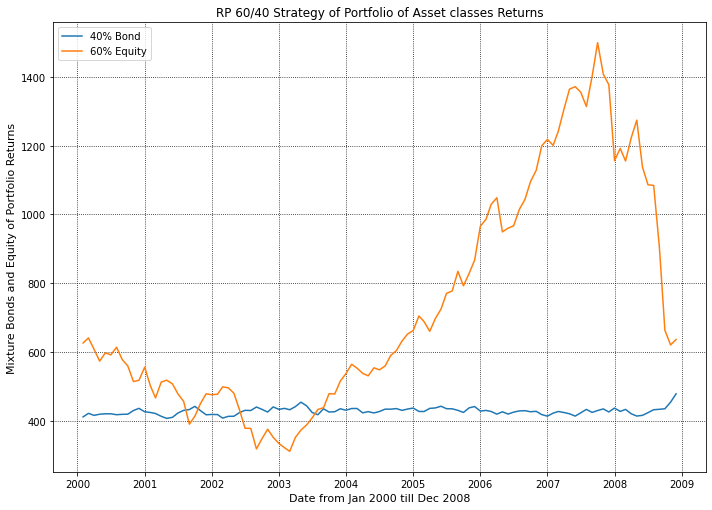

In [313]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(RP_60_40_Portfolio_2000_2008.index, RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'], label='40% Bond')
plt.plot(RP_60_40_Portfolio_2000_2008.index, RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'], label='60% Equity')
                               
plt.title('RP 60/40 Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Mixture Bonds and Equity of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [314]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
RP_60_40_Portfolio_2000_2008[['Bond_Port_Value_40%','Equity_Port_Value_60%']].describe()

Bond_Port_Value_40%  Equity_Port_Value_60%
count           107.000000             107.000000
mean            428.667893             733.511915
std              10.267333             325.325426
min             407.766703             312.014853
25%             421.567702             480.331044
50%             427.821730             608.056320
75%             434.764660            1000.372645
max             479.140135            1498.910471

In [315]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_60_40_bond = (RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'] / RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'].shift(1)) - 1
returns_60_40_equi = (RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'] / RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'].shift(1)) - 1


In [316]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_60_40_bond.dropna(axis=0, inplace=True)
returns_60_40_equi.dropna(axis=0, inplace=True)

**Arithmetic Mean**

In [317]:
Bond_mean = np.mean(returns_60_40_bond)
Bond_mean

0.001586820059034281

In [318]:
Equity_mean = np.mean(returns_60_40_equi)
Equity_mean

0.002444648124421275

**Standard Deviation**

In [319]:
Bond_sigma = np.std(returns_60_40_bond)
Bond_sigma

0.018277369174661783

In [320]:
Equity_sigma = np.std(returns_60_40_equi)
Equity_sigma

0.06586899021192333

**Skewness**

In [321]:
skew(RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'].dropna())

1.1477737013325506

In [322]:
skew(RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'].dropna())

0.7265527511332884

**Kurtosis**

In [323]:
kurtosis(RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'].dropna())

4.473068739687931

In [324]:
kurtosis(RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'].dropna())

-0.7657388831122516

In [325]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [326]:
geometric_mean_return(returns_60_40_bond)

0.009576234029167113

In [327]:
geometric_mean_return(returns_60_40_equi)

0.03562044831181733

**Volatility**

In [328]:
Bond_Volatility = np.std(returns_60_40_bond) * np.sqrt(106)
Bond_Volatility

0.18817703297259455

In [329]:
Equity_Volatility = np.std(returns_60_40_equi) * np.sqrt(106)
Equity_Volatility

0.6781627609822556

In [330]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [331]:
Sharpe_Ratio(returns_60_40_bond, 106, 0.0164) # Annualized Sharpe Ratio of 60_40 Bond

0.8028885115143849

In [332]:
Sharpe_Ratio(returns_60_40_equi, 106, 0.0164) # Annualized Sharpe Ratio of 60_40 Equity

0.3562345742241924

In [333]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [334]:
Sortino_Ratio(returns_60_40_bond, 106, 0.0164) # Annualized Sortino Ratio of 60_40 Bond

1.5520739728681596

In [335]:
Sortino_Ratio(returns_60_40_equi, 106, 0.0164) # Annualized Sortino Ratio of 60_40 Equity

0.4305210005033035

**Cumulative Return**

In [336]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'][-1] /RP_60_40_Portfolio_2000_2008['Bond_Port_Value_40%'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 16.24%


In [337]:
# Calculate the cumulative return of equity
cululative_return = 100 * (RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'][-1] /RP_60_40_Portfolio_2000_2008['Equity_Port_Value_60%'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 1.61%


**Conclusion on 60_40 Portfolio**

**Arithmetic Mean**

- 60_40 Bond 0.001586820059034281
- 60_40 Equity 0.002444648124421275

**Standard Deviation**

- 60_40 Bond 0.018277369174661783
- 60_40 Equity 0.06586899021192333

**Skewness**

- 60_40 Bond 1.1477737013325506
- 60_40 Equity 0.7265527511332884 

**Kurtosis**

- 60_40 Bond 4.473068739687931
- 60_40 Equity -0.7657388831122516

**Geometric Mean Rate of Returns**

- 60_40 Bond 0.009576234029167113
- 60_40 Equity 0.03562044831181733

**Volatility**

- 60_40 Bond 0.18817703297259455
- 60_40 Equity 0.6781627609822556

**Annualized Sharpe Ratio**

- 60_40 Bond 0.8028885115143849
- 60_40 Equity 0.3562345742241924

**Annualized Sortino Ratio**

- 60_40 Bond 1.5520739728681596
- 60_40 Equity 0.4305210005033035

**Annualized Sortino Ratio**

- 60_40 Bond 16.24%
- 60_40 Equity 1.61%

**With Ten months Moving Average on the Asset Classes and Portfolio:**

In [338]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Moving_Average_Portfolio_2000_2008 = mix_port_2000_2008.copy()

In [339]:
# Calculating Moving Average with 10 numbers of observations on Mixture Portfolio 
# Use pandas.DataFrame.rolling(window=10) function to provide rolling window 10 of calculations
# Use Python mean() method to calculate the arithmetic mean (average) of data

Moving_Average_Portfolio_2000_2008['Bond_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2008['Bond_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2008['Equity_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2008['Equity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2008['Commodity_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2008['Commodity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2008['Currency_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2008['Currency_Port_Value'].rolling(window=10).mean()


In [340]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
Moving_Average_Portfolio_2000_2008.dropna(axis=0, inplace=True)
Moving_Average_Portfolio_2000_2008.head()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-11-01      1076.524008         858.123559            995.949972   
2000-12-01      1092.506374         864.098023            994.525544   
2001-01-01      1067.325295         927.612745            961.698407   
2001-02-01      1062.495938         837.302613            949.140345   
2001-03-01      1054.781370         778.703296            955.405516   

            Currency_Port_Value  Bond_Port_Value_Avg  Equity_Port_Value_Avg  \
Date                                                                          
2000-11-01          1002.730751          1050.460907             984.796980   
2000-12-01           992.163285          1056.657792             966.747537   
2001-01-01          1013.561697          1057.792302             952.589645   
2001-02-01          1012.335413          1059.903886             934.977186   
2001-03-01          1012.862984          1060.414205             917.166946   

            Commodity_Port_Value_Avg  Currency_Port_Value_Avg  
Date                                                           
2000-11-01                975.438807              1017.694744  
2000-12-01                976.690695              1014.797246  
2001-01-01                974.696477              1015.057971  
2001-02-01                974.808150              1013.257880  
2001-03-01                972.232397              1011.552515

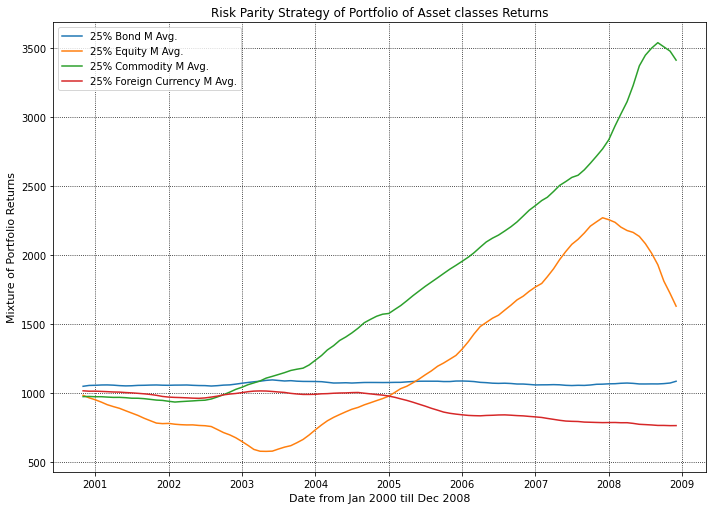

In [341]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Moving_Average_Portfolio_2000_2008.index, Moving_Average_Portfolio_2000_2008.Bond_Port_Value_Avg, label='25% Bond M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2008.index, Moving_Average_Portfolio_2000_2008.Equity_Port_Value_Avg, label='25% Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2008.index, Moving_Average_Portfolio_2000_2008.Commodity_Port_Value_Avg, label='25% Commodity M Avg.')                               
plt.plot(Moving_Average_Portfolio_2000_2008.index, Moving_Average_Portfolio_2000_2008.Currency_Port_Value_Avg, label='25% Foreign Currency M Avg.')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [342]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Moving_Average_Portfolio_2000_2008[['Bond_Port_Value_Avg','Equity_Port_Value_Avg',
                                    'Commodity_Port_Value_Avg','Currency_Port_Value_Avg']].describe()

Bond_Port_Value_Avg  Equity_Port_Value_Avg  Commodity_Port_Value_Avg  \
count            98.000000              98.000000                 98.000000   
mean           1071.113361            1224.033587               1758.793507   
std              12.095345             543.658681                793.606454   
min            1050.460907             578.627718                936.222991   
25%            1059.804056             776.526164               1013.138874   
50%            1071.170003             973.108960               1565.641763   
75%            1081.581289            1697.128487               2316.718826   
max            1096.747641            2272.488388               3541.790605   

       Currency_Port_Value_Avg  
count                98.000000  
mean                915.880526  
std                  91.855758  
min                 765.153158  
25%                 833.019926  
50%                 966.442445  
75%                 998.929038  
max                1017.694744

In [343]:
Moving_Average_Portfolio_2000_2008['returns_MA_bond'] = Moving_Average_Portfolio_2000_2008['Bond_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2000_2008['returns_MA_equi'] = Moving_Average_Portfolio_2000_2008['Equity_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2000_2008['returns_MA_comm'] = Moving_Average_Portfolio_2000_2008['Commodity_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2000_2008['returns_MA_curr'] = Moving_Average_Portfolio_2000_2008['Currency_Port_Value_Avg'].pct_change()

In [344]:
Moving_Average_Portfolio_2000_2008.dropna(axis=0, inplace=True)

In [345]:
Moving_Average_Portfolio_2000_2008.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-12-01      1092.506374         864.098023            994.525544   
2001-01-01      1067.325295         927.612745            961.698407   
2001-02-01      1062.495938         837.302613            949.140345   

            Currency_Port_Value  Bond_Port_Value_Avg  Equity_Port_Value_Avg  \
Date                                                                          
2000-12-01           992.163285          1056.657792             966.747537   
2001-01-01          1013.561697          1057.792302             952.589645   
2001-02-01          1012.335413          1059.903886             934.977186   

            Commodity_Port_Value_Avg  Currency_Port_Value_Avg  \
Date                                                            
2000-12-01                976.690695              1014.797246   
2001-01-01                974.696477              1015.057971   
2001-02-01                974.808150              1013.257880   

            returns_MA_bond  returns_MA_equi  returns_MA_comm  returns_MA_curr  
Date                                                                            
2000-12-01         0.005899        -0.018328         0.001283        -0.002847  
2001-01-01         0.001074        -0.014645        -0.002042         0.000257  
2001-02-01         0.001996        -0.018489         0.000115        -0.001773

In [346]:
returns_MA_bond = Moving_Average_Portfolio_2000_2008['returns_MA_bond']
returns_MA_equi = Moving_Average_Portfolio_2000_2008['returns_MA_equi']
returns_MA_comm = Moving_Average_Portfolio_2000_2008['returns_MA_comm']
returns_MA_curr = Moving_Average_Portfolio_2000_2008['returns_MA_curr']

In [347]:
returns_MA_bond_mean = np.mean(returns_MA_bond)
returns_MA_bond_mean

0.00035552169765269974

In [348]:
returns_MA_equi_mean = np.mean(returns_MA_equi)
returns_MA_equi_mean

0.005549691981718408

In [349]:
returns_MA_comm_mean = np.mean(returns_MA_comm)
returns_MA_comm_mean

0.013062442093615229

In [350]:
returns_MA_curr_mean = np.mean(returns_MA_curr)
returns_MA_curr_mean

-0.002918591273687874

**Standard Deviation**

In [351]:
returns_MA_bond_sigma = np.std(returns_MA_bond)
returns_MA_bond_sigma

0.002767280552126898

In [352]:
returns_MA_equi_sigma = np.std(returns_MA_equi)
returns_MA_equi_sigma

0.02575502357658693

In [353]:
returns_MA_comm_sigma = np.std(returns_MA_comm)
returns_MA_comm_sigma

0.011040425872063418

In [354]:
returns_MA_curr_sigma = np.std(returns_MA_curr)
returns_MA_curr_sigma

0.005197728097921213

**Skewness**

In [355]:
skew(Moving_Average_Portfolio_2000_2008['Bond_Port_Value_Avg'].dropna())

0.19560229780220045

In [356]:
skew(Moving_Average_Portfolio_2000_2008['Equity_Port_Value_Avg'].dropna())

0.6259054955700298

In [357]:
skew(Moving_Average_Portfolio_2000_2008['Commodity_Port_Value_Avg'].dropna())

0.7359803911624803

In [358]:
skew(Moving_Average_Portfolio_2000_2008['Currency_Port_Value_Avg'].dropna())

-0.3713846514520949

**Kurtosis**

In [359]:
kurtosis(Moving_Average_Portfolio_2000_2008['Bond_Port_Value_Avg'].dropna())

-1.2406413932431382

In [360]:
kurtosis(Moving_Average_Portfolio_2000_2008['Equity_Port_Value_Avg'].dropna())

-1.0763647528916422

In [361]:
kurtosis(Moving_Average_Portfolio_2000_2008['Commodity_Port_Value_Avg'].dropna())

-0.5882700699295071

In [362]:
kurtosis(Moving_Average_Portfolio_2000_2008['Currency_Port_Value_Avg'].dropna())

-1.5730110821144536

**Geometric Mean Rate of Return**

In [363]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [364]:
geometric_mean_return(returns_MA_bond)

0.0012400534947804697

In [365]:
geometric_mean_return(returns_MA_equi)

0.018458787682949916

In [366]:
geometric_mean_return(returns_MA_comm)

0.010709258810304512

In [367]:
geometric_mean_return(returns_MA_curr)

0.0029761062323420693

**Annualized Volatility**

In [368]:
Bond_Volatility = np.std(returns_MA_bond) * np.sqrt(97)
Bond_Volatility

0.027254552655573628

In [369]:
Equity_Volatility = np.std(returns_MA_equi) * np.sqrt(97)
Equity_Volatility

0.2536575648877108

In [370]:
Commodity_Volatility = np.std(returns_MA_comm) * np.sqrt(97)
Commodity_Volatility

0.10873558448522334

In [371]:
Currency_Volatility = np.std(returns_MA_curr) * np.sqrt(97)
Currency_Volatility

0.05119168492882616

**Annualized Sharpe Ratio**

In [372]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [373]:
Sharpe_Ratio(returns_MA_bond, 97, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

0.6601516677515749

In [374]:
Sharpe_Ratio(returns_MA_equi, 97, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

2.0469440475255816

In [375]:
Sharpe_Ratio(returns_MA_comm, 97, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

11.442376501107107

In [376]:
Sharpe_Ratio(returns_MA_curr, 97, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

-5.820389046615315

**Annualized Sortino Ratio**

In [377]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [378]:
Sortino_Ratio(returns_MA_bond, 97, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

1.2978337669229194

In [379]:
Sortino_Ratio(returns_MA_equi, 97, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

3.493265136388027

In [380]:
Sortino_Ratio(returns_MA_comm, 97, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

28.331533498425877

In [381]:
Sortino_Ratio(returns_MA_curr, 97, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

-7.356733355214164

**Cumulative Return**

In [382]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Moving_Average_Portfolio_2000_2008['Bond_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2000_2008['Bond_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 2.86%


In [383]:
# Calculate the cumulative return of equity 
cululative_return = 100 * (Moving_Average_Portfolio_2000_2008['Equity_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2000_2008['Equity_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 68.74%


In [384]:
# Calculate the cumulative return of commodity
cululative_return = 100 * (Moving_Average_Portfolio_2000_2008['Commodity_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2000_2008['Commodity_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 249.66%


In [385]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Moving_Average_Portfolio_2000_2008['Currency_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2000_2008['Currency_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the Currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the Currency is -24.57%


**Conclusion on 10 Months Moving Average Strategy**

**Arithmetic Mean**

- MA Bond 0.00035552169765269974
- MA Equity 0.005549691981718408
- MA Commodity 0.013062442093615229
- MA Currency 0.002918591273687874

**Standards Deviation**

- MA Bond 0.002767280552126898
- MA Equity 0.02575502357658693
- MA Commodity 0.011040425872063418
- MA Currency 0.005197728097921213


**Skewness**

- MA Bond 0.19560229780220045
- MA Equity 0.6259054955700298
- MA Commodity 0.7359803911624803
- MA Currency -0.3713846514520949

**Kurtosis**

- MA Bond -1.2406413932431382
- MA Equity -1.0763647528916422
- MA Commodity -0.5882700699295071
- MA Currency -1.5730110821144536 

**Geometric Mean Rate of Returns**

- MA Bond 0.0012400534947804697
- MA Equity 0.018458787682949916
- MA Commodity 0.010709258810304512
- MA Currency 0.0029761062323420693

**Volatility**

- MA Bond 0.027254552655573628
- MA Equity 0.2536575648877108
- MA Commodity 0.10873558448522334 
- MA Currency 0.05119168492882616

**Annualized Sharpe Ratio**

- MA Bond 0.6601516677515749
- MA Equity 2.0469440475255816
- MA Commodity 11.442376501107107
- MA Currency -5.820389046615315

**Annualized Sortino Ratio**

- MA Bond 1.2978337669229194 
- MA Equity 3.493265136388027
- MA Commodity 28.331533498425877 
- MA Currency -7.356733355214164

**Cumulative Return**

- MA Bond 2.86%
- MA Equity 68.74%
- MA Commodity 249.66%
- MA Currency -24.57%

**With Moving Average (MA) Crossover Strategy**

- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time.

- The moving average crossover strategy is geared toward finding the middle of a trend.  A trend defines price action in which prices move in a specific direction over a period of time.  Generally trends are either upward or downward, as sideways movements are considered consolidation and not trends. 

In [386]:
moving_average_df = mix_port_2000_2008.copy()
moving_average_df.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1030.537531        1044.592448            982.006669   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   

            Currency_Port_Value  
Date                             
2000-02-01          1021.138262  
2000-03-01          1010.954446  
2000-04-01          1030.336328

In [387]:
# Create moving average of 10 months
moving_average_df['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

# Create moving average of 20 months
moving_average_df['MA20_bond'] = moving_average_df['Bond_Port_Value'].rolling(20).mean()
moving_average_df['MA20_equity'] = moving_average_df['Equity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_currency'] = moving_average_df['Currency_Port_Value'].rolling(20).mean()

In [388]:
moving_average_df.head(6)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1030.537531        1044.592448            982.006669   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   
2000-05-01      1049.678171         956.805696            981.163047   
2000-06-01      1052.824326         996.771813            991.239436   
2000-07-01      1052.681084         987.100902            949.287683   

            Currency_Port_Value  MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                      
2000-02-01          1021.138262        NaN          NaN             NaN   
2000-03-01          1010.954446        NaN          NaN             NaN   
2000-04-01          1030.336328        NaN          NaN             NaN   
2000-05-01          1029.916631        NaN          NaN             NaN   
2000-06-01          1024.214332        NaN          NaN             NaN   
2000-07-01          1007.563558        NaN          NaN             NaN   

            MA10_currency  MA20_bond  MA20_equity  MA20_commodity  \
Date                                                                
2000-02-01            NaN        NaN          NaN             NaN   
2000-03-01            NaN        NaN          NaN             NaN   
2000-04-01            NaN        NaN          NaN             NaN   
2000-05-01            NaN        NaN          NaN             NaN   
2000-06-01            NaN        NaN          NaN             NaN   
2000-07-01            NaN        NaN          NaN             NaN   

            MA20_currency  
Date                       
2000-02-01            NaN  
2000-03-01            NaN  
2000-04-01            NaN  
2000-05-01            NaN  
2000-06-01            NaN  
2000-07-01            NaN

In [389]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df.dropna(axis=0, inplace=True)
moving_average_df.head(5)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2001-09-01      1083.645910         651.626541            966.407618   
2001-10-01      1106.686724         690.408544            944.685565   
2001-11-01      1075.461331         752.171917            908.644939   
2001-12-01      1045.757601         798.246643            925.725795   
2002-01-01      1047.944255         794.442610            891.182082   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2001-09-01           966.156490  1057.794106   818.593374      960.717272   
2001-10-01           947.978069  1059.212141   801.224426      955.733274   
2001-11-01           950.177518  1060.025745   783.680344      950.427927   
2001-12-01           931.253764  1058.351911   779.774747      948.086473   
2002-01-01           964.015772  1057.668199   781.348678      941.664129   

            MA10_currency    MA20_bond  MA20_equity  MA20_commodity  \
Date                                                                  
2001-09-01     995.819278  1054.127507   901.695177      968.078040   
2001-10-01     991.400756  1057.934966   883.985982      966.211984   
2001-11-01     985.062338  1058.909023   868.134994      962.562202   
2001-12-01     976.954174  1059.127898   857.375966      961.447311   
2002-01-01     972.069452  1059.041202   849.257812      956.948263   

            MA20_currency  
Date                       
2001-09-01    1006.757011  
2001-10-01    1003.099001  
2001-11-01    1000.060155  
2001-12-01     995.106027  
2002-01-01     991.810984

In [390]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_bond.iloc[i] > moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] < moving_average_df.MA20_bond.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df.MA10_bond.iloc[i] < moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] > moving_average_df.MA20_bond.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_equity.iloc[i] > moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] < moving_average_df.MA20_equity.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df.MA10_equity.iloc[i] < moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] > moving_average_df.MA20_equity.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_commodity.iloc[i] > moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] < moving_average_df.MA20_commodity.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df.MA10_commodity.iloc[i] < moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] > moving_average_df.MA20_commodity.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_currency.iloc[i] > moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] < moving_average_df.MA20_currency.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df.MA10_currency.iloc[i] < moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] > moving_average_df.MA20_currency.iloc[i-1]:
        Sell_Currency.append(i)    

In [391]:
Buy_Bond, Sell_Bond

([5, 13, 41, 74], [3, 9, 29, 54])

In [392]:
Buy_Equity, Sell_Equity

([26], [82])

In [393]:
Buy_Commodity, Sell_Commodity

([11], [0])

In [394]:
Buy_Currency, Sell_Currency

([13, 34], [25, 38])

In [395]:
moving_average_df.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency', 'MA20_bond', 'MA20_equity', 'MA20_commodity',
       'MA20_currency'],
      dtype='object')

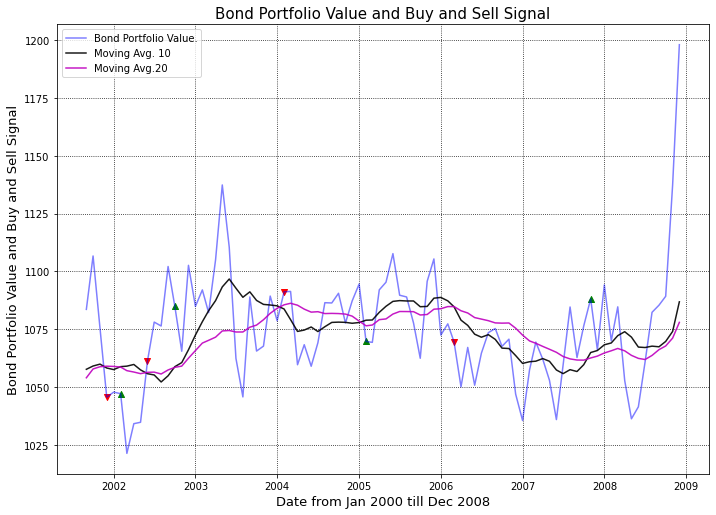

In [396]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_bond, label='Moving Avg.20',c='m' ,alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Bond].index,moving_average_df.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Bond].index,moving_average_df.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

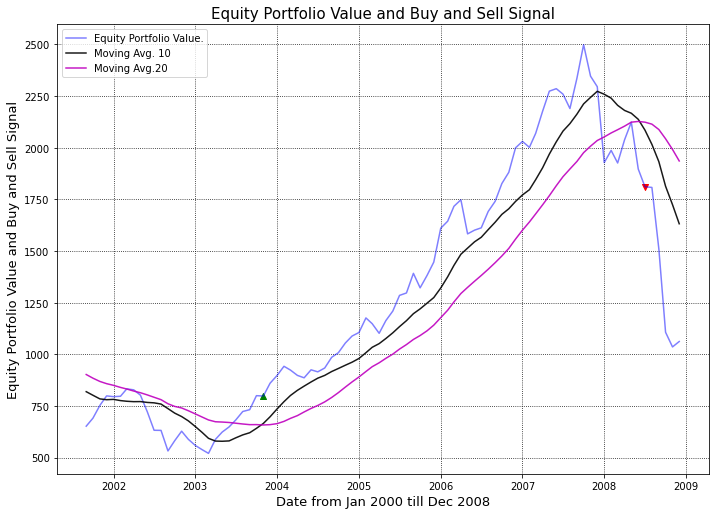

In [397]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_equity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Equity].index,moving_average_df.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Equity].index,moving_average_df.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

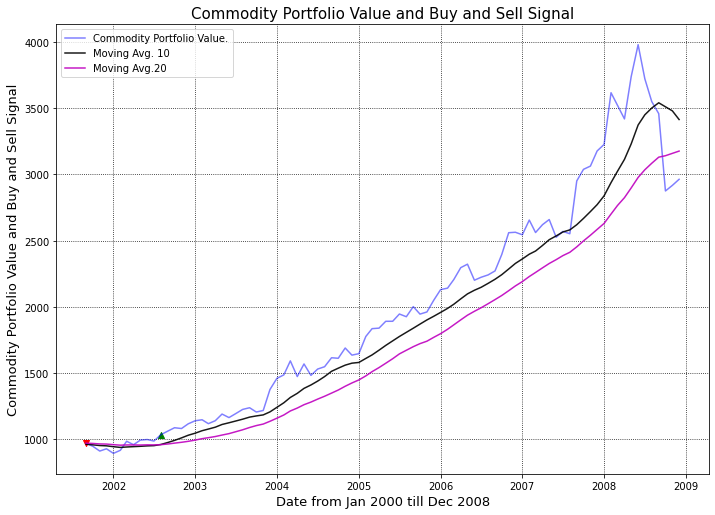

In [398]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_commodity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Commodity].index,moving_average_df.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Commodity].index,moving_average_df.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

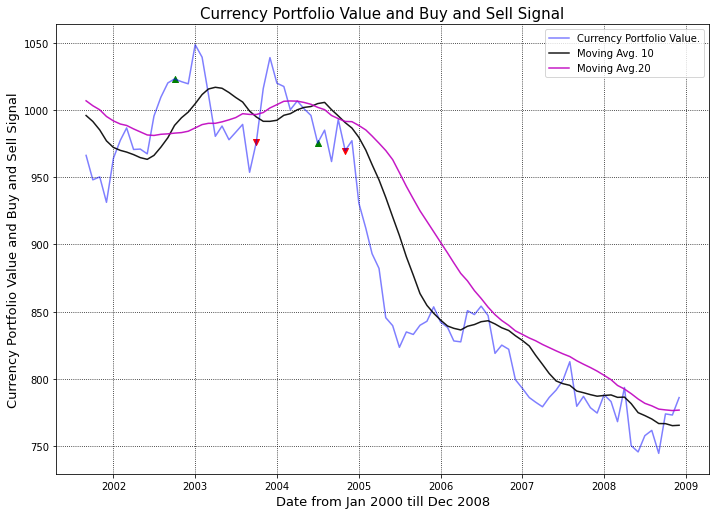

In [399]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_currency, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Currency].index, moving_average_df.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Currency].index, moving_average_df.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

**With Moving Average (MA) Strategy (10 months)**

In [400]:
moving_average_df_10 = mix_port_2000_2008.copy()
moving_average_df_10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1030.537531        1044.592448            982.006669   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   

            Currency_Port_Value  
Date                             
2000-02-01          1021.138262  
2000-03-01          1010.954446  
2000-04-01          1030.336328

In [401]:
# Create moving average of 10 months
moving_average_df_10['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

In [402]:
moving_average_df_10.head(6)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1030.537531        1044.592448            982.006669   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   
2000-05-01      1049.678171         956.805696            981.163047   
2000-06-01      1052.824326         996.771813            991.239436   
2000-07-01      1052.681084         987.100902            949.287683   

            Currency_Port_Value  MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                      
2000-02-01          1021.138262        NaN          NaN             NaN   
2000-03-01          1010.954446        NaN          NaN             NaN   
2000-04-01          1030.336328        NaN          NaN             NaN   
2000-05-01          1029.916631        NaN          NaN             NaN   
2000-06-01          1024.214332        NaN          NaN             NaN   
2000-07-01          1007.563558        NaN          NaN             NaN   

            MA10_currency  
Date                       
2000-02-01            NaN  
2000-03-01            NaN  
2000-04-01            NaN  
2000-05-01            NaN  
2000-06-01            NaN  
2000-07-01            NaN

In [403]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df_10.dropna(axis=0, inplace=True)
moving_average_df_10.head(5)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2002-06-01      1061.381768         720.589961            995.805262   
2002-07-01      1078.160661         631.852901            984.283950   
2002-08-01      1076.474897         631.224601           1032.596184   
2002-09-01      1102.146876         531.759106           1059.583652   
2002-10-01      1085.006196         581.160752           1084.955684   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2002-06-01           967.307899  1055.896071   766.545605      947.761520   
2002-07-01           995.357023  1055.347546   764.568241      949.549153   
2002-08-01          1009.476944  1052.326363   758.649846      958.340215   
2002-09-01          1020.048703  1054.994918   736.608565      973.434086   
2002-10-01          1023.030976  1058.919777   714.899976      989.357075   

            MA10_currency  
Date                       
2002-06-01     963.232147  
2002-07-01     966.152201  
2002-08-01     972.302088  
2002-09-01     979.289207  
2002-10-01     988.466928

In [404]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio
# If the Moving Avg. (10 months) < asset value, the decision is buy the asset
# If the moving Avg. (10 months) < asset value, the decision is sell the asset

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_bond.iloc[i] < moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] > moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df_10.MA10_bond.iloc[i] > moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] < moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_equity.iloc[i] < moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] > moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df_10.MA10_equity.iloc[i] > moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] < moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_commodity.iloc[i] < moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] > moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df_10.MA10_commodity.iloc[i] > moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] < moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_currency.iloc[i] < moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] > moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df_10.MA10_currency.iloc[i] > moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] < moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Sell_Currency.append(i)    

In [405]:
Buy_Bond, Sell_Bond

([10, 18, 20, 26, 30, 34, 41, 50, 57, 61, 74],
 [9, 13, 19, 22, 29, 32, 39, 43, 54, 58, 70])

In [406]:
Buy_Equity, Sell_Equity

([10], [67])

In [407]:
Buy_Commodity, Sell_Commodity

([0, 61, 63], [60, 62, 75])

In [408]:
Buy_Currency, Sell_Currency

([17, 42, 47, 61, 67, 70, 76], [9, 23, 43, 51, 63, 68, 71])

In [409]:
moving_average_df_10.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency'],
      dtype='object')

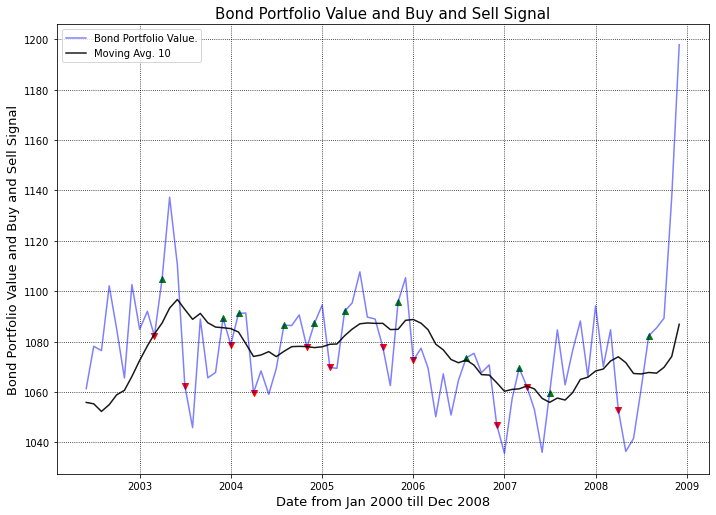

In [410]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Bond].index,moving_average_df_10.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Bond].index,moving_average_df_10.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

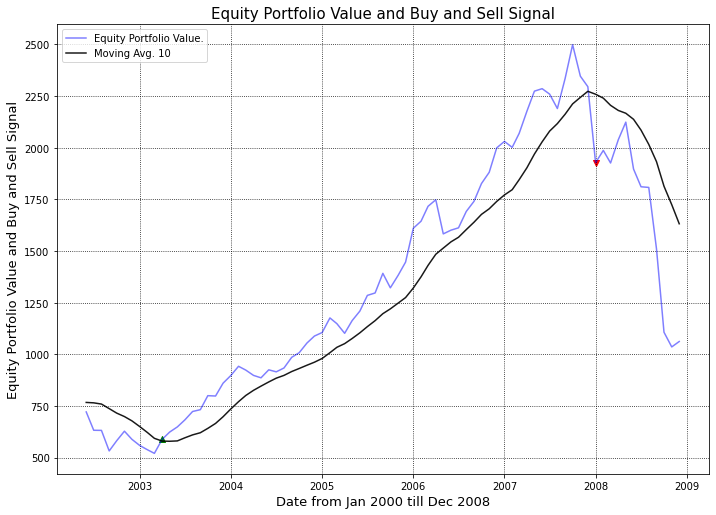

In [411]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Equity].index,moving_average_df_10.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Equity].index,moving_average_df_10.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

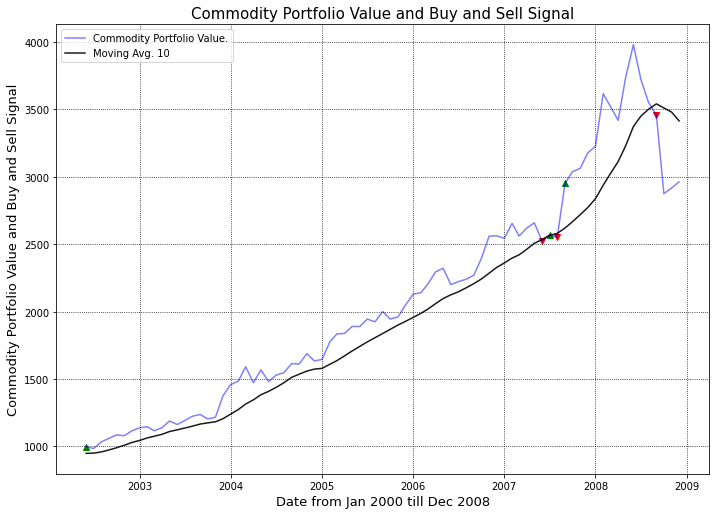

In [412]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Commodity].index,moving_average_df_10.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Commodity].index,moving_average_df_10.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

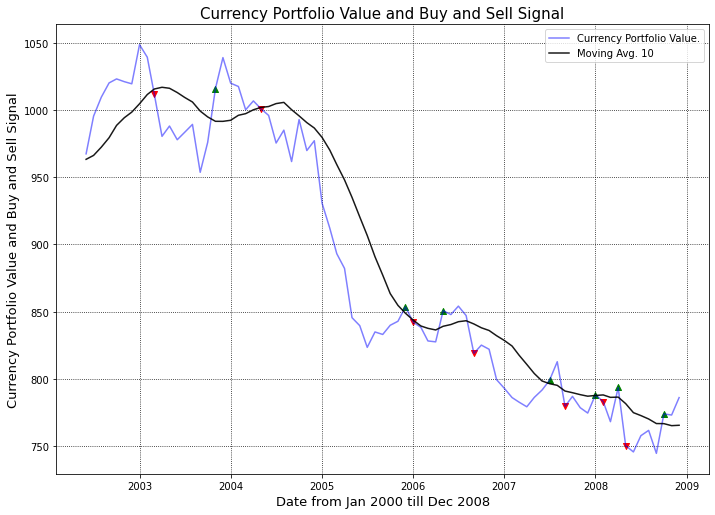

In [413]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Currency].index, moving_average_df_10.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Currency].index, moving_average_df_10.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

**Conclusion on 10 Months Moving Average Strategy**

**Arithmetic Mean**

- MA Bond 0.00035552169765269974
- MA Equity 0.005549691981718408
- MA Commodity 0.013062442093615229
- MA Currency 0.002918591273687874

**Standards Deviation**

- MA Bond 0.002767280552126898
- MA Equity 0.02575502357658693
- MA Commodity 0.011040425872063418
- MA Currency 0.005197728097921213


**Skewness**

- MA Bond 0.19560229780220045
- MA Equity 0.6259054955700298
- MA Commodity 0.7359803911624803
- MA Currency -0.3713846514520949

**Kurtosis**

- MA Bond -1.2406413932431382
- MA Equity -1.0763647528916422
- MA Commodity -0.5882700699295071
- MA Currency -1.5730110821144536 

**Geometric Mean Rate of Returns**

- MA Bond 0.0012400534947804697
- MA Equity 0.018458787682949916
- MA Commodity 0.010709258810304512
- MA Currency 0.0029761062323420693

**Volatility**

- MA Bond 0.027254552655573628
- MA Equity 0.2536575648877108
- MA Commodity 0.10873558448522334 
- MA Currency 0.05119168492882616

**Annualized Sharpe Ratio**

- MA Bond 0.6601516677515749
- MA Equity 2.0469440475255816
- MA Commodity 11.442376501107107
- MA Currency -5.820389046615315

**Annualized Sortino Ratio**

- MA Bond 1.2978337669229194 
- MA Equity 3.493265136388027
- MA Commodity 28.331533498425877 
- MA Currency -7.356733355214164

<h4><center>Other RP techniques of Portfolio</center></h4>

In [414]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2008 = pd.read_csv('Bond_2000_2008.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2008.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2008.head()

(108, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2000    98.71     102.11   95.28  100.23   92.80   99.87
1  2/1/2000    99.07     106.07  100.59  102.33   95.62   99.70
2  3/1/2000   101.07     108.00  103.66  103.86   96.91  100.86
3  4/1/2000   100.46     107.28  102.28  104.06   95.09  100.13
4  5/1/2000   100.53     109.13  101.53  104.33   96.27  100.59

In [415]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2008['Date'] = pd.to_datetime(bond_df_2000_2008.Date)

In [416]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2008.set_index('Date',inplace=True)

In [417]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2008 = np.log(1+bond_df_2000_2008[['Germany','Australia','US','UK','Canada','Japan']].pct_change())

In [418]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2008.dropna(axis=0, inplace=True)
bond_df_2000_2008.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-02-01  0.003640   0.038049  0.054233  0.020735  0.029935 -0.001704
2000-03-01  0.019987   0.018032  0.030063  0.014841  0.013401  0.011568
2000-04-01 -0.006054  -0.006689 -0.013402  0.001924 -0.018959 -0.007264
2000-05-01  0.000697   0.017098 -0.007360  0.002591  0.012333  0.004584
2000-06-01 -0.003687   0.000092  0.020086  0.000862  0.012798 -0.011901

In [419]:
1/6

0.16666666666666666

In [420]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [421]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(bond_df_2000_2008.mean(), weights)

0.0011033709326959606

In [422]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2008.mean(), weights)

In [423]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
bond_df_2000_2008.cov()

Germany  Australia        US        UK    Canada     Japan
Germany    0.000325   0.000202  0.000262 -0.000111  0.000157  0.000015
Australia  0.000202   0.000539  0.000314  0.000210  0.000220  0.000014
US         0.000262   0.000314  0.000640  0.000013  0.000261  0.000039
UK        -0.000111   0.000210  0.000013  0.006786  0.000026  0.000013
Canada     0.000157   0.000220  0.000261  0.000026  0.000277  0.000022
Japan      0.000015   0.000014  0.000039  0.000013  0.000022  0.000225

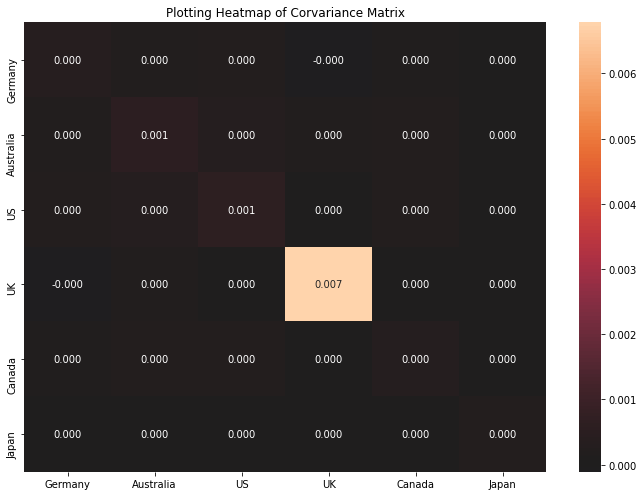

In [424]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(bond_df_2000_2008.cov(),annot=True,fmt='.3f', center=0);

In [425]:
# Calculate the portfolio_variance 
portfolio_variance = weights[0]**2* 0.000276 + weights[1]**2* 0.000196 + weights[2]**2* 0.000438 + weights[3]**2* 0.007404 + weights[4]**2* 0.000166 + weights[5]**2* 0.000211
portfolio_variance

0.00024141666666666663

In [426]:
# calculate the portfolio standard deviation (Standard deviation = Square root of the variance)
portfolio_standard_deviation = portfolio_variance**(1/2)
portfolio_standard_deviation

0.015537588830531803

In [427]:
bond_df_2000_2008.shape[0]

107

In [428]:
portfolio_variance**(1/2)*np.sqrt(107)

0.16072206859461874

In [429]:
# Calculate the portfolio_variance 
np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights)

0.000336251208829535

In [430]:
# calculate the portfolio standard deviation
(np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights))**(1/2)

0.018337153782131375

In [431]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights))**(1/2)

In [432]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights))**(1/2)*np.sqrt(250)

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [433]:
def weights_creator(bond_df_2000_2008):
    rand = np.random.random(len(bond_df_2000_2008.columns))
    rand /= rand.sum()
    return rand


In [434]:
weights_creator(bond_df_2000_2008)

array([0.00087851, 0.30781487, 0.07588164, 0.24245725, 0.16810259,
       0.20486515])

In [435]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2008.mean(), weights)

In [436]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [437]:
portfolio_returns(weights)

0.0011033709326959606

In [438]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2008.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [439]:
portfolio_std(weights)

0.2899358587815308

In [440]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(bond_df_2000_2008)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    

In [441]:
returns

[0.0009561391350475606,
 0.0011260845047954583,
 0.0011411387878856741,
 0.0011141789557662148,
 0.00120580040236008,
 0.0009323443525622795,
 0.0011169231221866212,
 0.0011743863005660772,
 0.0010761408395829897,
 0.0012076095786806565,
 0.0009056941914568661,
 0.0012092406684706127,
 0.001176367882706134,
 0.0010856370308716988,
 0.001047455308878597,
 0.0009887490641825238,
 0.000981194996854163,
 0.0011830202909844944,
 0.0010323333145826374,
 0.0011511422461587557,
 0.0009465161789251044,
 0.001191401380094424,
 0.0007988172729835234,
 0.0012456252528263642,
 0.0010425386136331952,
 0.0012100696799085345,
 0.0009906349924732492,
 0.0011473523577050795,
 0.0011715464523573272,
 0.0013382539941019691,
 0.0010165985898120235,
 0.0012690406388058317,
 0.0010904925899526373,
 0.0009046253546520003,
 0.000963796832527496,
 0.0008885555560408553,
 0.0012433721979592065,
 0.0011967653555576012,
 0.0011527823251873954,
 0.0011871771797365696,
 0.0011608506616300968,
 0.0010855131956824674,

In [442]:
stds

[0.23839603261456754,
 0.3820348326042638,
 0.3863038510824973,
 0.29118768257832495,
 0.33677397031058354,
 0.25653882110866405,
 0.45191662103182034,
 0.2429920588077873,
 0.41140917401411486,
 0.25421366316302196,
 0.24463667947925663,
 0.3565493493528996,
 0.22096922742728356,
 0.3430414814725833,
 0.20866739573133475,
 0.36153273622438636,
 0.24068718986083704,
 0.24416113639776124,
 0.2599067290319429,
 0.4260310308188315,
 0.24539887230866694,
 0.3032447256041243,
 0.1825436773974925,
 0.31755752218119193,
 0.26367610446334894,
 0.4425000480157109,
 0.27931854093857145,
 0.413336289030505,
 0.2563779190051787,
 0.3905489628004419,
 0.24910978200846184,
 0.5799990615173264,
 0.22912297784015828,
 0.3729606119729111,
 0.3134698385303629,
 0.2573846006171954,
 0.2815074715738337,
 0.3823307800860107,
 0.28226232172464455,
 0.29845684004396683,
 0.2890103005602838,
 0.29095780261085413,
 0.29089311192765366,
 0.33064193324114277,
 0.2466650602784625,
 0.33354389645709714,
 0.2521363

In [443]:
w

[array([0.09333182, 0.26426604, 0.30301528, 0.03833823, 0.04927108,
        0.25177755]),
 array([0.36190172, 0.00267192, 0.06167081, 0.27219017, 0.17978423,
        0.12178116]),
 array([0.04609426, 0.12593482, 0.15878489, 0.26714769, 0.17136398,
        0.23067435]),
 array([0.20909269, 0.16726828, 0.10659208, 0.17068721, 0.2087131 ,
        0.13764664]),
 array([0.21679005, 0.08464559, 0.16733479, 0.21872327, 0.19845462,
        0.11405168]),
 array([0.20567281, 0.31982985, 0.15065359, 0.0991513 , 0.0654852 ,
        0.15920724]),
 array([0.3665184 , 0.00714106, 0.16282856, 0.32875496, 0.0378737 ,
        0.09688332]),
 array([0.18415566, 0.03433635, 0.16987876, 0.1212963 , 0.28080083,
        0.20953211]),
 array([0.12662202, 0.0564091 , 0.09884854, 0.29760729, 0.15677998,
        0.26373307]),
 array([0.01767796, 0.06435618, 0.27908935, 0.12002739, 0.25127182,
        0.2675773 ]),
 array([0.26312677, 0.24397935, 0.11905381, 0.1047072 , 0.07868127,
        0.1904516 ]),
 array([0.

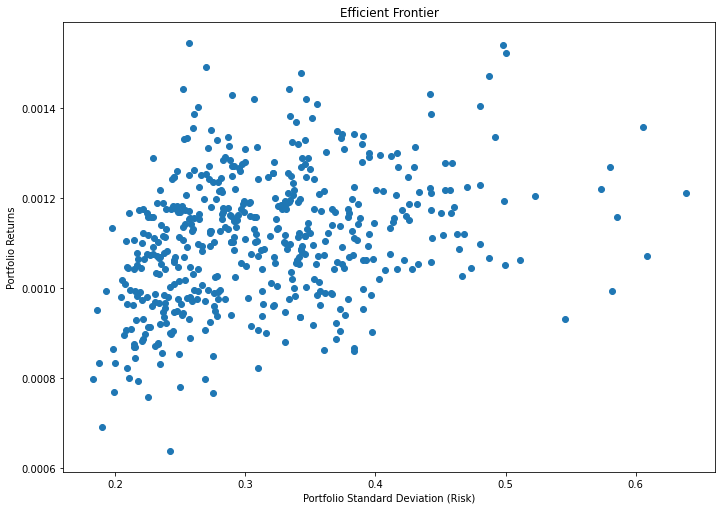

In [444]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [445]:
bond_df_2000_2008.shape[0]

107

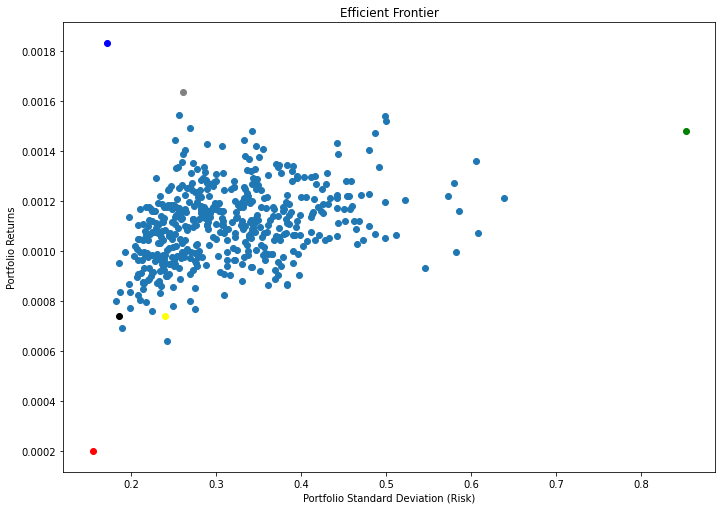

In [446]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2000_2008.std().iloc[0]*np.sqrt(107), bond_df_2000_2008.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2008.std().iloc[1]*np.sqrt(107), bond_df_2000_2008.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2008.std().iloc[2]*np.sqrt(107), bond_df_2000_2008.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2008.std().iloc[3]*np.sqrt(107), bond_df_2000_2008.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2008.std().iloc[4]*np.sqrt(107), bond_df_2000_2008.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2008.std().iloc[5]*np.sqrt(107), bond_df_2000_2008.mean().iloc[5],c='red')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [447]:
min(stds)

0.1825436773974925

In [448]:
stds.index(min(stds))

22

In [449]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

0.0007988172729835234

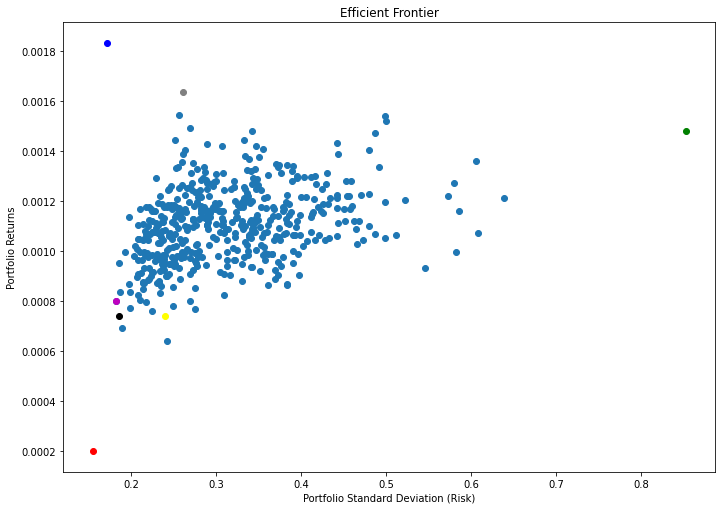

In [450]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2000_2008.std().iloc[0]*np.sqrt(107), bond_df_2000_2008.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2008.std().iloc[1]*np.sqrt(107), bond_df_2000_2008.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2008.std().iloc[2]*np.sqrt(107), bond_df_2000_2008.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2008.std().iloc[3]*np.sqrt(107), bond_df_2000_2008.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2008.std().iloc[4]*np.sqrt(107), bond_df_2000_2008.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2008.std().iloc[5]*np.sqrt(107), bond_df_2000_2008.mean().iloc[5],c='red')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [451]:
# Calcualte the Sharpe Ratio
mean = np.mean(returns)
sigma = np.std(returns)

Sharpe_Ratio = mean / sigma
Sharpe_Ratio

7.58856804795195

<h4><center>Apply Correlation Analysis Between Asset Classes Portfolio and Benchmark Portfolio</center></h4>

In [452]:
# Load Modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from scipy.stats import linregress

In [453]:
benchmark.head(3)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2000-01-31            12149.05           1802.43               206.37   
2000-02-29            12309.89           1737.72               216.01   
2000-03-31            12199.09           1875.56               206.88   

            benchmark_bond  
Dates                       
2000-01-31          162.91  
2000-02-29          162.91  
2000-03-31          162.91

In [454]:
benchmark['benchmark_bond_return'] = benchmark['benchmark_bond'].pct_change()
benchmark['benchmark_equity_return'] = benchmark['benchmark_equity'].pct_change()
benchmark['benchmark_commodity_return'] = benchmark['benchmark_commodity'].pct_change()
benchmark['benchmark_currency_return'] = benchmark['benchmark_currency'].pct_change()

In [455]:
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)

In [456]:
benchmark.head(3)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2000-02-29            12309.89           1737.72               216.01   
2000-03-31            12199.09           1875.56               206.88   
2000-04-30            12501.98           1840.97               203.21   

            benchmark_bond  benchmark_bond_return  benchmark_equity_return  \
Dates                                                                        
2000-02-29          162.91               0.000000                -0.035902   
2000-03-31          162.91               0.000000                 0.079322   
2000-04-30          167.36               0.027316                -0.018442   

            benchmark_commodity_return  benchmark_currency_return  
Dates                                                              
2000-02-29                    0.046712                   0.013239  
2000-03-31                   -0.042267                  -0.009001  
2000-04-30                   -0.017740                   0.024829

In [457]:
benchmark_bond_return = benchmark['benchmark_bond_return']
print(benchmark_bond_return.shape)
benchmark_bond_return.head(5)

(107,)


Dates
2000-02-29    0.000000
2000-03-31    0.000000
2000-04-30    0.027316
2000-05-31    0.036628
2000-06-30   -0.028244
Name: benchmark_bond_return, dtype: float64

In [458]:
bond_return = bond_df_2000_2008_2['Portfolio_R']
print(bond_return.shape)
bond_return.head(5)

(107,)


Date
2000-02-01    0.030538
2000-03-01    0.024689
2000-04-01   -0.013826
2000-05-01    0.007968
2000-06-01    0.002997
Name: Portfolio_R, dtype: float64

Beta =  -0.007622726593249708
Correlation Coefficient =  -0.015119385008948763


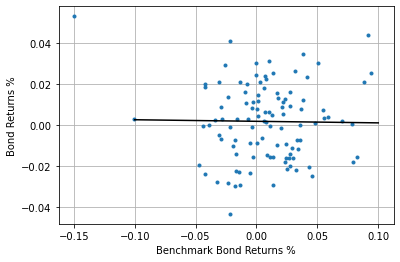

In [459]:
plt.plot(benchmark_bond_return, bond_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Bond Returns %')
plt.ylabel('Bond Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_bond_return, bond_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [460]:
benchmark_equity_return = benchmark['benchmark_equity_return']
print(benchmark_equity_return.shape)
benchmark_equity_return.head(5)

(107,)


Dates
2000-02-29   -0.035902
2000-03-31    0.079322
2000-04-30   -0.018442
2000-05-31    0.005997
2000-06-30    0.007343
Name: benchmark_equity_return, dtype: float64

In [461]:
equity_return = equity_df_2000_2008_2['Portfolio_R']
print(equity_return.shape)
equity_return.head(5)

(107,)


Date
2000-02-01    0.044592
2000-03-01    0.023549
2000-04-01   -0.052156
2000-05-01   -0.055871
2000-06-01    0.041770
Name: Portfolio_R, dtype: float64

Beta =  1.327585529387997
Correlation Coefficient =  0.8938523973198298


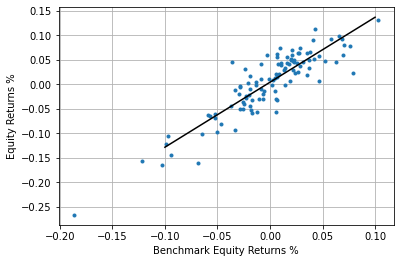

In [462]:
plt.plot(benchmark_equity_return, equity_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Equity Returns %')
plt.ylabel('Equity Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_equity_return, equity_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [463]:
benchmark_commodity_return = benchmark['benchmark_commodity_return']
print(benchmark_commodity_return.shape)
benchmark_commodity_return.head(5)

(107,)


Dates
2000-02-29    0.046712
2000-03-31   -0.042267
2000-04-30   -0.017740
2000-05-31    0.098371
2000-06-30    0.056048
Name: benchmark_commodity_return, dtype: float64

In [464]:
commodity_return = commodity_df_2000_2008_2['Portfolio_R']
print(commodity_return.shape)
commodity_return.head(5)

(107,)


Date
2000-02-01   -0.017993
2000-03-01   -0.000373
2000-04-01   -0.034246
2000-05-01    0.034956
2000-06-01    0.010270
Name: Portfolio_R, dtype: float64

Beta =  0.33051280647888004
Correlation Coefficient =  0.5585199140575908


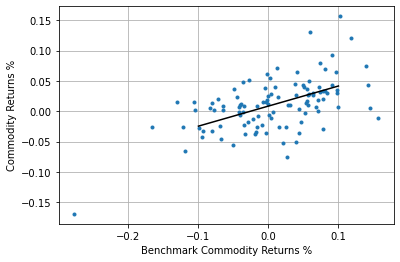

In [465]:
plt.plot(benchmark_commodity_return, commodity_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Commodity Returns %')
plt.ylabel('Commodity Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_commodity_return, commodity_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [466]:
benchmark_currency_return = benchmark['benchmark_currency_return']
print(benchmark_currency_return.shape)
benchmark_currency_return.head(5)

(107,)


Dates
2000-02-29    0.013239
2000-03-31   -0.009001
2000-04-30    0.024829
2000-05-31    0.004114
2000-06-30   -0.011254
Name: benchmark_currency_return, dtype: float64

In [467]:
currency_return = currency_df_2000_2008_2['Portfolio_R']
print(currency_return.shape)
currency_return.head(5)

(107,)


Date
2000-02-01    0.021138
2000-03-01   -0.009973
2000-04-01    0.019172
2000-05-01   -0.000407
2000-06-01   -0.005537
Name: Portfolio_R, dtype: float64

Beta =  0.0945636502751557
Correlation Coefficient =  0.08939987640942777


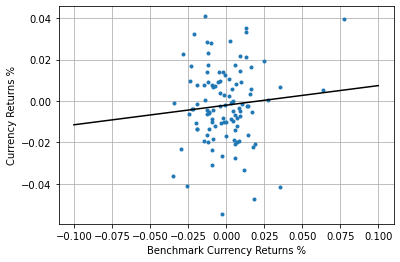

In [468]:
plt.plot(benchmark_currency_return, currency_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Currency Returns %')
plt.ylabel('Currency Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_currency_return, currency_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

<h4><center>Inverse Volatility Risk Parity Strategy</center></h4>

**Inverse Volatility ETF**

- An inverse volatility exchange-traded fund (ETF) is a financial product that allows investors to gain exposure to volatility, and thus hedge against portfolio risk, without having to buy options.

- As long as volatility remains low, investors may see a substantial return, as an inverse volatility ETF is essentially a bet that the market will remain stable.

In [469]:
# Use pandas.DataFrame.copy() function to make a copy of Inverse Volatility RP Strategy
inverse_vol_RP = mix_port_2000_2008.copy()
inverse_vol_RP.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1030.537531        1044.592448            982.006669   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   

            Currency_Port_Value  
Date                             
2000-02-01          1021.138262  
2000-03-01          1010.954446  
2000-04-01          1030.336328

In [470]:
# Calculate monthly returns of asset classes

# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
inverse_vol_RP['Bond_inv_R'] = inverse_vol_RP['Bond_Port_Value'].pct_change()
inverse_vol_RP['Equity_inv_R'] = inverse_vol_RP['Equity_Port_Value'].pct_change()
inverse_vol_RP['Commodity_inv_R'] = inverse_vol_RP['Commodity_Port_Value'].pct_change()
inverse_vol_RP['Currency_inv_R'] = inverse_vol_RP['Currency_Port_Value'].pct_change()

# Use pandas.DataFrame.dropna() function to remove missing values in rows
inverse_vol_RP.dropna(axis=0, inplace=True)

# Use pandas.DataFrame.head(n=5) function to return the first number of rows
inverse_vol_RP.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-03-01      1055.980198        1069.191670            981.640584   
2000-04-01      1041.380097        1013.427200            948.023610   
2000-05-01      1049.678171         956.805696            981.163047   

            Currency_Port_Value  Bond_inv_R  Equity_inv_R  Commodity_inv_R  \
Date                                                                         
2000-03-01          1010.954446    0.024689      0.023549        -0.000373   
2000-04-01          1030.336328   -0.013826     -0.052156        -0.034246   
2000-05-01          1029.916631    0.007968     -0.055871         0.034956   

            Currency_inv_R  
Date                        
2000-03-01       -0.009973  
2000-04-01        0.019172  
2000-05-01       -0.000407

In [471]:
inverse_vol_RP.shape[0]

106

In [472]:
# Calculate the annualized volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

inverse_vol_RP['Bond_inv_Vol'] = inverse_vol_RP['Bond_inv_R'].rolling(106).std() * math.sqrt(106)
inverse_vol_RP['Equity_inv_Vol'] = inverse_vol_RP['Equity_inv_R'].rolling(106).std() * math.sqrt(106)
inverse_vol_RP['Commodity_inv_Vol'] = inverse_vol_RP['Commodity_inv_R'].rolling(106).std() * math.sqrt(106)
inverse_vol_RP['Currency_inv_Vol'] = inverse_vol_RP['Currency_inv_R'].rolling(106).std() * math.sqrt(106)

In [473]:
inverse_vol_RP[['Bond_inv_Vol','Equity_inv_Vol','Commodity_inv_Vol','Currency_inv_Vol']].dropna()

Bond_inv_Vol  Equity_inv_Vol  Commodity_inv_Vol  Currency_inv_Vol
Date                                                                         
2008-12-01      0.189071        0.681384           0.444279          0.187602

In [474]:
# Calculate the weight proportional to 1 / annualized volatility (reciprocal, one over the volatility)
inverse_vol_RP['Bond_inv_Value'] = inverse_vol_RP['Bond_Port_Value'] * 1 / 0.189071
inverse_vol_RP['Equity_inv_Value'] = inverse_vol_RP['Equity_Port_Value'] * 1 / 0.681384
inverse_vol_RP['Commodity_inv_Value'] = inverse_vol_RP['Commodity_Port_Value'] * 1 / 0.444279
inverse_vol_RP['Currency_inv_Value'] = inverse_vol_RP['Currency_Port_Value'] * 1 / 0.187602

In [475]:
inverse_vol_RP['Portfolio_inv_Value'] = inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value',
                                                        'Commodity_inv_Value','Currency_inv_Value']].sum(axis=1)

In [476]:
inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value',
                'Currency_inv_Value','Portfolio_inv_Value']].head(3)

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
Date                                                                
2000-03-01     5585.098708       1569.147016          2209.513805   
2000-04-01     5507.878508       1487.307010          2133.847448   
2000-05-01     5551.767174       1404.209221          2208.438947   

            Currency_inv_Value  Portfolio_inv_Value  
Date                                                 
2000-03-01         5388.825525         14752.585054  
2000-04-01         5492.139358         14621.172324  
2000-05-01         5489.902189         14654.317531

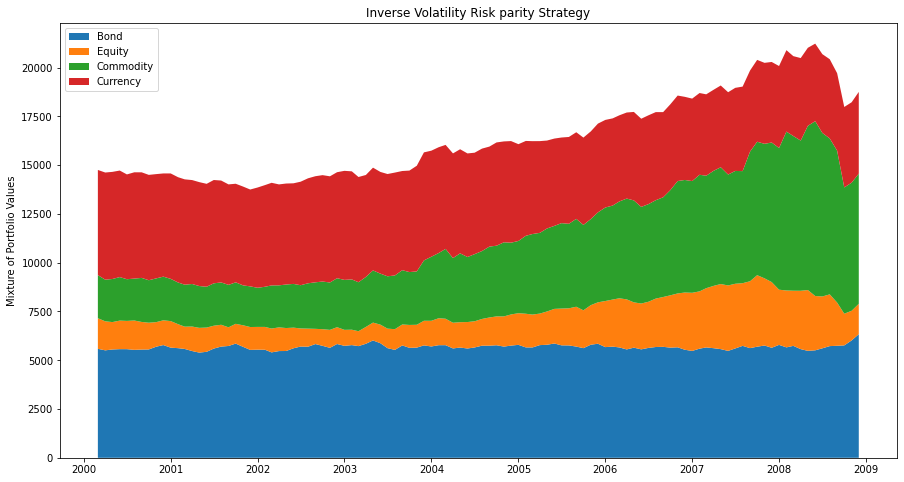

In [477]:
rcParams['figure.figsize'] = 15,8

x = inverse_vol_RP.index
y1 = inverse_vol_RP.Bond_inv_Value
y2 = inverse_vol_RP.Equity_inv_Value
y3 = inverse_vol_RP.Commodity_inv_Value
y4 = inverse_vol_RP.Currency_inv_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Inverse Volatility Risk parity Strategy')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

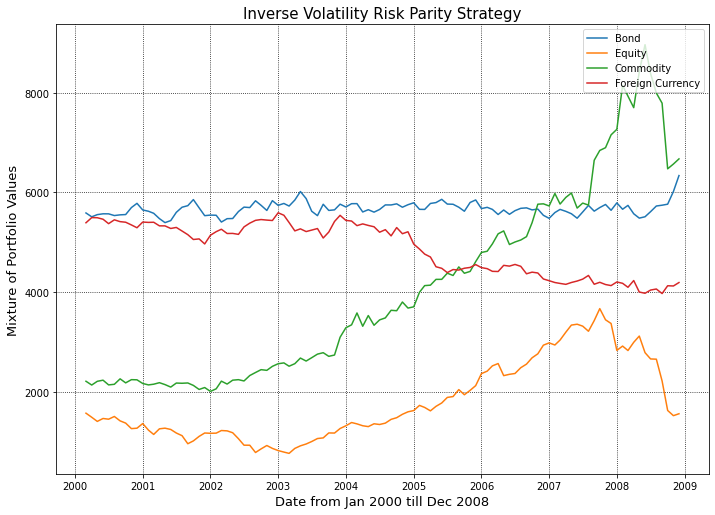

In [478]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(inverse_vol_RP.index, inverse_vol_RP.Bond_inv_Value, label='Bond')
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Equity_inv_Value, label='Equity')
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Commodity_inv_Value, label='Commodity')                               
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Currency_inv_Value, label='Foreign Currency')
                               
plt.title('Inverse Volatility Risk Parity Strategy', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Mixture of Portfolio Values', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [479]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, 
# arithmetic mean, standard deviation, minimum value, maximum value, and percentile
inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value','Currency_inv_Value']].describe()

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
count      106.000000        106.000000           106.000000   
mean      5670.133291       1796.635111          4042.972329   
std        134.727120        799.116899          1911.414623   
min       5391.714002        763.188973          2005.906383   
25%       5580.343240       1173.961231          2241.477629   
50%       5657.515934       1482.840581          3553.697124   
75%       5749.708951       2464.173444          5348.265756   
max       6335.452490       3666.338098          8960.799004   

       Currency_inv_Value  
count          106.000000  
mean          4866.761613  
std            521.279482  
min           3968.771760  
25%           4383.327266  
50%           5132.114998  
75%           5329.815897  
max           5588.943877

**Arithmetic Mean**

In [480]:
returns_Inv_bond_mean = np.mean(inverse_vol_RP['Bond_inv_R'])
returns_Inv_bond_mean

0.001586820059034284

In [481]:
returns_Inv_equi_mean = np.mean(inverse_vol_RP['Equity_inv_R'])
returns_Inv_equi_mean

0.0024446481244212847

In [482]:
returns_Inv_comm_mean = np.mean(inverse_vol_RP['Commodity_inv_R'])
returns_Inv_comm_mean

0.011392998505241943

In [483]:
returns_Inv_curr_mean = np.mean(inverse_vol_RP['Currency_inv_R'])
returns_Inv_curr_mean

-0.002300637916824047

**Standard Deviation**

In [484]:
returns_Inv_bond_sigma = np.std(inverse_vol_RP['Bond_inv_R'])
returns_Inv_bond_sigma

0.01827736917466179

In [485]:
returns_Inv_equi_sigma = np.std(inverse_vol_RP['Equity_inv_R'])
returns_Inv_equi_sigma

0.06586899021192334

In [486]:
returns_Inv_comm_sigma = np.std(inverse_vol_RP['Commodity_inv_R'])
returns_Inv_comm_sigma

0.04294819236589459

In [487]:
returns_Inv_curr_sigma = np.std(inverse_vol_RP['Currency_inv_R'])
returns_Inv_curr_sigma

0.01813538717191653

**Skewness**

In [488]:
skew(inverse_vol_RP['Bond_inv_Value'].dropna())

1.179986621584728

In [489]:
skew(inverse_vol_RP['Equity_inv_Value'].dropna())

0.7153052002194258

In [490]:
skew(inverse_vol_RP['Commodity_inv_Value'].dropna())

0.7786954272411578

In [491]:
skew(inverse_vol_RP['Currency_inv_Value'].dropna())

-0.30429353344529925

**Kurtosis**

In [492]:
kurtosis(inverse_vol_RP['Bond_inv_Value'].dropna())

4.640012237678204

In [493]:
kurtosis(inverse_vol_RP['Equity_inv_Value'].dropna())

-0.7911027529520145

In [494]:
kurtosis(inverse_vol_RP['Commodity_inv_Value'].dropna())

-0.4896088460703951

In [495]:
kurtosis(inverse_vol_RP['Currency_inv_Value'].dropna())

-1.552590564642535

**Geometric Mean Rate of Return**

In [496]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [497]:
geometric_mean_return(inverse_vol_RP['Bond_inv_R'])

0.009576234029167147

In [498]:
geometric_mean_return(inverse_vol_RP['Equity_inv_R'])

0.03562044831181735

In [499]:
geometric_mean_return(inverse_vol_RP['Commodity_inv_R'])

0.020637758109371608

In [500]:
geometric_mean_return(inverse_vol_RP['Currency_inv_R'])

0.009199450102306715

**Annualized Volatility**

In [501]:
inverse_vol_RP.Bond_inv_Vol.dropna()

Date
2008-12-01    0.189071
Name: Bond_inv_Vol, dtype: float64

In [502]:
inverse_vol_RP.Equity_inv_Vol.dropna()

Date
2008-12-01    0.681384
Name: Equity_inv_Vol, dtype: float64

In [503]:
inverse_vol_RP.Commodity_inv_Vol.dropna()

Date
2008-12-01    0.444279
Name: Commodity_inv_Vol, dtype: float64

In [504]:
inverse_vol_RP.Currency_inv_Vol.dropna()

Date
2008-12-01    0.187602
Name: Currency_inv_Vol, dtype: float64

**Annualized Sharpe Ratio**

In [505]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [506]:
inverse_vol_RP.shape[0]

106

In [507]:
Sharpe_Ratio(inverse_vol_RP['Bond_inv_R'], 106, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

0.8028885115143864

In [508]:
Sharpe_Ratio(inverse_vol_RP['Equity_inv_R'], 106, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

0.35623457422419375

In [509]:
Sharpe_Ratio(inverse_vol_RP['Commodity_inv_R'], 106, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

2.6813262940257054

In [510]:
Sharpe_Ratio(inverse_vol_RP['Currency_inv_R'], 106, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

-1.3873373925688994

**Annualized Sortino Ratio**

In [511]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [512]:
Sortino_Ratio(inverse_vol_RP['Bond_inv_R'], 106, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

1.552073972868164

In [513]:
Sortino_Ratio(inverse_vol_RP['Equity_inv_R'], 106, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

0.4305210005033053

In [514]:
Sortino_Ratio(inverse_vol_RP['Commodity_inv_R'], 106, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

3.893965678045075

In [515]:
Sortino_Ratio(inverse_vol_RP['Currency_inv_R'], 106, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

-2.0781457847795646

**Cumulative Return**

In [516]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (inverse_vol_RP['Bond_inv_Value'][-1] /inverse_vol_RP['Bond_inv_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 13.43%


In [517]:
# Calculate the cumulative return of equity
cululative_return = 100 * (inverse_vol_RP['Equity_inv_Value'][-1] /inverse_vol_RP['Equity_inv_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is -0.73%


In [518]:
# Calculate the cumulative return of commodity
cululative_return = 100 * (inverse_vol_RP['Commodity_inv_Value'][-1] /inverse_vol_RP['Commodity_inv_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 201.87%


In [519]:
# Calculate the cumulative return of currency 
cululative_return = 100 * (inverse_vol_RP['Currency_inv_Value'][-1] /inverse_vol_RP['Currency_inv_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the currency is -22.25%


**Conclusion on Inverse Volatility RR Strategy**

**Arithmetic Mean**

- IV RP Bond 0.001586820059034284
- IV RP Equity 0.0024446481244212847
- IV RP Commodity 0.011392998505241943
- IV RP Currency -0.002300637916824047

**Standards Deviation**

- IV RP Bond 0.01827736917466179
- IV RP Equity 0.06586899021192334
- IV RP Commodity 0.04294819236589459
- IV RP Currency 0.01813538717191653

**Skewness**

- IV RP Bond 1.179986621584728
- IV RP Equity 0.7153052002194258
- IV RP Commodity 0.7786954272411578
- IV RP Currency -0.30429353344529925

**Kurtosis**

- IV RP Bond 4.640012237678204
- IV RP Equity -0.7911027529520145
- IV RP Commodity -0.4896088460703951 
- IV RP Currency -1.552590564642535

**Geometric Mean Rate of Returns**

- IV RP Bond 0.009576234029167147
- IV RP Equity 0.03562044831181735
- IV RP Commodity 0.020637758109371608
- IV RP Currency 0.009199450102306715

**Volatility**

- IV RP Bond 0.189071
- IV RP Equity 0.681384
- IV RP Commodity 0.444279
- IV RP Currency 0.187602

**Annualized Sharpe Ratio**

- IV RP Bond 0.8028885115143864
- IV RP Equity 0.35623457422419375
- IV RP Commodity 2.6813262940257054
- IV RP Currency -1.3873373925688994

**Annualized Sortino Ratio**

- IV RP Bond 1.552073972868164 
- IV RP Equity 0.4305210005033053
- IV RP Commodity 3.893965678045075 
- IV RP Currency -2.0781457847795646

**Cumulative Return**

- IV RP Bond 13.43%
- IV RP Equity -0.73%
- IV RP Commodity 201.87%
- IV RP Currency -22.25%

In [608]:
# A Table of A Conclusion on Inverse Volatility RR Strategy

IVRP = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[0.001586820059034284, 0.01827736917466179, 1.179986621584728, 4.640012237678204, 0.009576234029167147,
                0.189071, 0.8028885115143864, 1.552073972868164, 0.1343],
        'Equity':[0.0024446481244212847, 0.06586899021192334, 0.7153052002194258, -0.7911027529520145, 0.03562044831181735,
                  0.681384 , 0.35623457422419375, 0.4305210005033053, -0.0073],
        'Commodity':[0.011392998505241943, 0.04294819236589459, 0.7786954272411578, -0.4896088460703951, 0.020637758109371608,
                     0.444279, 2.6813262940257054, 3.893965678045075, 2.0187],
        'Currency':[-0.002300637916824047, 0.01813538717191653, -0.30429353344529925, -1.552590564642535, 
                    0.009199450102306715, 0.187602, -1.3873373925688994, -2.0781457847795646, -0.2225]}


df = pd.DataFrame(data=IVRP)
df

Particular      Bond    Equity  Commodity  Currency
0     Arithmetic Mean  0.001587  0.002445   0.011393 -0.002301
1  Standard Deviation  0.018277  0.065869   0.042948  0.018135
2            Skewness  1.179987  0.715305   0.778695 -0.304294
3            Kurtosis  4.640012 -0.791103  -0.489609 -1.552591
4      Geometric Mean  0.009576  0.035620   0.020638  0.009199
5          Volatility  0.189071  0.681384   0.444279  0.187602
6        Sharpe Ratio  0.802889  0.356235   2.681326 -1.387337
7       Sortino Ratio  1.552074  0.430521   3.893966 -2.078146
8   Cumulative Return  0.134300 -0.007300   2.018700 -0.222500

<h4><center>Inverse Volatility 10 Months Moving Average Strategy</center></h4>

**Inverse Volatility ETF**

- An inverse volatility exchange-traded fund (ETF) is a financial product that allows investors to gain exposure to volatility, and thus hedge against portfolio risk, without having to buy options.

- As long as volatility remains low, investors may see a substantial return, as an inverse volatility ETF is essentially a bet that the market will remain stable.

In [520]:
# Use pandas.DataFrame.copy() function to make a copy of Inverse Volatility RP Strategy
inverse_vol_MA10 = moving_average_df_10.copy()
inverse_vol_MA10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2002-06-01      1061.381768         720.589961            995.805262   
2002-07-01      1078.160661         631.852901            984.283950   
2002-08-01      1076.474897         631.224601           1032.596184   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2002-06-01           967.307899  1055.896071   766.545605      947.761520   
2002-07-01           995.357023  1055.347546   764.568241      949.549153   
2002-08-01          1009.476944  1052.326363   758.649846      958.340215   

            MA10_currency  
Date                       
2002-06-01     963.232147  
2002-07-01     966.152201  
2002-08-01     972.302088

In [521]:
# Calculate monthly returns of 10 Months Moving Average asset classes

# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
inverse_vol_MA10['Bond_inv_R'] = inverse_vol_MA10['MA10_bond'].pct_change()
inverse_vol_MA10['Equity_inv_R'] = inverse_vol_MA10['MA10_equity'].pct_change()
inverse_vol_MA10['Commodity_inv_R'] = inverse_vol_MA10['MA10_commodity'].pct_change()
inverse_vol_MA10['Currency_inv_R'] = inverse_vol_MA10['MA10_currency'].pct_change()

# Use pandas.DataFrame.dropna() function to remove missing values in rows
inverse_vol_MA10.dropna(axis=0, inplace=True)

# Use pandas.DataFrame.head(n=5) function to return the first number of rows
inverse_vol_MA10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2002-07-01      1078.160661         631.852901            984.283950   
2002-08-01      1076.474897         631.224601           1032.596184   
2002-09-01      1102.146876         531.759106           1059.583652   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2002-07-01           995.357023  1055.347546   764.568241      949.549153   
2002-08-01          1009.476944  1052.326363   758.649846      958.340215   
2002-09-01          1020.048703  1054.994918   736.608565      973.434086   

            MA10_currency  Bond_inv_R  Equity_inv_R  Commodity_inv_R  \
Date                                                                   
2002-07-01     966.152201   -0.000519     -0.002580         0.001886   
2002-08-01     972.302088   -0.002863     -0.007741         0.009258   
2002-09-01     979.289207    0.002536     -0.029053         0.015750   

            Currency_inv_R  
Date                        
2002-07-01        0.003032  
2002-08-01        0.006365  
2002-09-01        0.007186

In [522]:
inverse_vol_MA10.shape[0]

78

In [523]:
# Calculate the annualized volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

inverse_vol_MA10['Bond_inv_Vol'] = inverse_vol_MA10['Bond_inv_R'].rolling(78).std() * math.sqrt(78)
inverse_vol_MA10['Equity_inv_Vol'] = inverse_vol_MA10['Equity_inv_R'].rolling(78).std() * math.sqrt(78)
inverse_vol_MA10['Commodity_inv_Vol'] = inverse_vol_MA10['Commodity_inv_R'].rolling(78).std() * math.sqrt(78)
inverse_vol_MA10['Currency_inv_Vol'] = inverse_vol_MA10['Currency_inv_R'].rolling(78).std() * math.sqrt(78)

In [524]:
inverse_vol_MA10[['Bond_inv_Vol','Equity_inv_Vol','Commodity_inv_Vol','Currency_inv_Vol']].dropna()

Bond_inv_Vol  Equity_inv_Vol  Commodity_inv_Vol  Currency_inv_Vol
Date                                                                         
2008-12-01      0.025955        0.235795           0.081887          0.050803

In [525]:
# Calculate the weight proportional to 1 / annualized volatility (reciprocal, one over the volatility)
inverse_vol_MA10['Bond_inv_Value'] = inverse_vol_MA10['MA10_bond'] * 1 / 0.025955
inverse_vol_MA10['Equity_inv_Value'] = inverse_vol_MA10['MA10_equity'] * 1 / 0.235795 
inverse_vol_MA10['Commodity_inv_Value'] = inverse_vol_MA10['MA10_commodity'] * 1 / 0.081887
inverse_vol_MA10['Currency_inv_Value'] = inverse_vol_MA10['MA10_currency'] * 1 / 0.050803

In [526]:
inverse_vol_MA10['Portfolio_inv_Value'] = inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value',
                                                            'Commodity_inv_Value','Currency_inv_Value']].sum(axis=1)

In [527]:
inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value',
                'Currency_inv_Value','Portfolio_inv_Value']].head(3)

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
Date                                                                
2002-07-01    40660.664464       3242.512524         11595.847364   
2002-08-01    40544.263668       3217.412779         11703.203378   
2002-09-01    40647.078326       3123.936323         11887.528989   

            Currency_inv_Value  Portfolio_inv_Value  
Date                                                 
2002-07-01        19017.621022         74516.645373  
2002-08-01        19138.674651         74603.554476  
2002-09-01        19276.208232         74934.751870

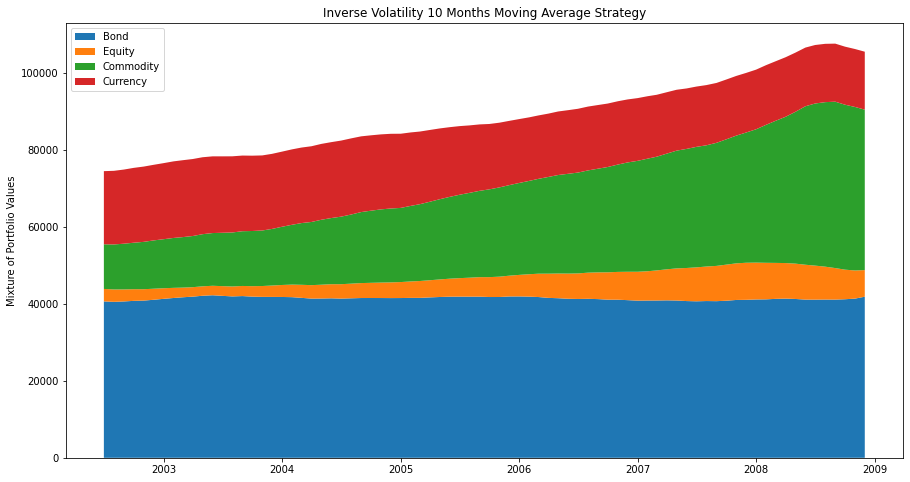

In [528]:
rcParams['figure.figsize'] = 15,8

x = inverse_vol_MA10.index
y1 = inverse_vol_MA10.Bond_inv_Value
y2 = inverse_vol_MA10.Equity_inv_Value
y3 = inverse_vol_MA10.Commodity_inv_Value
y4 = inverse_vol_MA10.Currency_inv_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Inverse Volatility 10 Months Moving Average Strategy')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

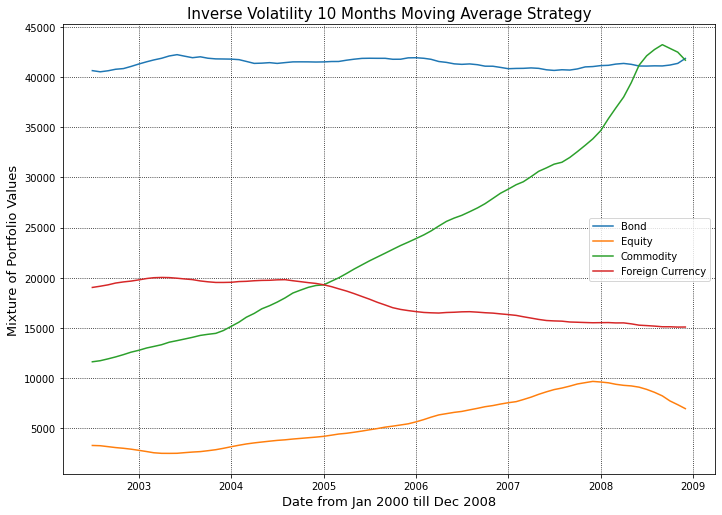

In [529]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Bond_inv_Value, label='Bond')
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Equity_inv_Value, label='Equity')
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Commodity_inv_Value, label='Commodity')                               
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Currency_inv_Value, label='Foreign Currency')
                               
plt.title('Inverse Volatility 10 Months Moving Average Strategy', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2008', fontsize=13)
plt.ylabel('Mixture of Portfolio Values', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

In [530]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, 
# arithmetic mean, standard deviation, minimum value, maximum value, and percentile
inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value','Currency_inv_Value']].describe()

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
count       78.000000         78.000000            78.000000   
mean     41403.435282       5601.166999         23983.284734   
std        424.630605       2415.971339          9336.339108   
min      40544.263668       2453.943970         11595.847364   
25%      41101.777202       3298.156812         15677.663570   
50%      41395.901647       5122.194176         22628.580723   
75%      41798.830932       7671.088135         30477.393585   
max      42255.736497       9637.559692         43252.171961   

       Currency_inv_Value  
count           78.000000  
mean         17641.081108  
std           1826.949541  
min          15061.180591  
25%          15857.875991  
50%          17129.778639  
75%          19577.939378  
max          20014.835838

**Arithmetic Mean**

In [531]:
returns_Inv_bond_mean = np.mean(inverse_vol_MA10['Bond_inv_R'])
returns_Inv_bond_mean

0.00037545380344304564

In [532]:
returns_Inv_equi_mean = np.mean(inverse_vol_MA10['Equity_inv_R'])
returns_Inv_equi_mean

0.010084311689538127

In [533]:
returns_Inv_comm_mean = np.mean(inverse_vol_MA10['Commodity_inv_R'])
returns_Inv_comm_mean

0.016611871073811166

In [534]:
returns_Inv_curr_mean = np.mean(inverse_vol_MA10['Currency_inv_R'])
returns_Inv_curr_mean

-0.0029258790767254937

**Standard Deviation**

In [535]:
returns_Inv_bond_sigma = np.std(inverse_vol_MA10['Bond_inv_R'])
returns_Inv_bond_sigma

0.0029198980744087875

In [536]:
returns_Inv_equi_sigma = np.std(inverse_vol_MA10['Equity_inv_R'])
returns_Inv_equi_sigma

0.026526817482323918

In [537]:
returns_Inv_comm_sigma = np.std(inverse_vol_MA10['Commodity_inv_R'])
returns_Inv_comm_sigma

0.009212245737014487

In [538]:
returns_Inv_curr_sigma = np.std(inverse_vol_MA10['Currency_inv_R'])
returns_Inv_curr_sigma

0.005715284763018401

**Skewness**

In [539]:
skew(inverse_vol_MA10['Bond_inv_Value'].dropna())

-0.12825978256333165

In [540]:
skew(inverse_vol_MA10['Equity_inv_Value'].dropna())

0.2683600212776386

In [541]:
skew(inverse_vol_MA10['Commodity_inv_Value'].dropna())

0.526639450714205

In [542]:
skew(inverse_vol_MA10['Currency_inv_Value'].dropna())

0.002703815414750782

**Kurtosis**

In [543]:
kurtosis(inverse_vol_MA10['Bond_inv_Value'].dropna())

-0.9817538452029169

In [544]:
kurtosis(inverse_vol_MA10['Equity_inv_Value'].dropna())

-1.3803078269240132

In [545]:
kurtosis(inverse_vol_MA10['Commodity_inv_Value'].dropna())

-0.7674377351589095

In [546]:
kurtosis(inverse_vol_MA10['Currency_inv_Value'].dropna())

-1.6970314555557557

**Geometric Mean Rate of Return**

In [547]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [548]:
geometric_mean_return(inverse_vol_MA10['Bond_inv_R'])

0.0012408851388596182

In [549]:
geometric_mean_return(inverse_vol_MA10['Equity_inv_R'])

0.021732880746846667

In [550]:
geometric_mean_return(inverse_vol_MA10['Commodity_inv_R'])

0.015915247523525102

In [551]:
geometric_mean_return(inverse_vol_MA10['Currency_inv_R'])

0.0031681475044530254

**Annualized Volatility**

In [552]:
inverse_vol_MA10.Bond_inv_Vol.dropna()

Date
2008-12-01    0.025955
Name: Bond_inv_Vol, dtype: float64

In [553]:
inverse_vol_MA10.Equity_inv_Vol.dropna()

Date
2008-12-01    0.235795
Name: Equity_inv_Vol, dtype: float64

In [554]:
inverse_vol_MA10.Commodity_inv_Vol.dropna()

Date
2008-12-01    0.081887
Name: Commodity_inv_Vol, dtype: float64

In [555]:
inverse_vol_MA10.Currency_inv_Vol.dropna()

Date
2008-12-01    0.050803
Name: Currency_inv_Vol, dtype: float64

**Annualized Sharpe Ratio**

In [556]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [557]:
inverse_vol_MA10.shape[0]

78

In [558]:
Sharpe_Ratio(inverse_vol_MA10['Bond_inv_R'], 78, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

0.4964561108511468

In [559]:
Sharpe_Ratio(inverse_vol_MA10['Equity_inv_R'], 78, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

3.2662977189997853

In [560]:
Sharpe_Ratio(inverse_vol_MA10['Commodity_inv_R'], 78, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

15.623072666216597

In [561]:
Sharpe_Ratio(inverse_vol_MA10['Currency_inv_R'], 78, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

-4.815066677057234

**Annualized Sortino Ratio**

In [562]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [563]:
inverse_vol_MA10.shape[0]

78

In [564]:
Sortino_Ratio(inverse_vol_MA10['Bond_inv_R'], 78, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

0.9623262516035049

In [565]:
Sortino_Ratio(inverse_vol_MA10['Equity_inv_R'], 78, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

4.924239795435984

In [566]:
Sortino_Ratio(inverse_vol_MA10['Commodity_inv_R'], 78, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

24.771676622830576

In [567]:
Sortino_Ratio(inverse_vol_MA10['Currency_inv_R'], 78, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

-6.226039302696781

**Cumulative Return**

In [593]:
# Calculate the cumulative return of bond 
cumulative_return_bond = 100 * (inverse_vol_MA10['Bond_inv_Value'][-1] /inverse_vol_MA10['Bond_inv_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cumulative_return_bond))

The Cumulative Return of the Bond is 2.99%


In [594]:
# Calculate the cumulative return of equity
cumulative_return_equi = 100 * (inverse_vol_MA10['Equity_inv_Value'][-1] /inverse_vol_MA10['Equity_inv_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cumulative_return_equi))

The Cumulative Return of the equity is 113.37%


In [595]:
# Calculate the cumulative return of commodity 
cumulative_return_comm = 100 * (inverse_vol_MA10['Commodity_inv_Value'][-1] /inverse_vol_MA10['Commodity_inv_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cumulative_return_comm))

The Cumulative Return of the commodity is 259.66%


In [600]:
# Calculate the cumulative return of currency 
cumulative_return_curr = 100 * (inverse_vol_MA10['Currency_inv_Value'][-1] /inverse_vol_MA10['Currency_inv_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cumulative_return_curr))

The Cumulative Return of the currency is -20.77%


**Conclusion on Inverse Volatility 10 Months Moving Average Strategy**

**Arithmetic Mean**

- IV 10 MA Bond 0.00037545380344304564
- IV 10 MA Equity 0.010084311689538127
- IV 10 MA Commodity 0.016611871073811166
- IV 10 MA Currency -0.0029258790767254937

**Standards Deviation**

- IV 10 MA Bond 0.0029198980744087875
- IV 10 MA Equity 0.026526817482323918
- IV 10 MA Commodity 0.009212245737014487
- IV 10 MA Currency 0.005715284763018401

**Skewness**

- IV 10 MA Bond -0.12825978256333165
- IV 10 MA Equity 0.2683600212776386
- IV 10 MA Commodity 0.526639450714205 
- IV 10 MA Currency 0.002703815414750782

**Kurtosis**

- IV 10 MA Bond -0.9817538452029169
- IV 10 MA Equity -1.3803078269240132
- IV 10 MA Commodity -0.7674377351589095
- IV 10 MA Currency -1.6970314555557557

**Geometric Mean Rate of Returns**

- IV 10 MA Bond 0.0012408851388596182
- IV 10 MA Equity 0.021732880746846667
- IV 10 MA Commodity 0.015915247523525102
- IV 10 MA Currency 0.0031681475044530254

**Volatility**

- IV 10 MA Bond 0.025955
- IV 10 MA Equity 0.235795 
- IV 10 MA Commodity 0.081887
- IV 10 MA Currency 0.050803

**Annualized Sharpe Ratio**

- IV 10 MA Bond 0.4964561108511468
- IV 10 MA Equity 3.2662977189997853
- IV 10 MA Commodity 15.623072666216597
- IV 10 MA Currency -4.815066677057234

**Annualized Sortino Ratio**

- IV 10 MA Bond 0.9623262516035049
- IV 10 MA Equity 4.924239795435984
- IV 10 MA Commodity 24.771676622830576
- IV 10 MA Currency -6.226039302696781

**Cumulative Return**

- IV 10 MA Bond 2.99%
- IV 10 MA Equity 113.37%
- IV 10 MA Commodity 259.66%
- IV 10 MA Currency -20.77%

In [605]:
# A Table of A Conclusion on Inverse Volatility 10 Months Moving Average Strategy

IVMA = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[0.00037545380344304564,0.0029198980744087875,-0.12825978256333165,-0.9817538452029169,0.0012408851388596182,
                0.025955,0.4964561108511468,0.9623262516035049, 0.0299],
        'Equity':[0.010084311689538127,0.026526817482323918,0.2683600212776386,-1.3803078269240132,0.021732880746846667,
                  0.235795 ,3.2662977189997853,4.924239795435984, 1.1337],
        'Commodity':[0.016611871073811166,0.009212245737014487,0.526639450714205,-0.7674377351589095,0.015915247523525102,
                     0.081887,15.623072666216597, 24.771676622830576, 2.5966],
        'Currency':[-0.0029258790767254937,0.005715284763018401,0.002703815414750782,-1.6970314555557557, 
                    0.0031681475044530254,0.050803, -4.815066677057234,-6.226039302696781, -0.2077]}


df = pd.DataFrame(data=IVMA)
df

Particular      Bond    Equity  Commodity  Currency
0     Arithmetic Mean  0.000375  0.010084   0.016612 -0.002926
1  Standard Deviation  0.002920  0.026527   0.009212  0.005715
2            Skewness -0.128260  0.268360   0.526639  0.002704
3            Kurtosis -0.981754 -1.380308  -0.767438 -1.697031
4      Geometric Mean  0.001241  0.021733   0.015915  0.003168
5          Volatility  0.025955  0.235795   0.081887  0.050803
6        Sharpe Ratio  0.496456  3.266298  15.623073 -4.815067
7       Sortino Ratio  0.962326  4.924240  24.771677 -6.226039
8   Cumulative Return  0.029900  1.133700   2.596600 -0.207700